_________________________
# COVID-19 Exploratory Data Analysis and Visualization

by **Jennie Tram Le**
__________________________

This is my personal project and does not linked to any organization. 

___________________________________________________________________________________

# Introduction

The rapid spread in the novel corona-virus across countries, John Hopskin University have published latest data on the impact of COVID-19 over the past year. I have been going through many sources and articles to understand the fatality trend and was excited to apply data visualization on this pandemic as personal project. For visualization, I am using seaborn, pygal, plotly, and matplotlib tool available in Python.

The dataset was published by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and collected from their Github page.
____________________________

# Objective

- Derive interesting data insights on Covid-19 and visualize the outbreak of Coronavirus at different level:
        1. Global 
        2. Country 
        3. Geographical Map
        4. Top 10 Country
        5. Fatality Rate
        6. Worldwide Detail Report Since the Early Stage of Pandemic Till Now
        7. Timeline Analysis:
            - Global Level
            - US vs. The Rest of The World
            - Vietnam
            - Compare the situation between US & Vietnam
_____________________________________       
    
# Pipeline:
 
 - Load Data
 - Consolidate Data 
 - Clean Data
 - Engineer New Feature
 - Exploratory Analysis with Visualization 
 
__________________________________________
# Feature Engineering: 

For the purpose of the data, there are new variables were created:

- New cases
- New Deaths
- 7 days rolling average of new cases and new deaths
- Month, Day, Month-Year 
________________________________________________
# Insights:

- Top 10 Country with the highest cases are 'USA', 'India', 'Brazil', 'Russia', 'United Kingdom', 'France', 'Spain', 'Italy', 'Turkey', 'Germany'.


- The global fatality rate for COVID-19 Pandemic is 2.15%.


- Yemen has the highest fatality rate (29%) with 612 deaths and 2115 cases. Though MS Zaandam has the second highest fatality rate of 22% but this country has significant small numbers of confirmed cases (9) and  deaths(2).  


- United States is the countries with the highest confirmed cases and highest deaths. From November 2020 to 2021, the number of new cases in the U.S. was almost half the total number of new cases all over the world. The total number of deaths in the U.S. was approximately one-fourth that number of the rest of the world.


- From May to November 2020, US had a low and constant number of deaths but that number was significantly increase in December 2020 and January 2021. 


- There was a spike in new cases for the rest of the world as of the end of December 2020 and the start of January 2021 while the number of new cases in the U.S. was quite stable during that time.


- Vietnam barely has any case on a daily basis. USA has daily reported new cases mostly in the range of less than 100,000. At some time, the daily new cases can reach 200,000. The population in the US is 328M while the population in Vietnam is 96.46M. The Vietnam population is approximately one-third of the US population, however, the daily new cases in US is 10,000 times higher than the daily new cases in Vietnam. Hence, Vietnam has a great control over the pandemic while the US seems to be losing control.


- Season can play a significant role in the increase of cases as the flu season can cause a second wave. The dailt new cases in US can reached mostly around 100,000 to 300,000 cases during Winter (roughly Nov, Dec, and Jan). The number of daily new cases in Spring, Summer and Fall were mostly less than 100,000.


- The number of daily new cases in Vietnam is mostly less than 20. In the summer of 2020, the number of new cases can spike up to 50 case. This happened because students who studied aboard in European or United States (hot spots of the pandemic) came back to Vietnam or foreigner wanted to avoid the pandemic in Vietnam. 


________________________________________________________________

# Import packages


In [1075]:
# Import the necessary modules
import os
import wget
import pandas as pd
import numpy as np
import json

# Visualization libraries
import matplotlib.pyplot as plt
import pygal
from pygal import Config
from pygal.style import DefaultStyle
import cufflinks as cf
#seaborn: statistical visualization
import seaborn as sns                    
sns.set_style("whitegrid")      

# Map visualization
# folium: choropleth visualization
import folium
# altair: declarative statistical visualization
import altair as alt

# Plotly for interactive visualization
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)   # require to use plotly offline in jupyter notebook
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.io as pio              
from IPython.display import Image      # to produce plotly staic image on Github

#pip install svglib
# Configuration for high resolution for rendered images on notebook
%config InlineBackend.figure_format='retina'

from IPython.display import SVG, display
'''Display markdown formatted output like bold, italic bold, ...'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

____________________________
# Load Data

Download COVID-19 data from John Hopkins University on Github.

In [770]:
# Remove on the downloaded csv files
! del *.csv

# Link urls to the updated data from John Hopkins University
urls = [
    # global confirmed cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    # global death cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv']

# download the data
for url in urls:
    file = wget.download(url)

In [771]:
# Double check if the data are in the folder
! dir *.csv

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6094-DC3C

 Directory of C:\Users\Jennie\Desktop\JENNIE\FORDHAM\Self-Study\Data Visualization\Python

01/25/2021  05:56 PM           452,083 time_series_covid19_confirmed_global.csv
01/25/2021  05:56 PM           314,444 time_series_covid19_deaths_global.csv
               2 File(s)        766,527 bytes
               0 Dir(s)  83,166,855,168 bytes free


In [772]:
# Read the Global Confirmed Cases Dataset
cases = pd.read_csv('time_series_covid19_confirmed_global.csv')
cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  1/15/21  1/16/21  1/17/21  \
0        0        0        0        0  ...    53831    53938    53984   
1        0        0        0        0  ...    66635    67216    67690   
2        0        0        0        0  ...   103381   103611   103833   
3        0        0        0        0  ...     8946     9038     9083   
4        0        0        0        0  ...    18679    18765    18875   

   1/18/21  1/19/21  1/20/21  1/21/21  1/22/21  1/23/21  1/24/21  
0    54062    54141    54278    54403    54483    54559    54595  
1    67982    68568    69238    69916    70655    71441    72274  
2   104092   104341   104606   104852   105124   105369   105596  
3     9083     9194     9308     9379     9416     9499     9549  
4    18926    19011    19093    19177    19269    19367    19399  

[5 rows x 373 columns]

In [773]:
# Read the Death Confirmed Cases Dataset
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  1/15/21  1/16/21  1/17/21  \
0        0        0        0        0  ...     2324     2336     2339   
1        0        0        0        0  ...     1265     1270     1277   
2        0        0        0        0  ...     2827     2831     2836   
3        0        0        0        0  ...       88       91       91   
4        0        0        0        0  ...      428      431      436   

   1/18/21  1/19/21  1/20/21  1/21/21  1/22/21  1/23/21  1/24/21  
0     2343     2346     2354     2363     2370     2373     2378  
1     1281     1287     1291     1296     1303     1310     1315  
2     2840     2843     2849     2853     2856     2861     2863  
3       91       92       92       93       93       96       96  
4      439      442      444      448      452      457      459  

[5 rows x 373 columns]

__________________________
# A bird-view at the data


In [774]:
# Checking the data size
# confirmed cases
print("****GLOBAL CONFIRMED CASES*****")
print("# rows: {}".format(cases.shape[0]))
print("# columns: {}".format(cases.shape[1]))
print("****GLOBAL DEATHS*****")
print("# rows: {}".format(deaths.shape[0]))
print("# columns: {}".format(deaths.shape[1]))

****GLOBAL CONFIRMED CASES*****
# rows: 273
# columns: 373
****GLOBAL DEATHS*****
# rows: 273
# columns: 373


In [775]:
# checking columns name
print("****All Columns Global Confirmed Cases****:\n", cases.columns)
print("\n")
print("****All Columns Gobal Deaths****:\n", deaths.columns)

****All Columns Global Confirmed Cases****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/15/21', '1/16/21', '1/17/21', '1/18/21', '1/19/21', '1/20/21',
       '1/21/21', '1/22/21', '1/23/21', '1/24/21'],
      dtype='object', length=373)


****All Columns Gobal Deaths****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/15/21', '1/16/21', '1/17/21', '1/18/21', '1/19/21', '1/20/21',
       '1/21/21', '1/22/21', '1/23/21', '1/24/21'],
      dtype='object', length=373)


In [776]:
# checking data types
print("Global Confirmed Cases Types:\n", cases.dtypes)
print("\nGlobal Deaths Types:\n", deaths.dtypes)

Global Confirmed Cases Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/20/21             int64
1/21/21             int64
1/22/21             int64
1/23/21             int64
1/24/21             int64
Length: 373, dtype: object

Global Deaths Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/20/21             int64
1/21/21             int64
1/22/21             int64
1/23/21             int64
1/24/21             int64
Length: 373, dtype: object


In [777]:
# Statistical checking for Global Confirmed Cases
cases.describe(include='all')

Province/State Country/Region         Lat        Long     1/22/20  \
count              84            273  272.000000  272.000000  273.000000   
unique             84            192         NaN         NaN         NaN   
top         St Martin          China         NaN         NaN         NaN   
freq                1             33         NaN         NaN         NaN   
mean              NaN            NaN   20.639516   23.165585    2.040293   
std               NaN            NaN   25.181450   73.696719   26.928183   
min               NaN            NaN  -51.796300 -178.116500    0.000000   
25%               NaN            NaN    6.105887  -20.026050    0.000000   
50%               NaN            NaN   21.805100   20.972650    0.000000   
75%               NaN            NaN   41.123000   84.497525    0.000000   
max               NaN            NaN   71.706900  178.065000  444.000000   

           1/23/20     1/24/20     1/25/20      1/26/20      1/27/20  ...  \
count   273.000000  273.000000  273.000000   273.000000   273.000000  ...   
unique         NaN         NaN         NaN          NaN          NaN  ...   
top            NaN         NaN         NaN          NaN          NaN  ...   
freq           NaN         NaN         NaN          NaN          NaN  ...   
mean      2.399267    3.446886    5.249084     7.758242    10.721612  ...   
std      27.026232   33.646272   46.828263    65.442780    88.174227  ...   
min       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
25%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
50%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
75%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
max     444.000000  549.000000  761.000000  1058.000000  1423.000000  ...   

             1/15/21       1/16/21       1/17/21       1/18/21       1/19/21  \
count   2.730000e+02  2.730000e+02  2.730000e+02  2.730000e+02  2.730000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    3.438689e+05  3.461370e+05  3.481525e+05  3.500353e+05  3.522635e+05   
std     1.695142e+06  1.707601e+06  1.718389e+06  1.727208e+06  1.738517e+06   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     8.430000e+02  8.510000e+02  8.550000e+02  8.620000e+02  8.650000e+02   
50%     1.057300e+04  1.068100e+04  1.078100e+04  1.090700e+04  1.090700e+04   
75%     1.470160e+05  1.483700e+05  1.486070e+05  1.489250e+05  1.494620e+05   
max     2.355610e+07  2.375886e+07  2.393677e+07  2.407877e+07  2.425603e+07   

             1/20/21       1/21/21       1/22/21       1/23/21       1/24/21  
count   2.730000e+02  2.730000e+02  2.730000e+02  2.730000e+02  2.730000e+02  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean    3.548061e+05  3.572120e+05  3.596231e+05  3.617106e+05  3.633495e+05  
std     1.750384e+06  1.762568e+06  1.774597e+06  1.785594e+06  1.793814e+06  
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%     8.650000e+02  8.650000e+02  8.660000e+02  8.660000e+02  8.660000e+02  
50%     1.096300e+04  1.103500e+04  1.103500e+04  1.109900e+04  1.118100e+04  
75%     1.499730e+05  1.504790e+05  1.510410e+05  1.516460e+05  1.519800e+05  
max     2.443872e+07  2.463189e+07  2.482181e+07  2.499446e+07  2.512700e+07  

[11 rows x 373 columns]

In [778]:
# Statistical checking for Global Deaths 
deaths.describe(include='all')

Province/State Country/Region         Lat        Long     1/22/20  \
count              84            273  272.000000  272.000000  273.000000   
unique             84            192         NaN         NaN         NaN   
top         St Martin          China         NaN         NaN         NaN   
freq                1             33         NaN         NaN         NaN   
mean              NaN            NaN   20.639516   23.165585    0.062271   
std               NaN            NaN   25.181450   73.696719    1.028887   
min               NaN            NaN  -51.796300 -178.116500    0.000000   
25%               NaN            NaN    6.105887  -20.026050    0.000000   
50%               NaN            NaN   21.805100   20.972650    0.000000   
75%               NaN            NaN   41.123000   84.497525    0.000000   
max               NaN            NaN   71.706900  178.065000   17.000000   

           1/23/20     1/24/20     1/25/20     1/26/20     1/27/20  ...  \
count   273.000000  273.000000  273.000000  273.000000  273.000000  ...   
unique         NaN         NaN         NaN         NaN         NaN  ...   
top            NaN         NaN         NaN         NaN         NaN  ...   
freq           NaN         NaN         NaN         NaN         NaN  ...   
mean      0.065934    0.095238    0.153846    0.205128    0.300366  ...   
std       1.030443    1.454612    2.421972    3.148595    4.600739  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      17.000000   24.000000   40.000000   52.000000   76.000000  ...   

              1/15/21        1/16/21        1/17/21        1/18/21  \
count      273.000000     273.000000     273.000000     273.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      7359.311355    7407.051282    7438.941392    7472.919414   
std      31481.574202   31708.600442   31832.180113   31941.907092   
min          0.000000       0.000000       0.000000       0.000000   
25%          6.000000       6.000000       6.000000       6.000000   
50%        138.000000     138.000000     140.000000     142.000000   
75%       2324.000000    2336.000000    2339.000000    2343.000000   
max     392499.000000  395851.000000  397600.000000  399003.000000   

              1/19/21        1/20/21        1/21/21        1/22/21  \
count      273.000000     273.000000     273.000000     273.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      7534.604396    7599.868132    7661.205128    7719.355311   
std      32169.397853   32468.205998   32757.062961   33017.917372   
min          0.000000       0.000000       0.000000       0.000000   
25%          6.000000       6.000000       6.000000       6.000000   
50%        142.000000     142.000000     142.000000     143.000000   
75%       2346.000000    2354.000000    2363.000000    2370.000000   
max     401772.000000  406147.000000  410349.000000  414107.000000   

              1/23/21        1/24/21  
count      273.000000     273.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      7767.831502    7800.032967  
std      33252.268445   33377.892011  
min          0.000000       0.000000  
25%          6.000000       6.000000  
50%        145.000000     146.000000  
75%       2373.000000    2378.000000  
max     417439.000000  419214.000000  

[11 rows x 373 columns]

In [779]:
# Checking Missing Value
print("GLOBAL CONFIRMED CASES")
cases.info()
print(cases.isnull().sum().sort_values(ascending=False))
print("\n GLOBAL DEATH CASES")
deaths.info()
print(deaths.isnull().sum().sort_values(ascending=False))

GLOBAL CONFIRMED CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 373 entries, Province/State to 1/24/21
dtypes: float64(2), int64(369), object(2)
memory usage: 795.7+ KB
Province/State    189
Lat                 1
Long                1
5/24/20             0
5/15/20             0
                 ... 
9/24/20             0
9/25/20             0
9/26/20             0
9/27/20             0
7/22/20             0
Length: 373, dtype: int64

 GLOBAL DEATH CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 373 entries, Province/State to 1/24/21
dtypes: float64(2), int64(369), object(2)
memory usage: 795.7+ KB
Province/State    189
Lat                 1
Long                1
5/24/20             0
5/15/20             0
                 ... 
9/24/20             0
9/25/20             0
9/26/20             0
9/27/20             0
7/22/20             0
Length: 373, dtype: int64


**Summary**

Missing values are in _Province/State_ columns for both Global Confirmed Cases & Deaths. Each file has 189 null values

________________________________________________
# Data Consolidation


To consolidate data, I will:

   - Unpivot Global Confirmed Cases dataset
   - Unpivot Global Deaths Cases dataset
   - Merge two datasets
     
_In here, I will use `pandas.melt` to unpivot a DataFrame from wide to long format where one or more columns are idenfier variables (*id_vars*), while all other columns are "unvipoted" to the row axis._

In [780]:
# Combine Confirmed & Death Cases

# Extract date data 
date = cases.columns[4:]
# unpivot Global Confirmed Cases dataset
cases_df = cases.melt(id_vars=['Province/State','Country/Region','Lat','Long'],
                      value_vars = date, var_name = 'Date', value_name = 'Confirmed Cases')

# unpivot Gloal Deaths Cases dataset
deaths_df = deaths.melt(id_vars=['Province/State', 'Country/Region','Lat','Long'],
                        value_vars = date, var_name = 'Date', value_name = 'Deaths')

# merged two new data frame
df = pd.concat([cases_df, deaths_df['Deaths']], axis = 1, sort = False)

# Check the data
df.tail()
#df.head()

Province/State      Country/Region        Lat        Long     Date  \
100732            NaN             Vietnam  14.058324  108.277199  1/24/21   
100733            NaN  West Bank and Gaza  31.952200   35.233200  1/24/21   
100734            NaN               Yemen  15.552727   48.516388  1/24/21   
100735            NaN              Zambia -13.133897   27.849332  1/24/21   
100736            NaN            Zimbabwe -19.015438   29.154857  1/24/21   

        Confirmed Cases  Deaths  
100732             1548      35  
100733           155414    1791  
100734             2118     615  
100735            45337     639  
100736            31320    1005

In [781]:
# Save the data 
df.to_csv('merged_uncleaned_data.csv')

______________________________________________
# Data Cleaning

The list of data cleanning tasks:
**1. 'Province/State':**

- Correct the values in 'Province/State'.
- Remove the ',' in Bonaire, Sint Eustatius and Saba to avoid redundancy.

**2.'Country/Region':**

- Fix countries name

**3. Fixing incorrect data in certain date in 'Hubei', China**
- Change the number of confirmed cases on 2/12/2020 from 33366 to 34874	

**4. Fixing incorrect data in certain date in 'Vietnam'**
- Change the number of deaths on 8/18/2020 from 26 to 25	

**5. Convert Date From String to Datetime Type**
_________________________________
### 1. 'Province/State' column Cleaning

In [782]:
print("There are {} unique values for columns 'Province/State'".format(len(df['Province/State'].unique())))
df['Province/State'].unique()

There are 85 unique values for columns 'Province/State'


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang', 'Faroe Islands',
       'Greenland', 'French Guiana', 'French Polynesia', 'Guadeloupe',
       'Martinique', 'Mayot

In [783]:
# Correct the values in 'Province/State'
# Remove the ',' in Bonaire, Sint Eustatius and Saba to avoid redundancy
df = df[df['Province/State'].str.contains(',')!=True]

# Check the number of column again
len(df['Province/State'].unique())

84

### 2. 'Country/Region' column cleaning

In [784]:
#Checking current country names in the dataframe
#df['Country/Region'].unique()

In [785]:
# Changing the country name for using the package 'pycountry_convert'
# !pip install pycountry-convert
# Dictionary of new country name
country_dict = {'Taiwan*': 'Taiwan',
          'US': 'USA',
          'Korea, South':'South Korea',
          'Reunion':'Réunion',
          'Congo (Kinshasa)': 'Democratic Republic of the Congo',
          'Congo (Brazzaville)': 'Republic of the Congo',
          "Cote d'Ivoire": "Côte d'Ivoire",
           'Bahamas, The': 'Bahamas',
           'Gambia, The': 'Gambia'
    }

# Change the old country names with the new country names
for o,n in country_dict.items():
    df['Country/Region']=df['Country/Region'].replace(o,n)

In [786]:
#print(df['Country/Region'].unique())
#print(len(df['Country/Region'].unique()))
# Checking the result
df[df['Country/Region']=='Taiwan'].head()

Province/State Country/Region   Lat   Long     Date  Confirmed Cases  \
240             NaN         Taiwan  23.7  121.0  1/22/20                1   
513             NaN         Taiwan  23.7  121.0  1/23/20                1   
786             NaN         Taiwan  23.7  121.0  1/24/20                3   
1059            NaN         Taiwan  23.7  121.0  1/25/20                3   
1332            NaN         Taiwan  23.7  121.0  1/26/20                4   

      Deaths  
240        0  
513        0  
786        0  
1059       0  
1332       0

### 3. Fixing incorrect Hubei data on 2/12/2020

- The correct number of confirmed cases in Hubei on 2/12/2020 is 34,874

In [787]:
# Checking the data of Hubei on 2/12/2020
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

Province/State Country/Region      Lat      Long     Date  \
5804          Hubei          China  30.9756  112.2707  2/12/20   

      Confirmed Cases  Deaths  
5804            33366    1068

In [788]:
# Create a function to correct the value
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val
        
# Correct Data is 34874 cases
hubei21220 = {'Hubei':34874}

# Correct the data
correcting_value('Province/State','2/12/20','Confirmed Cases', hubei21220)

In [789]:
# Checking the result
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

Province/State Country/Region      Lat      Long     Date  \
5804          Hubei          China  30.9756  112.2707  2/12/20   

      Confirmed Cases  Deaths  
5804            34874    1068

### 4. Fixing incorrect Vietnam data on 8/18/2020

- The correct number of deaths in Vietnam on 8/18/2020 is 25 instead of 26

In [790]:
# Checking the data of Vietnam on 2/12/2020
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

Province/State Country/Region        Lat        Long     Date  \
57325            NaN        Vietnam  14.058324  108.277199  8/18/20   

       Confirmed Cases  Deaths  
57325              989      26

In [791]:
# Create a function to correct the value
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val
        
# Correct Data is 26 deaths
vietnam8182020 = {'Vietnam':25}

# Correct the data
correcting_value('Country/Region','8/18/20','Deaths', vietnam8182020)

In [792]:
# Checking the result
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

Province/State Country/Region        Lat        Long     Date  \
57325            NaN        Vietnam  14.058324  108.277199  8/18/20   

       Confirmed Cases  Deaths  
57325              989      25

### 5. Convert Data From String to Datetime Type

In [793]:
# Convert date from string to datetime type using pd.to_datetime
# Use strftime to sort the date order again (month, date, year) 
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
df.tail()

Province/State      Country/Region        Lat        Long        Date  \
100732            NaN             Vietnam  14.058324  108.277199  01/24/2021   
100733            NaN  West Bank and Gaza  31.952200   35.233200  01/24/2021   
100734            NaN               Yemen  15.552727   48.516388  01/24/2021   
100735            NaN              Zambia -13.133897   27.849332  01/24/2021   
100736            NaN            Zimbabwe -19.015438   29.154857  01/24/2021   

        Confirmed Cases  Deaths  
100732             1548      35  
100733           155414    1791  
100734             2118     615  
100735            45337     639  
100736            31320    1005

_____________________________________

### **Save data for further analysis**

In [764]:
df.to_csv('covid19_clean_data.csv')

____________________________
# Data Overview


In [794]:
#df = pd.read_csv('covid19_clean_data.csv')
#df = df.iloc[:,1:] # Drop the unnamed columns

In [795]:
# Examine the data 
#df.head()

In [796]:
#df.tail()

________________________________
# Exploratory Data Analysis


In [1155]:
# Show the statiscal overview of the data
df.describe(include="all")

Province/State Country/Region           Lat          Long  \
count                       30627         100368  99999.000000  99999.000000   
unique                         83            192           NaN           NaN   
top     Newfoundland and Labrador          China           NaN           NaN   
freq                          369          12177           NaN           NaN   
mean                          NaN            NaN     20.670737     23.502869   
std                           NaN            NaN     25.176311     73.486852   
min                           NaN            NaN    -51.796300   -178.116500   
25%                           NaN            NaN      5.152149    -19.020800   
50%                           NaN            NaN     21.916200     21.005900   
75%                           NaN            NaN     41.153300     85.240100   
max                           NaN            NaN     71.706900    178.065000   

              Date  Confirmed Cases         Deaths  
count       100368     1.003680e+05  100368.000000  
unique         369              NaN            NaN  
top     04/10/2020              NaN            NaN  
freq           272              NaN            NaN  
mean           NaN     9.803809e+04    2696.521172  
std            NaN     7.132270e+05   15847.341855  
min            NaN     0.000000e+00       0.000000  
25%            NaN     3.300000e+01       0.000000  
50%            NaN     8.340000e+02      10.000000  
75%            NaN     1.189400e+04     218.000000  
max            NaN     2.512700e+07  419214.000000

In [1156]:
print("There are now {} variables and {} records in this dataset".format(df.shape[1],df.shape[0]))

There are now 7 variables and 100368 records in this dataset



# 1. Global Level: Cases & Deaths
______

In [1157]:
# Extract the final date of the dataframe
final_date = df.Date.iloc[-1]

# Extract the cases on the final_date
most_recent_df =df[df.Date == final_date]

# Most updated on Global COVID-19 confirmed cases and deaths 
print("Globally COVID-19 information on {}:\n\
      \nConfirmed Cases: {:,}\nDeaths: {:,}".format(final_date, 
                             most_recent_df["Confirmed Cases"].sum(),   # Lastest info about confirmed cases
                             most_recent_df["Deaths"].sum()))           # Lastest info about deaths

Globally COVID-19 information on 01/24/2021:
      
Confirmed Cases: 99,194,209
Deaths: 2,129,406


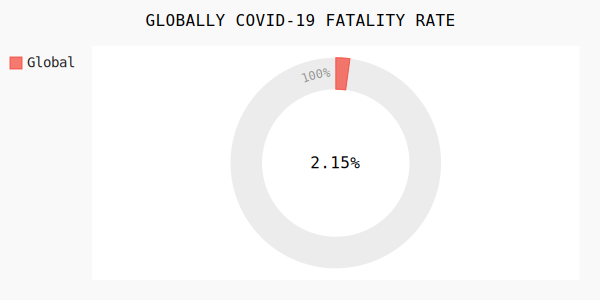

In [1073]:
# Calculate global fatality rate
fatality_rate = round((most_recent_df["Deaths"].sum()/ most_recent_df["Confirmed Cases"].sum())*100,2)

# Plot global fatality rate in a gauge chart
gauge = pygal.SolidGauge(inner_radius=0.70, width=600,height=300) # Gauge chart configuration
percent_formatter = lambda x: '{:.10g}%'.format(x)             # format fatality rate in %
gauge.value_formatter = percent_formatter                      
gauge.title = "GLOBALLY COVID-19 FATALITY RATE"                # Set chart title 
gauge.add('Global',[{'value':fatality_rate}])                  # Add value to the chart
display(SVG(gauge.render(disable_xml_declaration=True)))        

# 2. Country Level: Cases & Deaths
______________

In [1158]:
# Define a function to calculate fatality rate
def fatality_rate(cases,deaths):
    fatality = (cases/deaths)*100
    return round(fatality,2)

In [1161]:
# Extract the data by country on the most recent date
country_data = most_recent_df.groupby('Country/Region')['Confirmed Cases','Deaths']\
              .sum()\
              .reset_index()
# Calculate fatality rate
country_data['fatality_rate'] = country_data[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]),axis=1)
# Color pallate for cmap is diverging orange red
color_cases = 'OrRd'
color_death = 'OrRd'

# Create a highlighting color on country cases table
cmap_country = country_data.sort_values('Confirmed Cases', ascending=False)\
                        .style.background_gradient(cmap=color_cases,subset=['Confirmed Cases'])\
                        .background_gradient(cmap = color_death,subset=['Deaths'])\
                        .background_gradient(cmap = color_death,subset=['fatality_rate'])
display((cmap_country))

# 3. Geographical Map of Cases 

Next, global COVID-19 confirmed cases are plotted on **Choropleth Maps**.

A **Choropleth Map** is a map composed of colored polygons, which is used to represent spacial variations of a quantity.

Base map configuration `px.choropleth (data, locations, color, color_continuous_scale, range_color, scope, labels)`

[For further information on Choropleth, click here](https://plotly.com/python/choropleth-maps/)

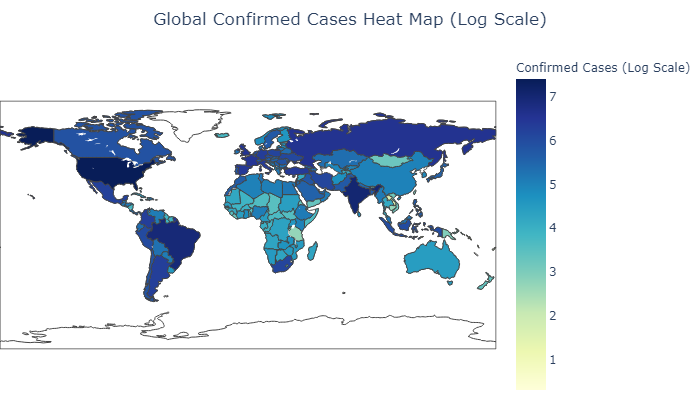

In [1460]:
#### ****** MAP - STYLE 2 ******
# Using choropleth
# Data: using country_df dataframe (log10 scale)

# list of parameters
color = '#da635eff' # Red
map_value = 'Confirmed Cases'  # 'Deaths'/'Recovered'

# Create a function to plot the map
def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',   # map configuration
                        color = np.log10(temp[map_value] + 1), # + 1 to avoid divided by 0, log0
                        hover_name = 'Country/Region', # set hover name
                        hover_data = [map_value], 
                        color_continuous_scale = px.colors.sequential.Plasma, locationmode = "country names")
    plot.update_layout(title_text = "Global {} Heat Map (Log Scale)".format(map_value), title_x=0.5,
                      height=400,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{} (Log Scale)".format(map_value),colorscale="YlGnBu")
    return plot

# Plotting global heat map
plot = plotting_global_heatmap(country_data,map_value,color)
#plot.to_image("Global Heal Map.png")
#plot.show()
Image(pio.to_image(plot, format='png'))

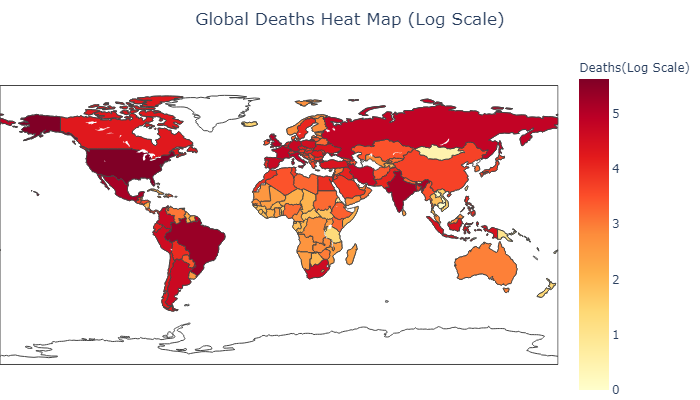

In [1461]:
#### ****** MAP - STYLE 2 ******
# Using choropleth
# Data: using country_df dataframe (log10 scale)

# list of parameters
color = 'Greys' # Red
map_value = 'Deaths'  # 'Deaths'/'Recovered'

# Create a function to plot the map
def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',   # map configuration
                        color = np.log10(temp[map_value] + 1), # + 1 to avoid divided by 0, log0
                        hover_name = 'Country/Region', # set hover name
                        hover_data = [map_value], 
                        color_continuous_scale = px.colors.sequential.Greys,
                         locationmode = "country names")
    plot.update_layout(title_text = "Global {} Heat Map (Log Scale)".format(map_value),
                       title_x=0.5, height=400,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{}(Log Scale)".format(map_value), colorscale = "YlOrRd")
    return plot

# Plotting global heat map
plot2 = plotting_global_heatmap(country_data,map_value,color)
#plot2.to_image("Global Heal Map.png")
#plot2.show()
Image(pio.to_image(plot2, format='png'))

# 4. Top 10 Country: COVID-19 Confirmed Cases & Deaths
__________________

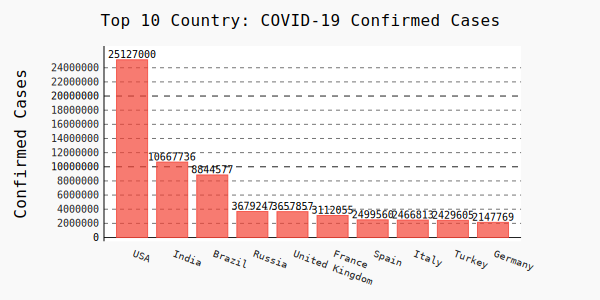

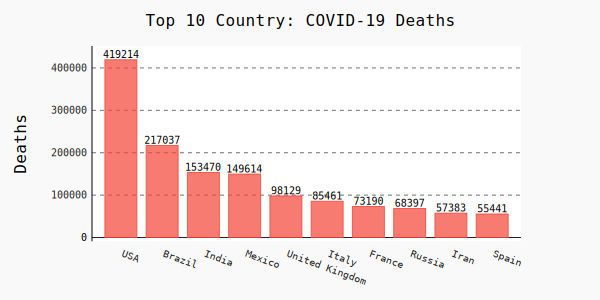

In [1068]:
# TOP 10 COUNTRY BAR CHART
# Extracting top 10 countries with the highest confirmed cases
top10_country = country_data.sort_values('Confirmed Cases',ascending=False).head(10)
# Plot Top 10 Country: COVID-19 Confirmed Cases
chart_cf = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 300, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 10, value_colors=('black',)))
chart_cf.y_title = "Confirmed Cases"
chart_cf.title = 'Top 10 Country: COVID-19 Confirmed Cases'     # set chart title
chart_cf.x_labels = [i for i in top10_country['Country/Region']]  # label of country names
chart_cf.add('Confirmed Cases', top10_country['Confirmed Cases'])            
display(SVG(chart_cf.render(disable_xml_declaration=True)))

# Extracting top 10 countries with the highest deaths
top10_country_deaths = country_data.sort_values('Deaths',ascending=False).head(10)
# plot Top 10 Country: COVID-19 Deaths
from pygal.style import DarkSolarizedStyle, NeonStyle
chart_d = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 300, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 10, value_colors=('black',)))
chart_d.y_title = "Deaths"
chart_d.title = 'Top 10 Country: COVID-19 Deaths'     # set chart title
chart_d.x_labels = [i for i in top10_country_deaths['Country/Region']]  # label of country names
chart_d.add('Confirmed Deaths', top10_country_deaths['Deaths'])            
display(SVG(chart_d.render(disable_xml_declaration=True)))

- US has the highest number of confirmed cases and deaths. 

- India has the 2nd highest number of confirmed cases but Brazil has the 2nd highest number of death.

- Iran though is not in top 10 with the highest confirmed cases but the number of deaths in Iran ranked #9.

- Germany is in top 10 with the highest confirmed cases but is not in the top 10 country with the highest number of deaths.


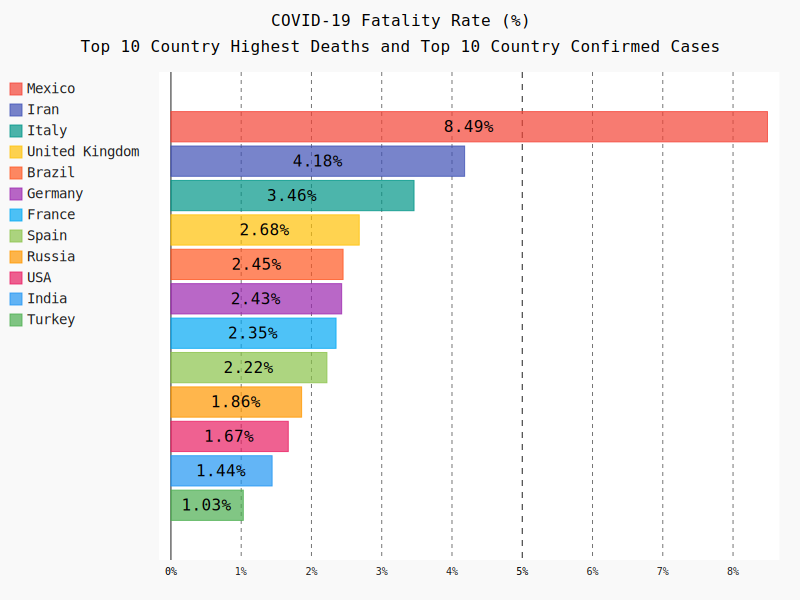

In [1166]:
#### DATA PREP ###
# Calculate fatality rate for top 10 country with highest confirmed cases
top10_country['fatality_rate'] = top10_country[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Calculate fatality rate for top 10 country with highest deaths
top10_country_deaths['fatality_rate'] = top10_country_deaths[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Combine data of country with highest confirmed cases and highest deaths
df_country_top10 = pd.concat([top10_country_deaths,top10_country]).drop_duplicates().sort_values('fatality_rate',
                                                                                                ascending=False)
##### PLOT HORIZONTAL BAR CHART TO DISPLAY FATALITY RATE ####
# Plot COVID-19 Fatality Rate for Top 10 Country with Highest Confirmed Cases and Highest Deths
chart_f = pygal.HorizontalBar(print_values=True,                               # Set chart configuration
                              style = DefaultStyle(value_font_size = 16, value_colors=('black',)))
percent_formatter = lambda x: '{:.10g}%'.format(x)                             # format fatality rate in %
chart_f.value_formatter = percent_formatter   
chart_f.title = "COVID-19 Fatality Rate (%)\n Top 10 Country Highest Deaths and Top 10 Country Confirmed Cases"                   # Set chart title
for country,rate in zip(df_country_top10["Country/Region"],              # Add value to chart
                        df_country_top10["fatality_rate"]):
    chart_f.add(country,rate)
display(SVG(chart_f.render(disable_xml_declaration=True)))


# 5. COVID-19 Fatality Rate (Globally) 
_________________________________

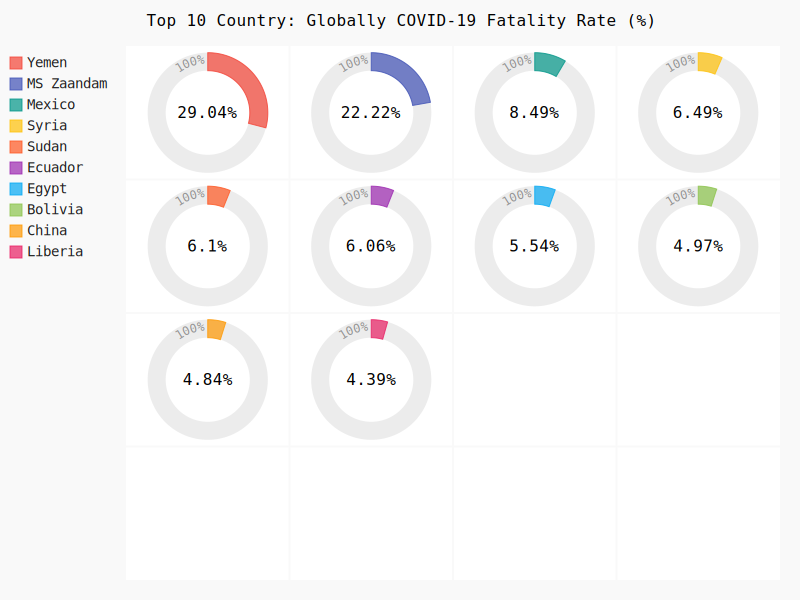

In [1070]:
### Top 10 COVID-19 Fatality Rate (Globally) 
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)
### Top 10 COVID-19 Fatality Rate (Globally) 
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)

# Plot Fatality Rate for top highest country/region globally
gauge_fatality = pygal.SolidGauge(inner_radius=0.70)
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge_fatality.value_formatter = percent_formatter
gauge_fatality.title = "Top 10 Country: Globally COVID-19 Fatality Rate (%)"            # Set title  
for country,rate in zip(top10_country_fatality["Country/Region"],              # Add value to chart
                        top10_country_fatality["fatality_rate"]):
    gauge_fatality.add(country,[{'value':rate}])
display(SVG(gauge_fatality.render(disable_xml_declaration=True))) # Show chart

Yemen has the highest fatality rate (29%) with 612 deaths and 2115 cases. Though MS Zaandam has the second highest fatality rate of 22% but this country has significant small confirmed cases (9) and deaths(2).  

# 6. Worldwide Detail Report Since the Early Stage of Pandemic Till Now
______________________________________

In [1065]:
# Data preparation
# Sum up all the cases in the world by date
world_cases_all_time = df.groupby('Date')['Confirmed Cases','Deaths'].sum().sort_values('Date', ascending=False).reset_index()
# Add new confirmed cases which indicates the difference between day of confirmed cases
# For example - 99 is the number of cases increased from 555 in 2020-1-22 to 654 in 2020-1-23
world_cases_all_time['New Cases'] = world_cases_all_time['Confirmed Cases'] - world_cases_all_time['Confirmed Cases'].shift(1)
# For good x-axis display, show only month & year
world_cases_all_time['Date'] = pd.to_datetime(world_cases_all_time['Date'])
# Sort data by date since day 1 till current time
world_cases_all_time = world_cases_all_time.sort_values("Date").reset_index(drop=True)
# Check data again
#world_cases_all_time.head()

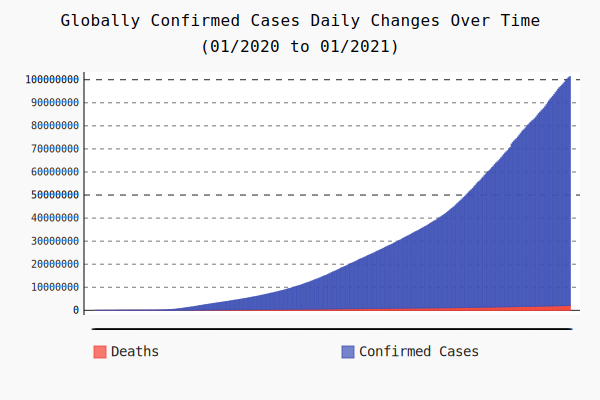

In [1439]:
# STACKED BAR CHART
line_chart_cf = pygal.StackedBar(height=400, width=600, legend_at_bottom = True, interpolate='cubic')
line_chart_cf.title = 'Globally Confirmed Cases Daily Changes Over Time\n(01/2020 to 01/2021)'
line_chart_cf.x_labels = [str(i) for i in world_cases_all_time['Date']]
line_chart_cf.add('Deaths', [i for i in world_cases_all_time['Deaths']])
line_chart_cf.add('Confirmed Cases', [i for i in world_cases_all_time['Confirmed Cases']])
display(SVG(line_chart_cf.render(disable_xml_declaration=True)))

# 7. Country Comparison 

In [812]:
# Sum up all cases for each countr by date
countries_cases_all_time = df.groupby(['Date','Country/Region'])['Confirmed Cases','Deaths']\
    .sum().sort_values('Date').reset_index()

# Find top 10 countries with the highest number of confirmed cases
top10_country = country_data.sort_values('Confirmed Cases', ascending=False)\
            .head(10)['Country/Region'].unique()

print("Top 10 countries with highest confirmed cases are: \n\n{}".format(set(top10_country)))

# Extract top 10 countries cases from countries cases all time
top10_country_cases = countries_cases_all_time[countries_cases_all_time['Country/Region'].isin(top10_country)]

# Convert the date to datetime format
top10_country_cases['Date'] = pd.to_datetime(top10_country_cases['Date'])

# Calculate Log of Confirmed Cases & Deaths
top10_country_cases['Log(Confirmed Cases)'] = np.log(top10_country_cases['Confirmed Cases'])
top10_country_cases['Log(Deaths)'] = np.log(top10_country_cases['Deaths'])

top10_country_cases.head()

Top 10 countries with highest confirmed cases are: 

{'Spain', 'Brazil', 'United Kingdom', 'France', 'Italy', 'USA', 'Turkey', 'Russia', 'Germany', 'India'}


Date  Country/Region  Confirmed Cases  Deaths  Log(Confirmed Cases)  \
20 2021-01-01          Russia          3153960   56798             14.964169   
54 2021-01-01          Turkey          2220855   21093             14.613403   
55 2021-01-01             USA         20190585  347978             16.820727   
69 2021-01-01  United Kingdom          2549689   74237             14.751482   
88 2021-01-01           Spain          1928265   50837             14.472131   

    Log(Deaths)  
20    10.947256  
54     9.956697  
55    12.759895  
69    11.215018  
88    10.836380

## `Top 10 Country Confirmed Cases Over Time`

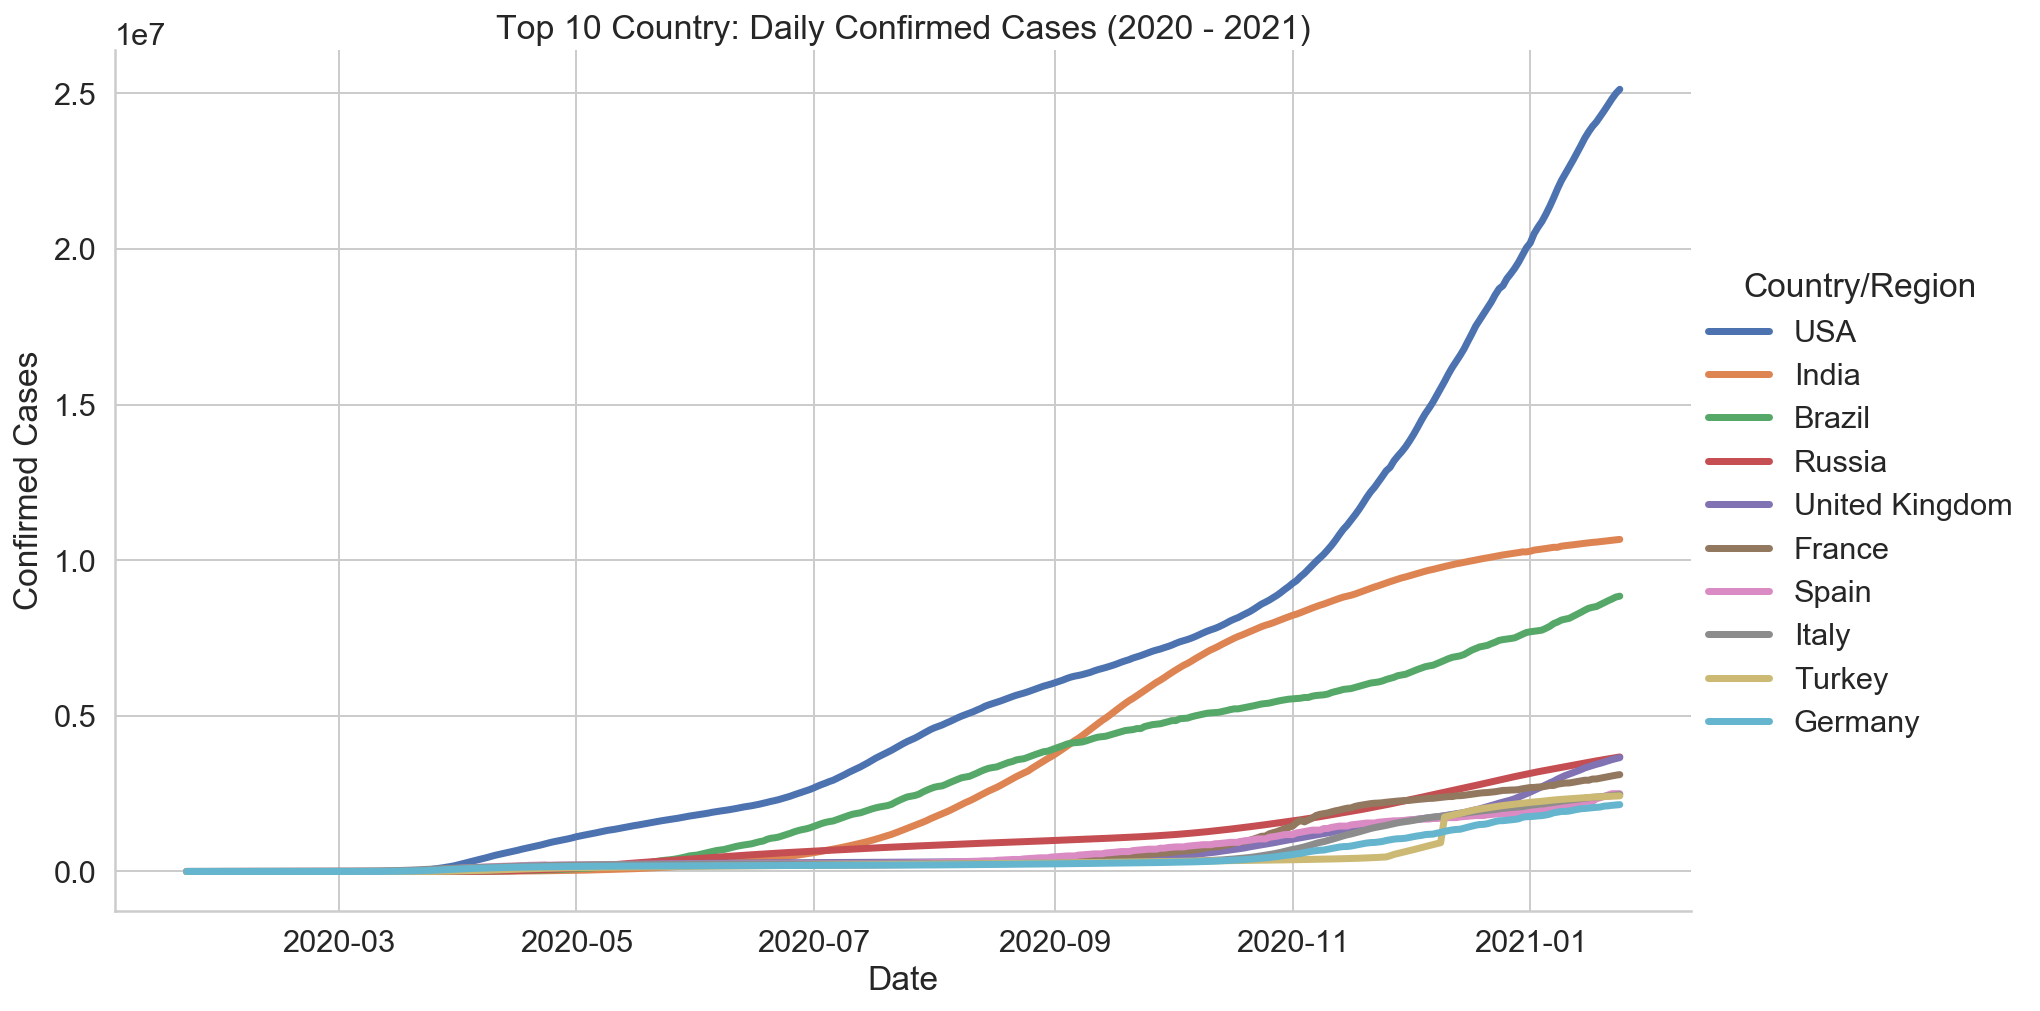

In [941]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,"axes.titlesize":17})
# Plot the confirmed cases comparison between countries
sns.relplot( data = top10_country_cases, x="Date", y="Confirmed Cases", hue="Country/Region", hue_order = top10_country,
    kind="line", height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Confirmed Cases (2020 - 2021)")
plt.show();

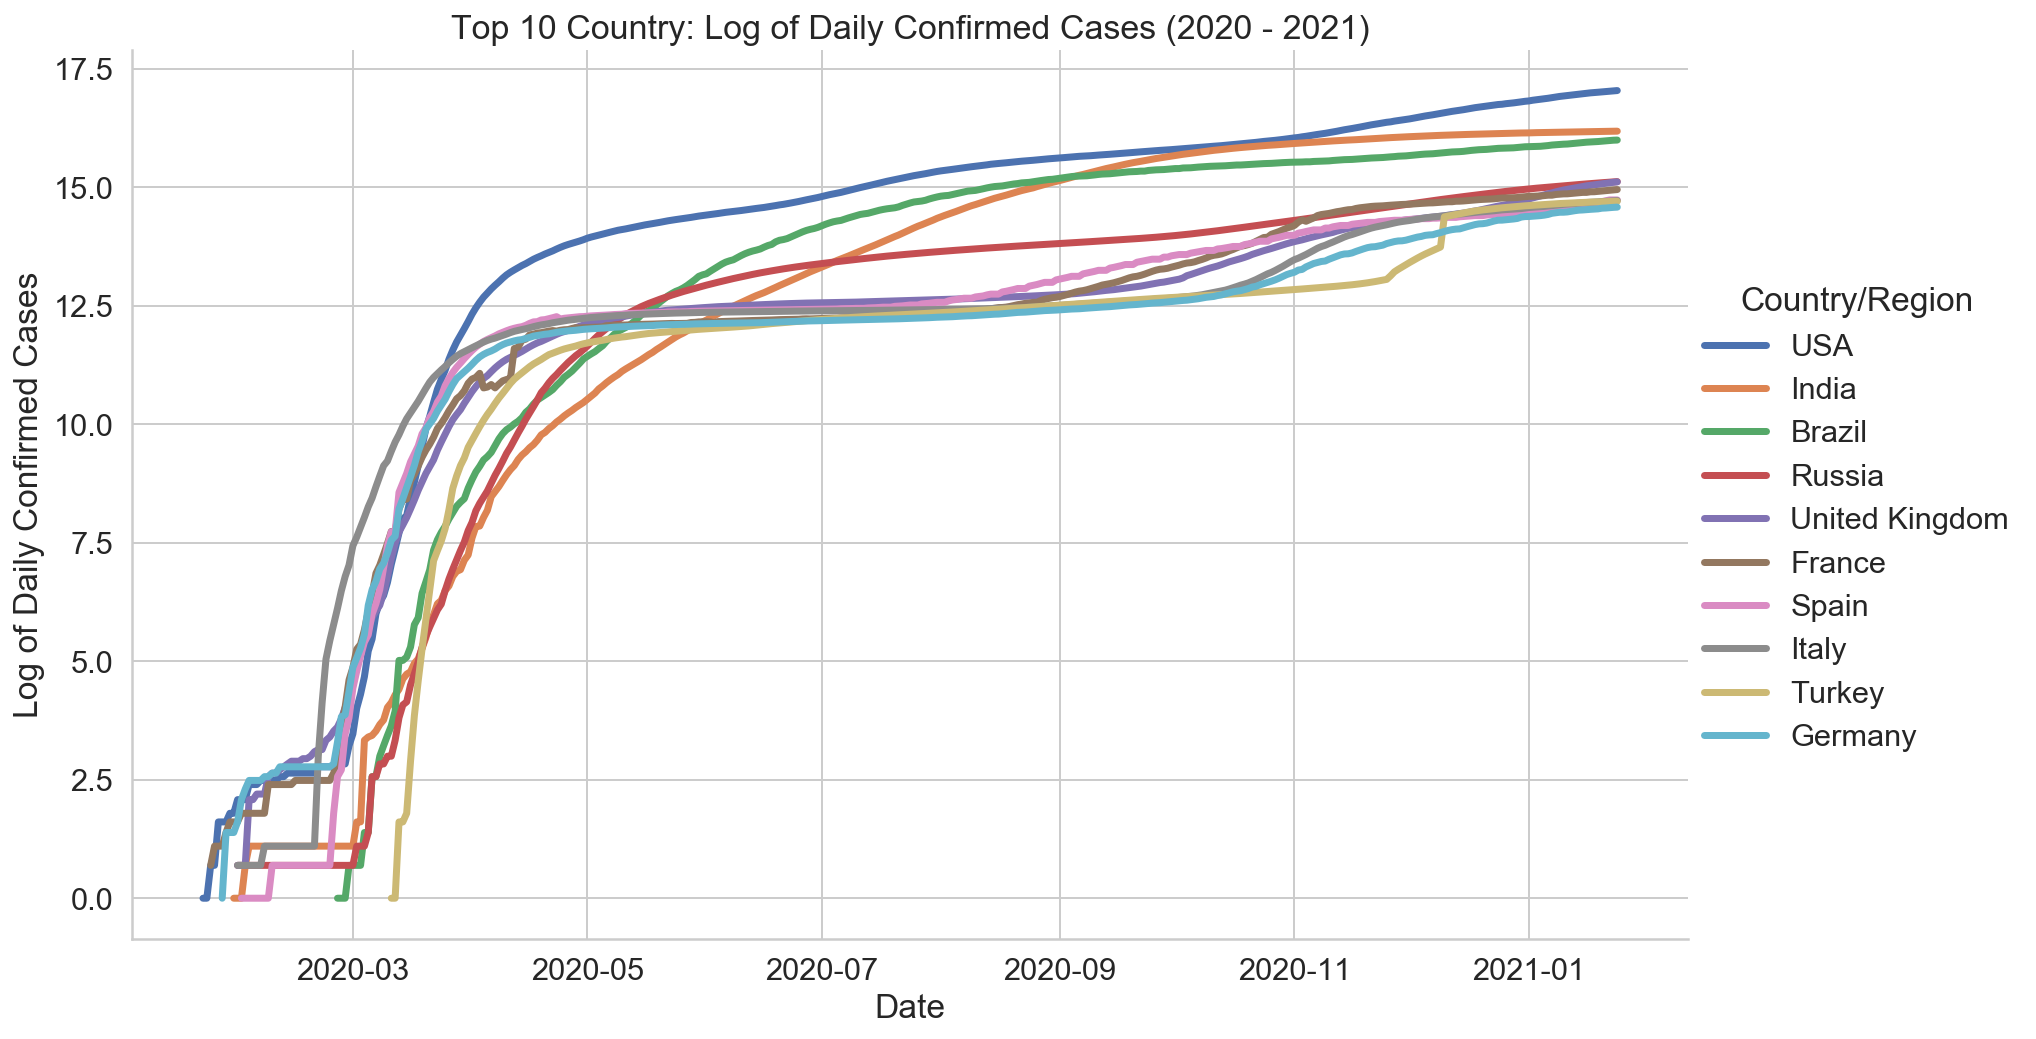

In [940]:
# Plot log confirmed cases
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5, "axes.titlesize":17})
# Plot the confirmed cases comparison between countries
sns.relplot(data = top10_country_cases, x="Date", y="Log(Confirmed Cases)", hue_order = top10_country, hue="Country/Region",
    kind="line", height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Log of Daily Confirmed Cases (2020 - 2021)", ylabel = 'Log of Daily Confirmed Cases')
plt.show();

## `Top 10 Country (Highest Cases) Deaths Over Time`

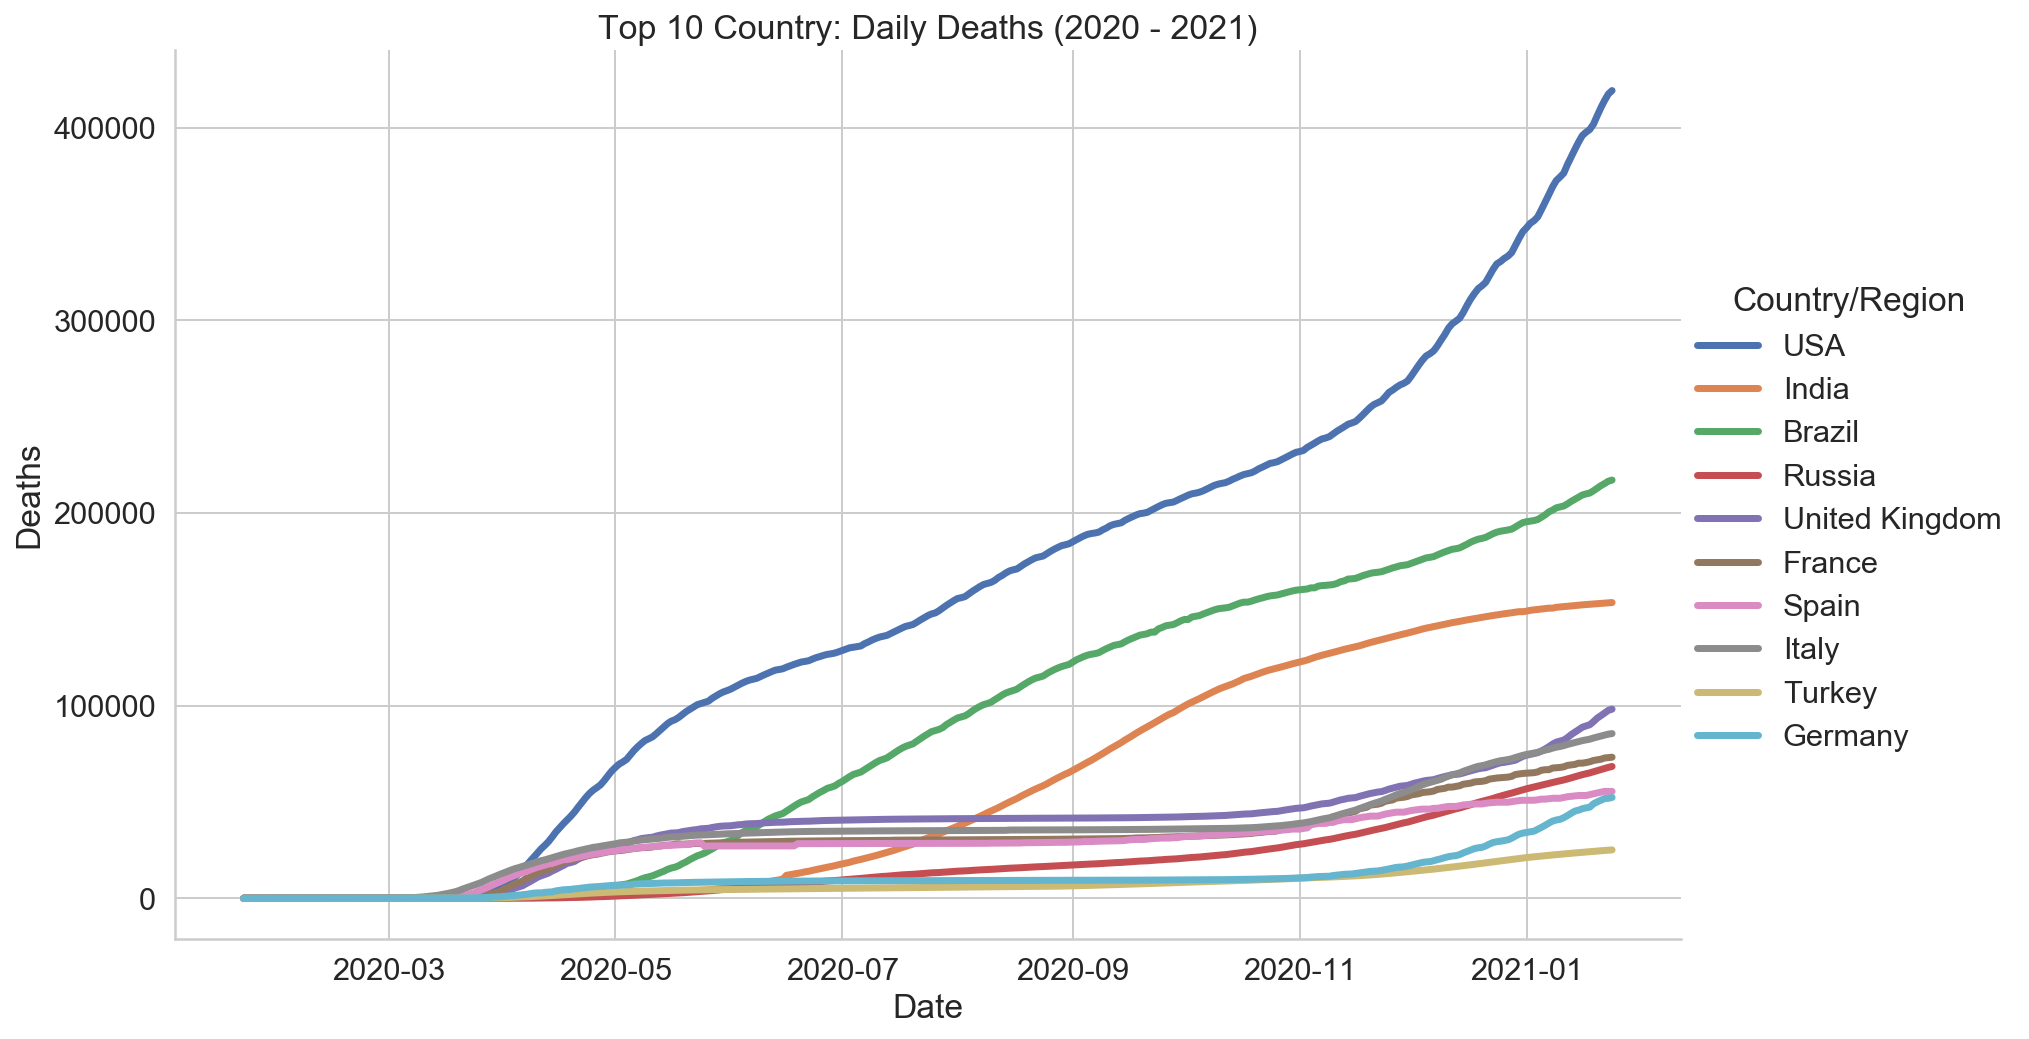

In [815]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,
                                               "axes.titlesize":17})
# Plot the deaths comparison between countries
sns.relplot(
    data = top10_country_cases, x="Date", y="Deaths",
    hue="Country/Region",
    hue_order = top10_country,
    kind="line",
    height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Deaths (2020 - 2021)")
plt.show();

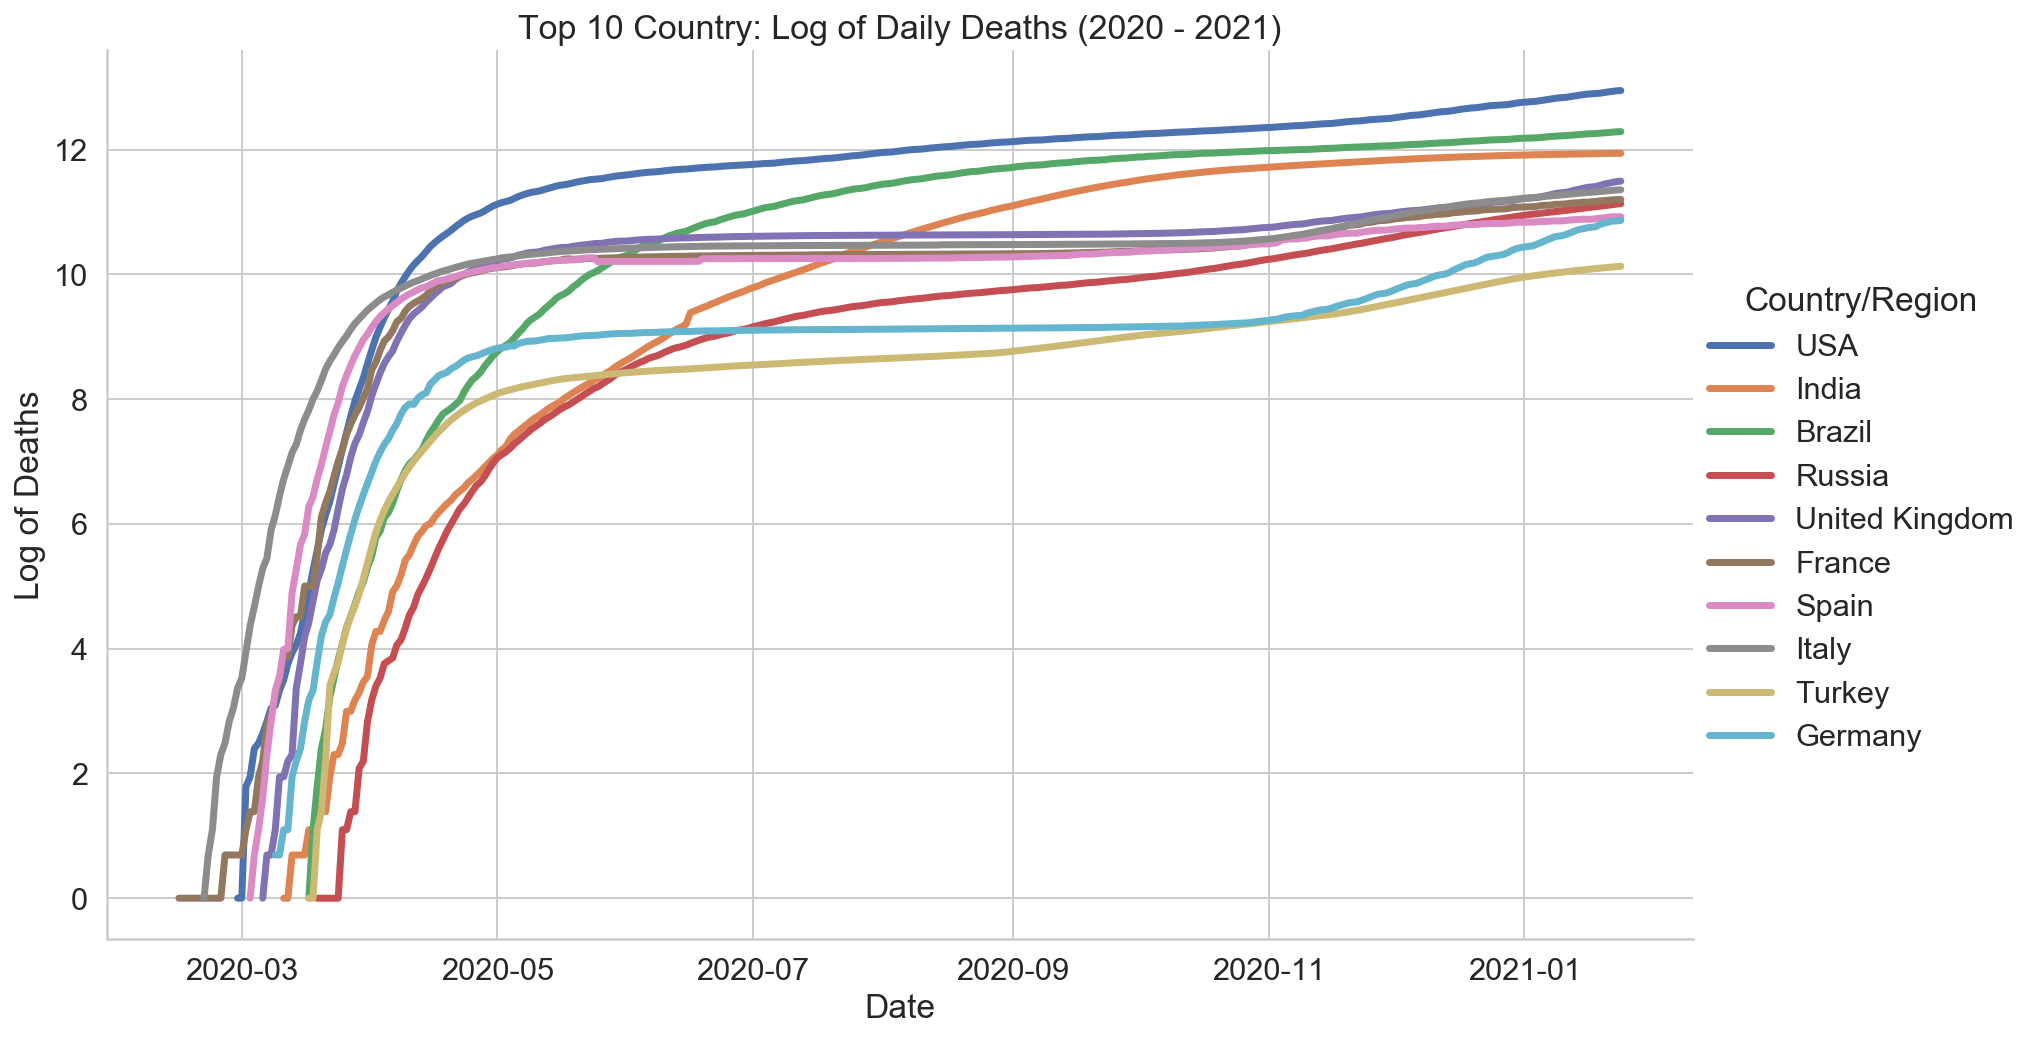

In [816]:
# Plot log deaths
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,
                                               "axes.titlesize":17})
# Plot the log deaths comparison between countries
sns.relplot(
    data = top10_country_cases, x="Date", y="Log(Deaths)",
    hue_order = top10_country,
    hue="Country/Region",
    kind="line",
    height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Log of Daily Deaths (2020 - 2021)",
    ylabel = 'Log of Deaths')
plt.show();

# 7. Timeline Analysis
__________________________________________


## Data Preparation

- Extract Month, Year, and Month-Year from Date columns for data at global level, country level and USA

In [1389]:
# Data at Global Level: Extract Month, Year, and Month-Year
world_cases_all_time['Day'] = pd.DatetimeIndex(world_cases_all_time['Date']).day
world_cases_all_time['Month'] = pd.DatetimeIndex(world_cases_all_time['Date']).month
world_cases_all_time['Year'] = pd.DatetimeIndex(world_cases_all_time['Date']).year
world_cases_all_time['Month-Year'] = pd.DatetimeIndex(world_cases_all_time['Date']).to_period('M')
world_cases_all_time['New Cases'] = world_cases_all_time['Confirmed Cases'] - world_cases_all_time['Confirmed Cases'].shift(1)
world_cases_all_time['New Deaths'] = world_cases_all_time['Deaths'] - world_cases_all_time['Deaths'].shift(1)
world_cases_all_time['Confirmed Cases per 100k'] = world_cases_all_time['Confirmed Cases']/100000
world_cases_all_time['Deaths per 100k'] = world_cases_all_time['Deaths']/100000
world_cases_all_time['New Cases per 100k'] = world_cases_all_time['New Cases']/100000
world_cases_all_time['New Deaths per 100k'] = world_cases_all_time['New Deaths']/100000


# Calculate Global 7 Day Rolling Average for New Cases, New Deaths, Confirmed Cases, and Deaths
# Calculate 7-day rolling average new cases globally
world_cases_all_time['7-Day Rolling Average New Cases'] = world_cases_all_time['New Cases'].rolling(7).mean()
# Calculate 7-day rolling average confirmed cases globally
world_cases_all_time['7-Day Rolling Average Confirmed Cases'] = world_cases_all_time['Confirmed Cases'].rolling(7).mean()
# Calculate 7-day rolling average new deaths globally
world_cases_all_time['7-Day Rolling Average New Deaths'] =world_cases_all_time['New Deaths'].rolling(7).mean()
# Calculate 7-day rolling average deaths globally
world_cases_all_time['7-Day Rolling Average Deaths'] = world_cases_all_time['Deaths'].rolling(7).mean()
# Calculate 7-day rolling average new cases globally per 100k
world_cases_all_time['7-Day Rolling Average New Cases per 100k'] = world_cases_all_time['New Cases per 100k'].rolling(7).mean()
# Calculate 7-day rolling average confirmed cases globally per 100k
world_cases_all_time['7-Day Rolling Average Confirmed Cases per 100k'] = world_cases_all_time['Confirmed Cases per 100k'].rolling(7).mean()
# Calculate 7-day rolling average new deaths globally per 100k
world_cases_all_time['7-Day Rolling Average New Deaths per 100k'] =world_cases_all_time['New Deaths per 100k'].rolling(7).mean()
# Calculate 7-day rolling average deaths globally per 100k
world_cases_all_time['7-Day Rolling Average Deaths per 100k'] = world_cases_all_time['Deaths per 100k'].rolling(7).mean()
# Check the data
#vn_df.tail()

# Data at Country Level: Extract Month, Year, and Month-Year
countries_cases_all_time['Date'] = pd.to_datetime(countries_cases_all_time['Date'])
countries_cases_all_time['Month'] = pd.DatetimeIndex(countries_cases_all_time['Date']).month
countries_cases_all_time['Year'] = pd.DatetimeIndex(countries_cases_all_time['Date']).year
countries_cases_all_time['Day'] = pd.DatetimeIndex(countries_cases_all_time['Date']).day
countries_cases_all_time['Month-Year'] = pd.DatetimeIndex(countries_cases_all_time['Date']).to_period('M')


# Extract US data
countries_cases_all_time = countries_cases_all_time.sort_values(["Country/Region","Date"]).reset_index(drop=True)
us_df=countries_cases_all_time[countries_cases_all_time["Country/Region"]=="USA"]
# Calculate US new cases
us_df["New Cases"] = us_df["Confirmed Cases"] - us_df["Confirmed Cases"].shift(1)
us_df["New Deaths"] = us_df["Deaths"] - us_df["Deaths"].shift(1)
# Calculate 7-day rolling average new cases in US
us_df['7-Day Rolling Average New Cases'] = us_df['New Cases'].rolling(7).mean()
# Calculate 7-day rolling average confirmed cases in US
us_df['7-Day Rolling Average Confirmed Cases'] = us_df['Confirmed Cases'].rolling(7).mean()
# Calculate 7-day rolling average new cases in US
us_df['7-Day Rolling Average New Deaths'] = us_df['New Deaths'].rolling(7).mean()
# Calculate 7-day rolling average deaths in US
us_df['7-Day Rolling Average Deaths'] = us_df['Deaths'].rolling(7).mean()


# Calculate per 100k
us_df['New Cases per 100k'] = us_df['New Cases']/100000
us_df['New Deaths per 100k'] = us_df['New Deaths']/100000

# Engineer the rest of the the world data
us_df = us_df.reset_index() # Reset US index
world_cases_all_time['Rest of World Confirmed Cases'] = world_cases_all_time['Confirmed Cases'] - us_df['Confirmed Cases']
world_cases_all_time['Rest of World Deaths'] = world_cases_all_time['Deaths'] - us_df['Deaths']
world_cases_all_time['Rest of World New Cases'] = world_cases_all_time['Rest of World Confirmed Cases'] - world_cases_all_time['Rest of World Confirmed Cases'].shift(1)
world_cases_all_time['Rest of World New Deaths'] = world_cases_all_time['Rest of World Deaths'] - world_cases_all_time['Rest of World Deaths'].shift(1)
world_cases_all_time['Rest of World 7-Day Rolling Average New Cases'] = world_cases_all_time['Rest of World New Cases'].rolling(7).mean()
world_cases_all_time['Rest of World 7-Day Rolling Average New Deaths'] = world_cases_all_time['Rest of World New Deaths'].rolling(7).mean()

# Rest of the world per 100k
world_cases_all_time['Rest of World New Cases per 100k'] = world_cases_all_time['Rest of World New Cases']/100000
world_cases_all_time['Rest of World New Deaths per 100k'] = world_cases_all_time['Rest of World New Deaths']/100000

# Extract VN data
vn_df=countries_cases_all_time[countries_cases_all_time["Country/Region"]=="Vietnam"]
# Calculate VN new cases
vn_df["New Cases"] = vn_df["Confirmed Cases"] - vn_df["Confirmed Cases"].shift(1)
vn_df["New Deaths"] = vn_df["Deaths"] - vn_df["Deaths"].shift(1)
# Calculate 7-day rolling average new cases in Vietnam
vn_df['7-Day Rolling Average New Cases'] = vn_df['New Cases'].rolling(7).mean()
# Calculate 7-day rolling average confirmed cases in Vietnam
vn_df['7-Day Rolling Average Confirmed Cases'] = vn_df['Confirmed Cases'].rolling(7).mean()
# Calculate 7-day rolling average new deaths in Vietnam
vn_df['7-Day Rolling Average New Deaths'] = vn_df['New Deaths'].rolling(7).mean()
# Calculate 7-day rolling average deaths in Vietnam
vn_df['7-Day Rolling Average Deaths'] = vn_df['Deaths'].rolling(7).mean()
# Check the data

# Define a function to add season 
def season(month):
    if month in ([2,3,4]):
        season = "Spring"
    elif month in ([5,6,7]):
        season = "Summer"
    elif month in ([8,9,10]):
        season = "Fall"
    else:
        season = "Winter"
    return season

# Apply to add more season to vn and us
vn_df['season'] = vn_df["Month"].apply(lambda x:season(x)) # Add season to VN
us_df['season'] = us_df["Month"].apply(lambda x:season(x)) # Add season to US

In [1378]:
world_cases_all_time.head()

Date  Confirmed Cases  Deaths  New Cases  Day  Month  Year Month-Year  \
0 2020-01-22              557      17        NaN   22      1  2020    2020-01   
1 2020-01-23              655      18       98.0   23      1  2020    2020-01   
2 2020-01-24              941      26      286.0   24      1  2020    2020-01   
3 2020-01-25             1433      42      492.0   25      1  2020    2020-01   
4 2020-01-26             2118      56      685.0   26      1  2020    2020-01   

   New Deaths  7-Day Rolling Average New Cases  ...  \
0         NaN                              NaN  ...   
1         1.0                              NaN  ...   
2         8.0                              NaN  ...   
3        16.0                              NaN  ...   
4        14.0                              NaN  ...   

   Rest of World 7-Day Rolling Average New Cases  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Rest of World 7-Day Rolling Average New Deaths  Confirmed Cases per 100k  \
0                                             NaN                   0.00557   
1                                             NaN                   0.00655   
2                                             NaN                   0.00941   
3                                             NaN                   0.01433   
4                                             NaN                   0.02118   

   Deaths per 100k  New Cases per 100k  New Deaths per 100k  \
0          0.00017                 NaN                  NaN   
1          0.00018             0.00098              0.00001   
2          0.00026             0.00286              0.00008   
3          0.00042             0.00492              0.00016   
4          0.00056             0.00685              0.00014   

   7-Day Rolling Average New Cases per 100k  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   7-Day Rolling Average Confirmed Cases per 100k  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   7-Day Rolling Average New Deaths per 100k  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   7-Day Rolling Average Deaths per 100k  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 27 columns]

In [1252]:
countries_cases_all_time.head()

Date Country/Region  Confirmed Cases  Deaths  Month  Year  Day  \
0 2020-01-22    Afghanistan                0       0      1  2020   22   
1 2020-01-23    Afghanistan                0       0      1  2020   23   
2 2020-01-24    Afghanistan                0       0      1  2020   24   
3 2020-01-25    Afghanistan                0       0      1  2020   25   
4 2020-01-26    Afghanistan                0       0      1  2020   26   

  Month-Year  
0    2020-01  
1    2020-01  
2    2020-01  
3    2020-01  
4    2020-01

In [1390]:
us_df.head()

index       Date Country/Region  Confirmed Cases  Deaths  Month  Year  Day  \
0  65682 2020-01-22            USA                1       0      1  2020   22   
1  65683 2020-01-23            USA                1       0      1  2020   23   
2  65684 2020-01-24            USA                2       0      1  2020   24   
3  65685 2020-01-25            USA                2       0      1  2020   25   
4  65686 2020-01-26            USA                5       0      1  2020   26   

  Month-Year  New Cases  New Deaths  7-Day Rolling Average New Cases  \
0    2020-01        NaN         NaN                              NaN   
1    2020-01        0.0         0.0                              NaN   
2    2020-01        1.0         0.0                              NaN   
3    2020-01        0.0         0.0                              NaN   
4    2020-01        3.0         0.0                              NaN   

   7-Day Rolling Average Confirmed Cases  7-Day Rolling Average New Deaths  \
0                                    NaN                               NaN   
1                                    NaN                               NaN   
2                                    NaN                               NaN   
3                                    NaN                               NaN   
4                                    NaN                               NaN   

   7-Day Rolling Average Deaths  New Cases per 100k  New Deaths per 100k  \
0                           NaN                 NaN                  NaN   
1                           NaN             0.00000                  0.0   
2                           NaN             0.00001                  0.0   
3                           NaN             0.00000                  0.0   
4                           NaN             0.00003                  0.0   

   season  
0  Winter  
1  Winter  
2  Winter  
3  Winter  
4  Winter

In [1254]:
vn_df.head()

Date Country/Region  Confirmed Cases  Deaths  Month  Year  Day  \
69003 2020-01-22        Vietnam                0       0      1  2020   22   
69004 2020-01-23        Vietnam                2       0      1  2020   23   
69005 2020-01-24        Vietnam                2       0      1  2020   24   
69006 2020-01-25        Vietnam                2       0      1  2020   25   
69007 2020-01-26        Vietnam                2       0      1  2020   26   

      Month-Year  New Cases  New Deaths  7-Day Rolling Average New Cases  \
69003    2020-01        NaN         NaN                              NaN   
69004    2020-01        2.0         0.0                              NaN   
69005    2020-01        0.0         0.0                              NaN   
69006    2020-01        0.0         0.0                              NaN   
69007    2020-01        0.0         0.0                              NaN   

       7-Day Rolling Average Confirmed Cases  \
69003                                    NaN   
69004                                    NaN   
69005                                    NaN   
69006                                    NaN   
69007                                    NaN   

       7-Day Rolling Average New Deaths  7-Day Rolling Average Deaths  season  
69003                               NaN                           NaN  Winter  
69004                               NaN                           NaN  Winter  
69005                               NaN                           NaN  Winter  
69006                               NaN                           NaN  Winter  
69007                               NaN                           NaN  Winter

# `Global Timeline Analysis`

### How does the world situation look like?
__________________________

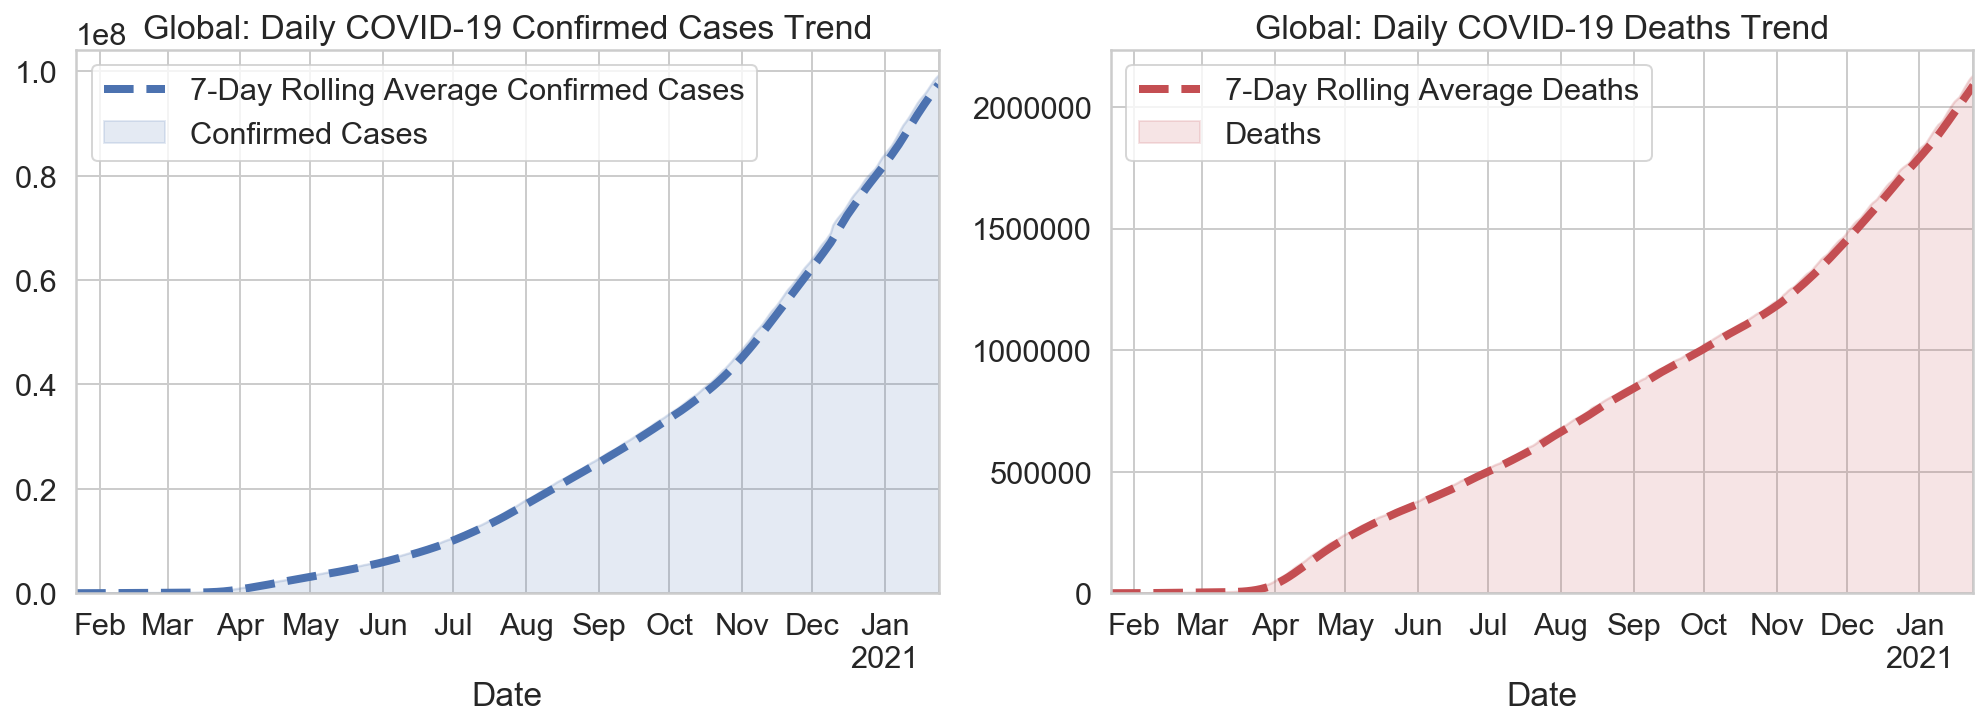

In [954]:
# Set up matplotlib figure
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":1, "axes.titlesize":17})
# Set the format of the chart
f, ax = plt.subplots(figsize=(17,5), ncols=2,
                     sharex=False)
# Plot global monthly new cases trend
world_cases_all_time.groupby('Date')["7-Day Rolling Average Confirmed Cases"].sum().plot(ax=ax[0], kind="line",
        title = "Global: Daily COVID-19 Confirmed Cases Trend",linestyle="dashed", linewidth=4, legend=True)
world_cases_all_time.groupby('Date')["Confirmed Cases"].sum().plot(ax=ax[0], kind="area", color = "b", alpha = .15,
        title = "Global: Daily COVID-19 Confirmed Cases Trend", legend=True)

# Plot monthly new deaths trend
world_cases_all_time.groupby('Date')["7-Day Rolling Average Deaths"].sum().plot(ax=ax[1], kind="line",
        color='r', title="Global: Daily COVID-19 Deaths Trend", linestyle="dashed", linewidth=4, legend=True);
world_cases_all_time.groupby('Date')["Deaths"].sum().plot(ax=ax[1], kind="area", alpha=.15,
        color='r', title="Global: Daily COVID-19 Deaths Trend", legend=True)

plt.show();

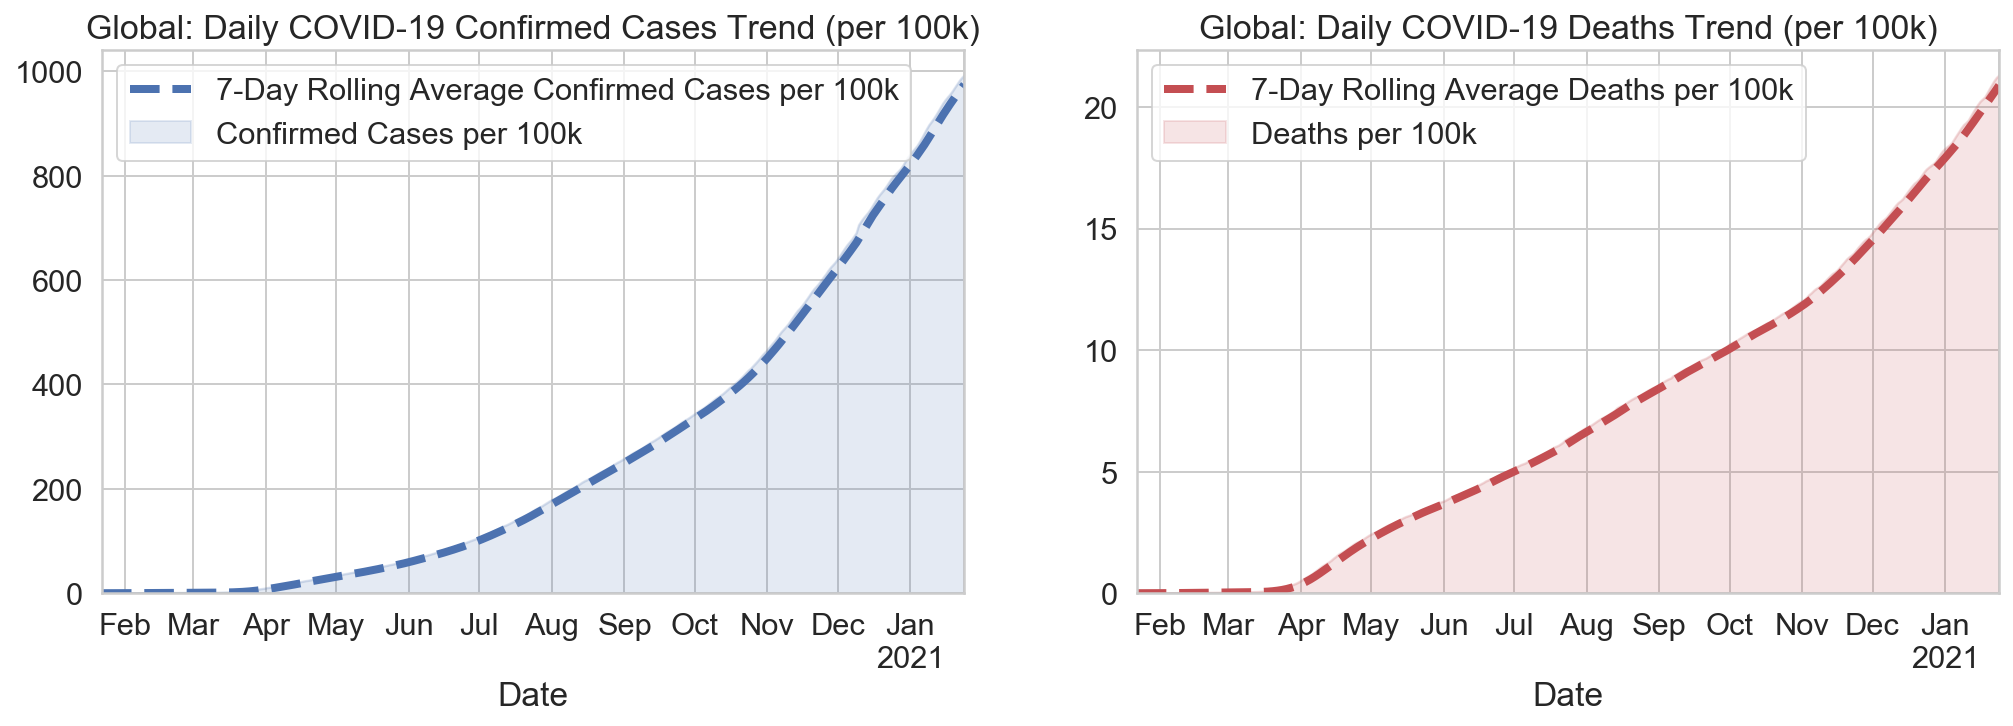

In [1380]:
# Set up matplotlib figure
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":1, "axes.titlesize":17})
# Set the format of the chart
f, ax = plt.subplots(figsize=(17,5), ncols=2,
                     sharex=False)
# Plot global monthly new cases trend
world_cases_all_time.groupby('Date')["7-Day Rolling Average Confirmed Cases per 100k"].sum().plot(ax=ax[0], kind="line",
        title = "Global: Daily COVID-19 Confirmed Cases Trend",linestyle="dashed", linewidth=4, legend=True)
world_cases_all_time.groupby('Date')["Confirmed Cases per 100k"].sum().plot(ax=ax[0], kind="area", color = "b", alpha = .15,
        title = "Global: Daily COVID-19 Confirmed Cases Trend (per 100k)", legend=True)

# Plot monthly new deaths trend
world_cases_all_time.groupby('Date')["7-Day Rolling Average Deaths per 100k"].sum().plot(ax=ax[1], kind="line",
        color='r', title="Global: Daily COVID-19 Deaths Trend", linestyle="dashed", linewidth=4, legend=True);
world_cases_all_time.groupby('Date')["Deaths per 100k"].sum().plot(ax=ax[1], kind="area", alpha=.15,
        color='r', title="Global: Daily COVID-19 Deaths Trend (per 100k)", legend=True)

plt.show();

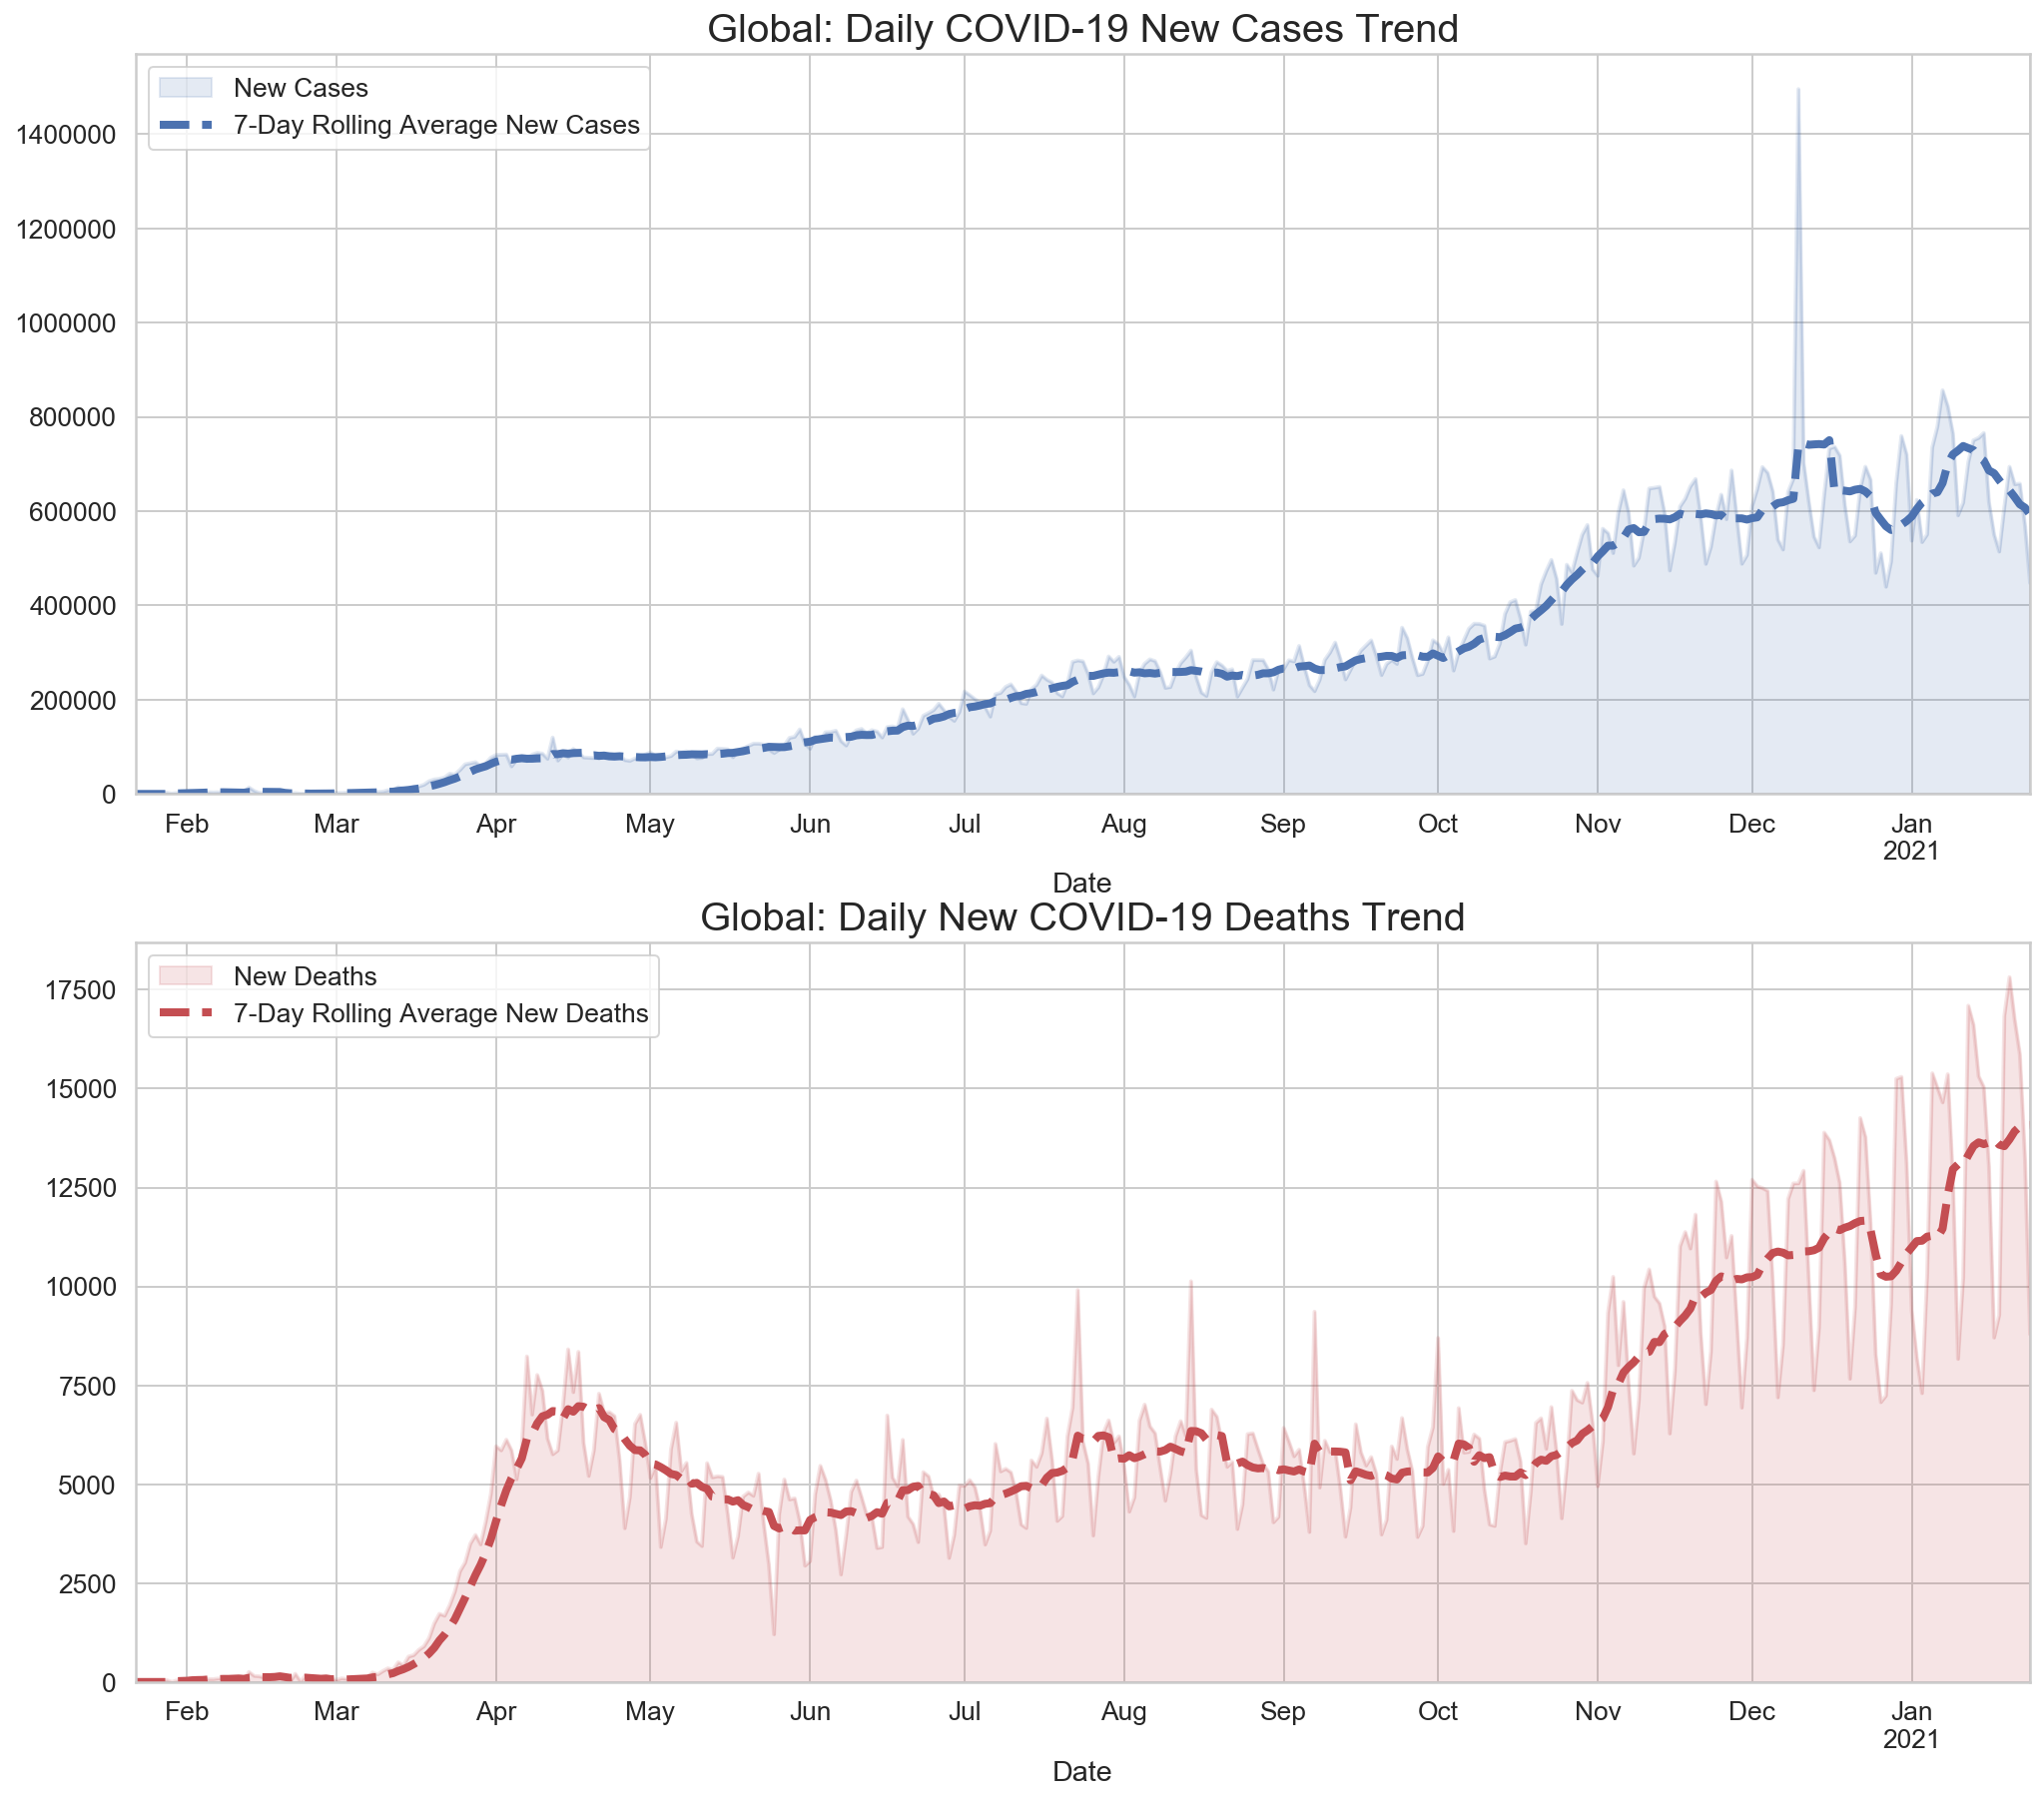

In [955]:
# Set up matplotlib figure
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2, "axes.titlesize":20})
# Set the format of the chart
f, ax = plt.subplots(figsize=(17,15), nrows=2,
                     sharex=False)
# Plot global monthly new cases trend
world_cases_all_time.groupby('Date')["New Cases"].sum().plot(ax=ax[0], kind="area",legend=True,
        title = "Global: Daily COVID-19 New Cases Trend", color="b", alpha=.15)
world_cases_all_time.groupby('Date')["7-Day Rolling Average New Cases"].sum().plot(ax=ax[0], kind="line",legend=True,
        title = "Global: Daily COVID-19 New Cases Trend", color="b", linestyle="dashed",linewidth=4)

# Plot monthly new deaths trend
world_cases_all_time.groupby('Date')["New Deaths"].sum().plot(ax=ax[1], kind="area", legend=True, color="r",alpha=.15,
        title="Global: Daily New COVID-19 Deaths Trend")
world_cases_all_time.groupby('Date')["7-Day Rolling Average New Deaths"].sum().plot(ax=ax[1], kind="line", legend=True,
        color='r', title="Global: Daily New COVID-19 Deaths Trend", linestyle="dashed", linewidth=4);

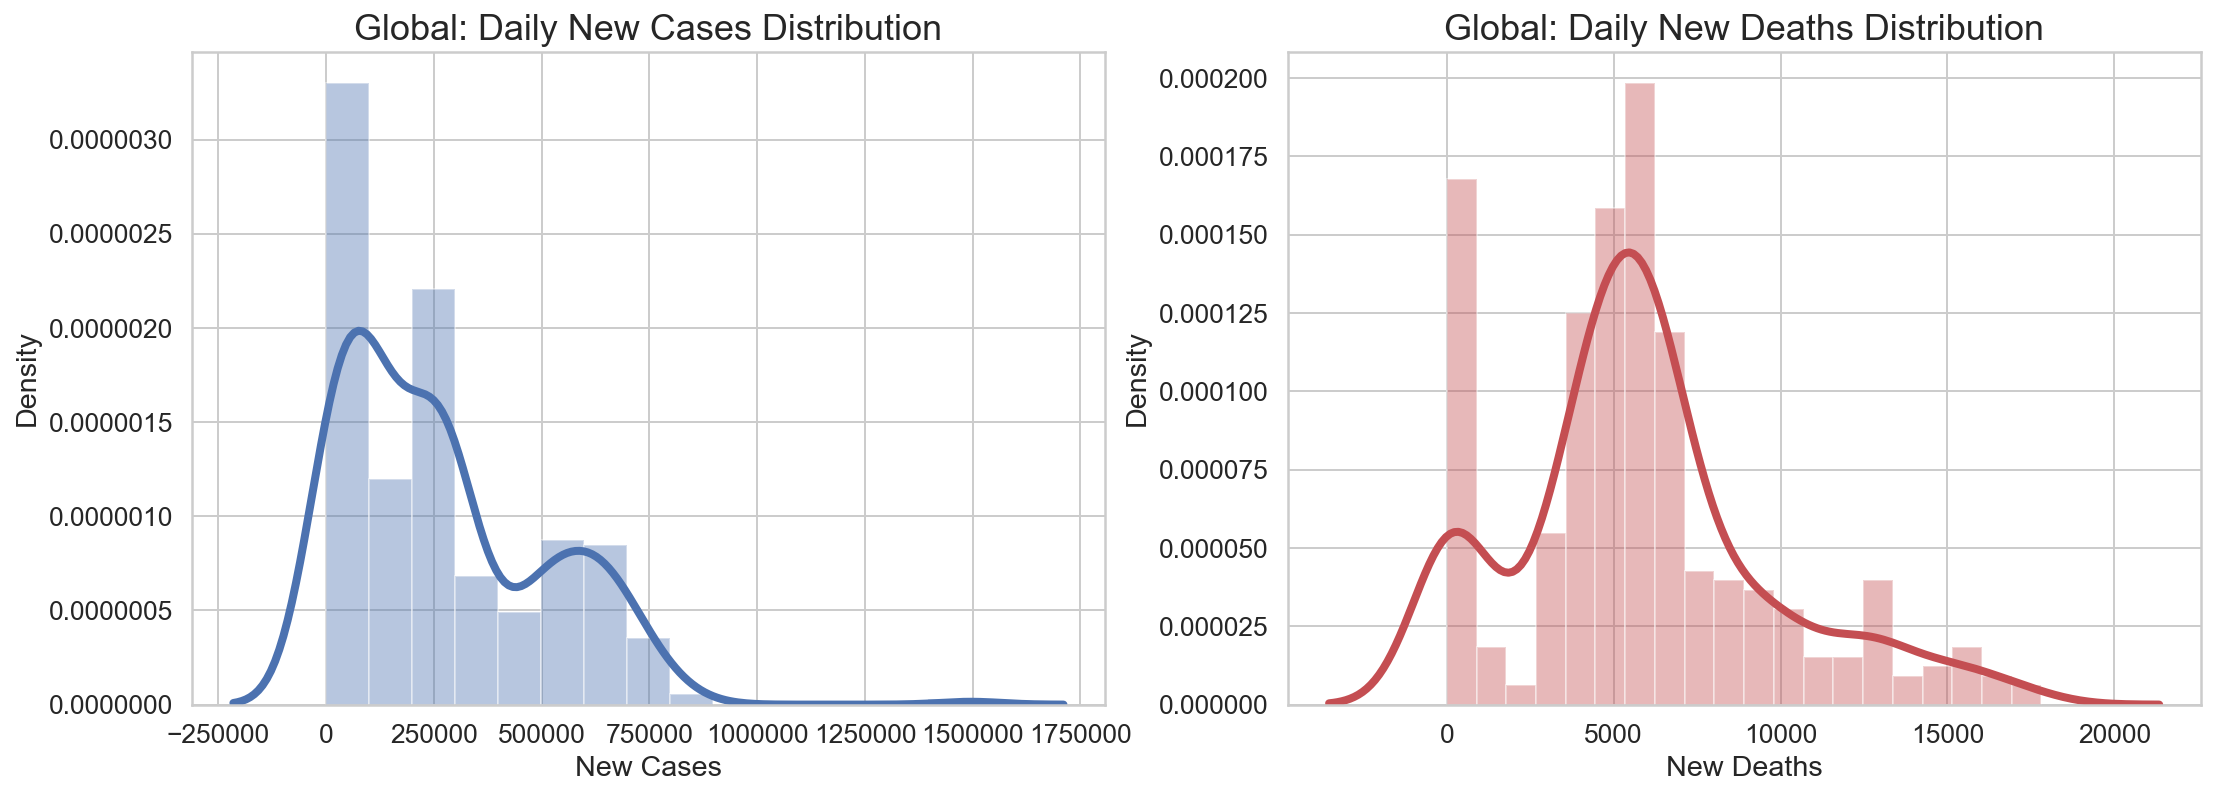

In [977]:
# KDE (Kernal Density Estimate) Plot: Visualize the distribution of observations in the dataset
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":4,
                                               "axes.titlesize":18})
f, ax = plt.subplots(figsize=(18,6), ncols=2)

# Plot KDE new cases
sns.distplot(world_cases_all_time["New Cases"].iloc[1:], kde=True, label = "New Cases", ax=ax[0])
ax[0].set_title("Global: Daily New Cases Distribution")

# Plot KDE new deaths
sns.distplot(world_cases_all_time["New Deaths"].iloc[1:], kde=True, ax=ax[1], color="r")
ax[1].set_title("Global: Daily New Deaths Distribution")

plt.show();

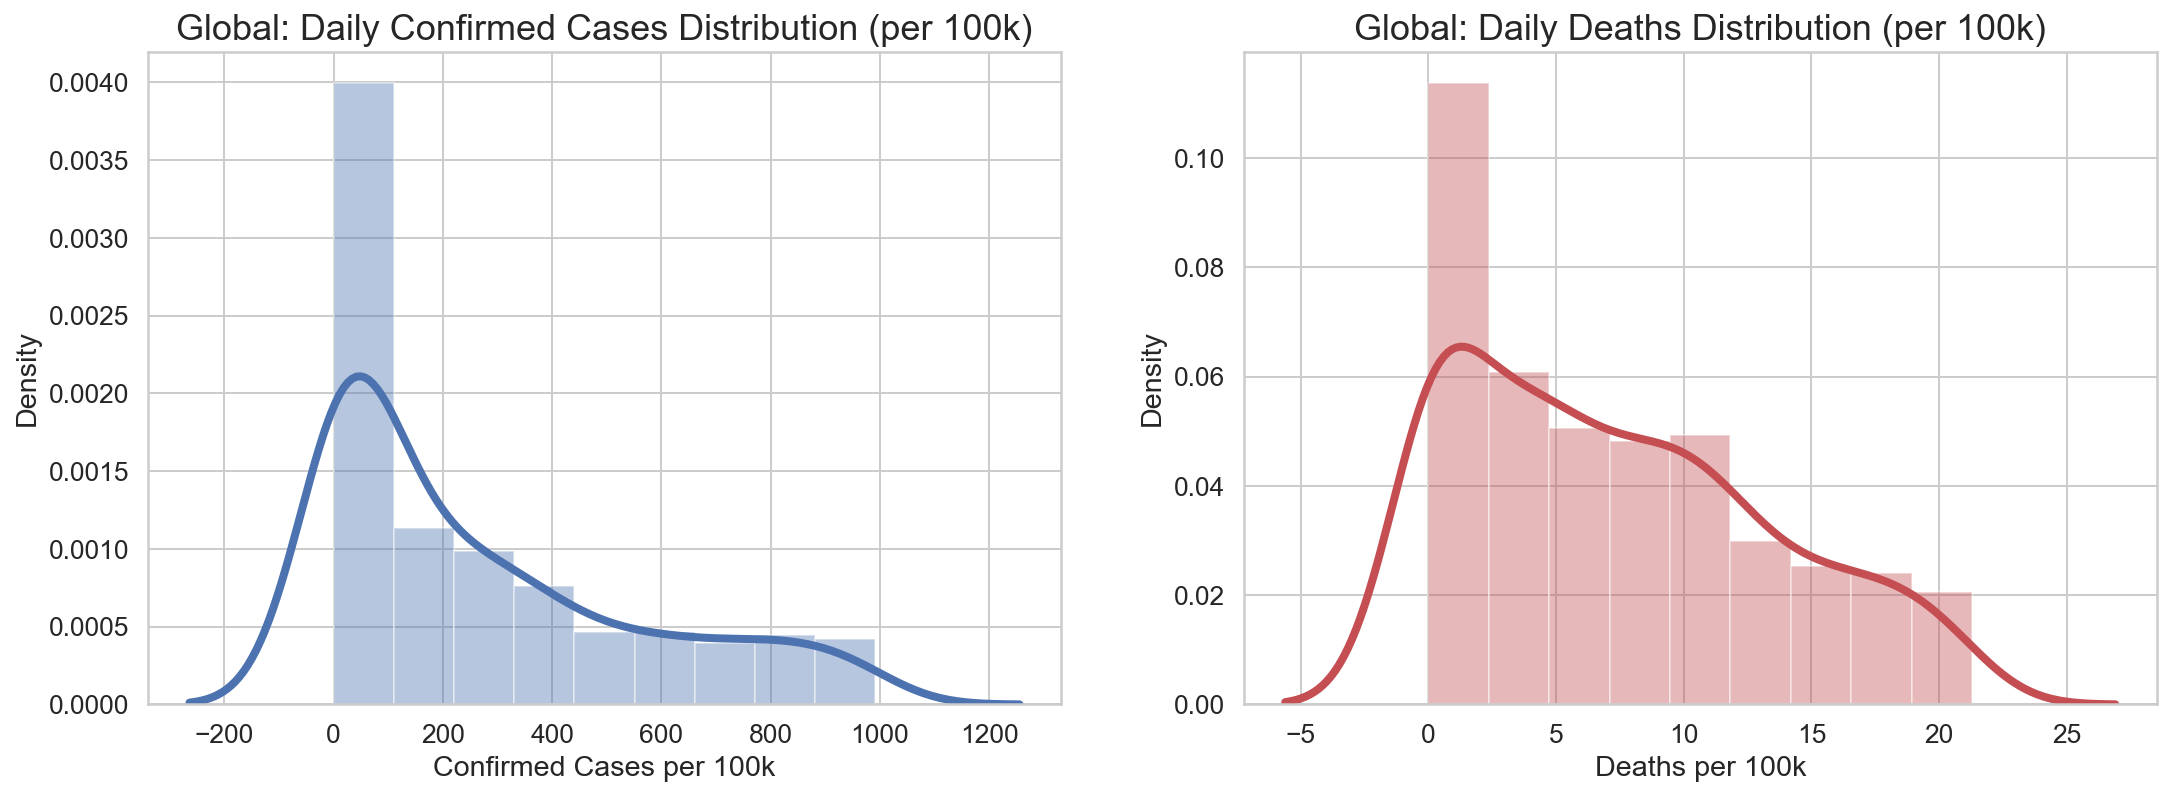

In [1383]:
# KDE (Kernal Density Estimate) Plot: Visualize the distribution of observations in the dataset
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":4,
                                               "axes.titlesize":18})
f, ax = plt.subplots(figsize=(18,6), ncols=2)

# Plot KDE new cases
sns.distplot(world_cases_all_time["Confirmed Cases per 100k"].iloc[1:], kde=True, label = "New Cases", ax=ax[0])
ax[0].set_title("Global: Daily Confirmed Cases Distribution (per 100k)")

# Plot KDE new deaths
sns.distplot(world_cases_all_time["Deaths per 100k"].iloc[1:], kde=True, ax=ax[1], color="r")
ax[1].set_title("Global: Daily Deaths Distribution (per 100k)")

plt.show();

# `US Timeline Analysis`

### How does the situation look like in the United States ?
 
  - 1. KDE (Kernal Density Estimate): Daily New Cases & Deaths Distribution.
  - 2. Bar Chart: Monthly Total New Cases and New Deaths in U.S.
  - 3. Boxplot: Monthly New Cases & Deaths Distribution
  - 4. Line & Area Chart: 7 Days Rolling Average of Confirmed Cases, Deaths, New Cases, New Deaths Over Time.
  - 5. Heatmap: New Cases & New Deaths for days of the month.
________________________________

In [1457]:
# Country_data
print("Up till {}".format(final_date))
print("United States has {} confirmed cases, {} deaths, and {}% fatality rate".\
      format(country_data[country_data['Country/Region']=='USA']['Confirmed Cases'].iloc[0],
            country_data[country_data['Country/Region']=='USA']['Deaths'].iloc[0],
            country_data[country_data['Country/Region']=='USA']['fatality_rate'].iloc[0]))

Up till 01/24/2021
United States has 25127000 confirmed cases, 419214 deaths, and 1.67% fatality rate


## 1. KDE (Kernal Density Estimate): Daily New Cases & Deaths Distribution.

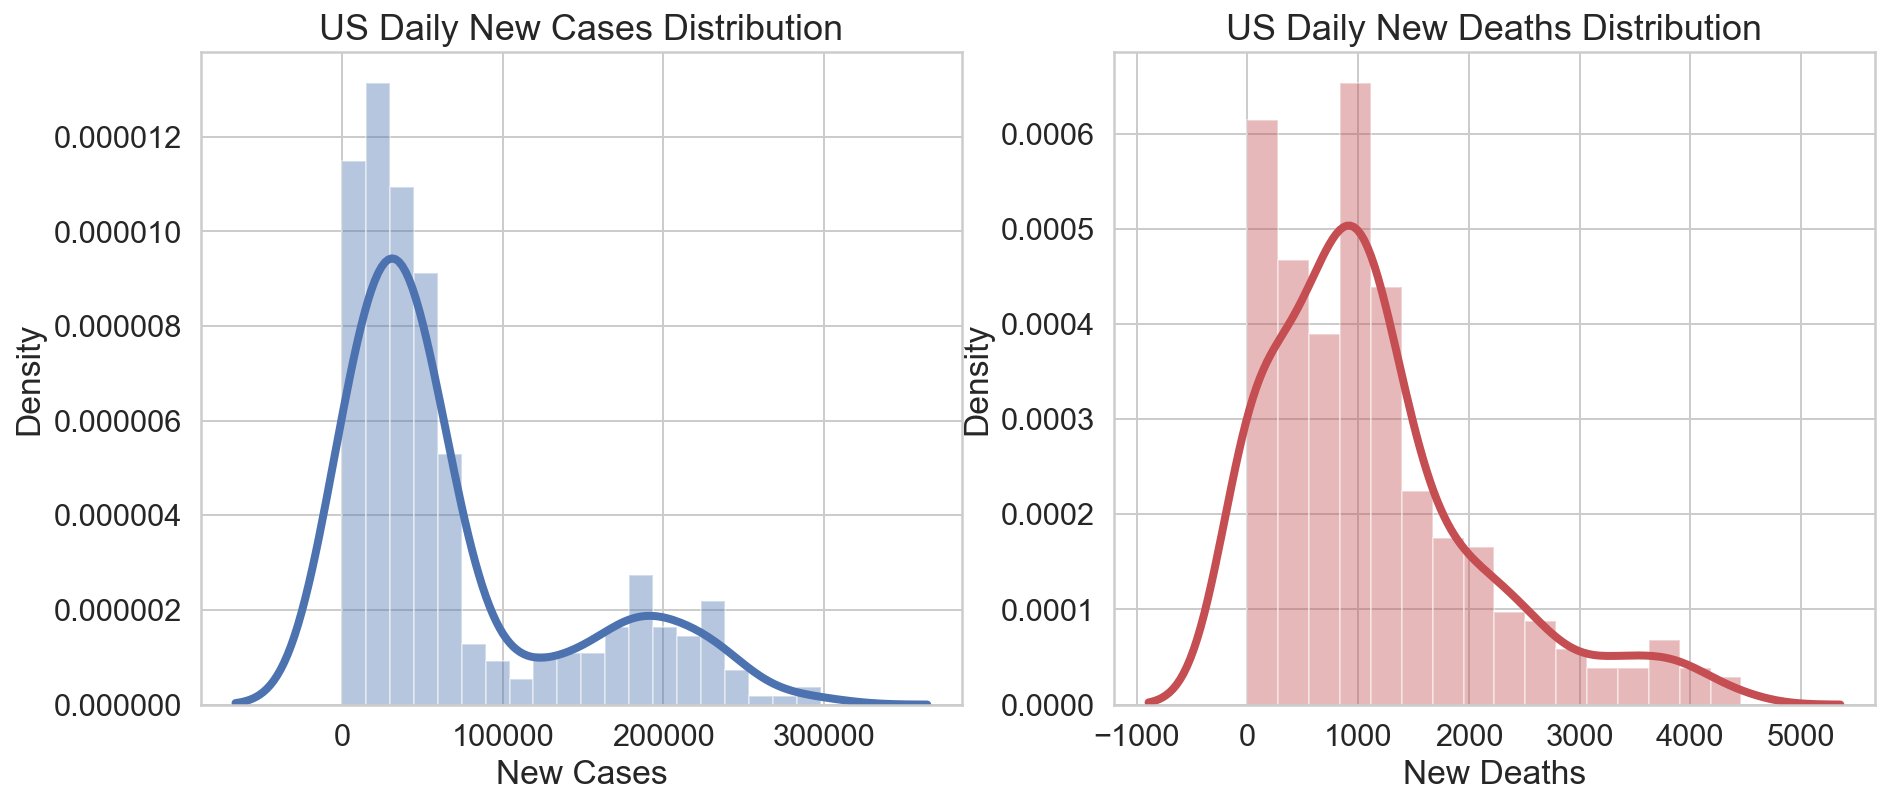

In [962]:
# KDE (Kernal Density Estimate) Plot: Visualize the distribution of observations in the dataset
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4,
                                               "axes.titlesize":18})
f, ax = plt.subplots(figsize=(15,6), ncols=2)

# Plot KDE US new cases
sns.distplot(us_df["New Cases"].iloc[1:], kde=True, ax=ax[0])
ax[0].set_title("US Daily New Cases Distribution")

# Plot KDE US new deaths
sns.distplot(us_df["New Deaths"].iloc[1:], kde=True, ax=ax[1], color="r")
ax[1].set_title("US Daily New Deaths Distribution")

plt.show();

## 2. Bar Chart: Monthly Total New Cases and New Deaths in U.S.

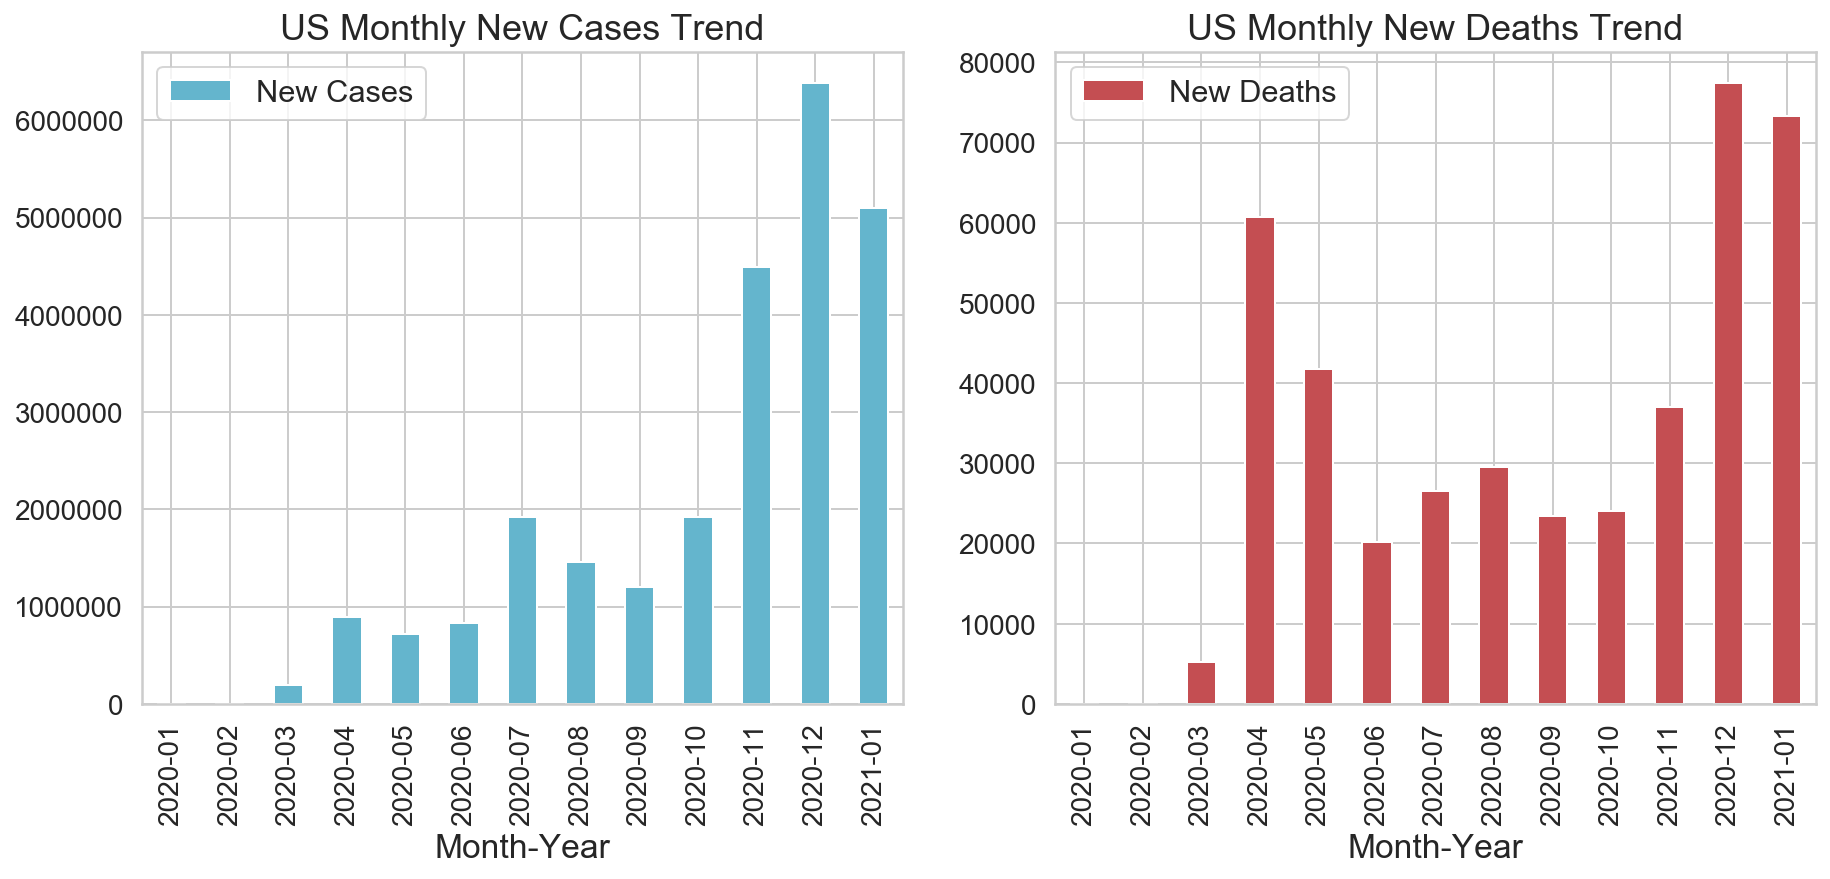

In [975]:
# BAR CHART: Plot total new cases in US 
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(15,6), ncols=2, sharex=False)

# Set figure style
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4, "axes.titlesize":18})


# Plot US Monthly New Cases Trend
us_df.groupby("Month-Year")['New Cases'].sum().plot(kind="bar",
    title="US Monthly New Cases Trend", color="c", legend="True", fontsize=14, ax=ax[0])

# Plot US Monthly New Deaths Trend
us_df.groupby("Month-Year")['New Deaths'].sum().plot(kind="bar",
    title="US Monthly New Deaths Trend", color="r", legend="True", fontsize=14, ax=ax[1])
plt.show()

## 3. Boxplot: Monthly New Cases & Deaths Distribution

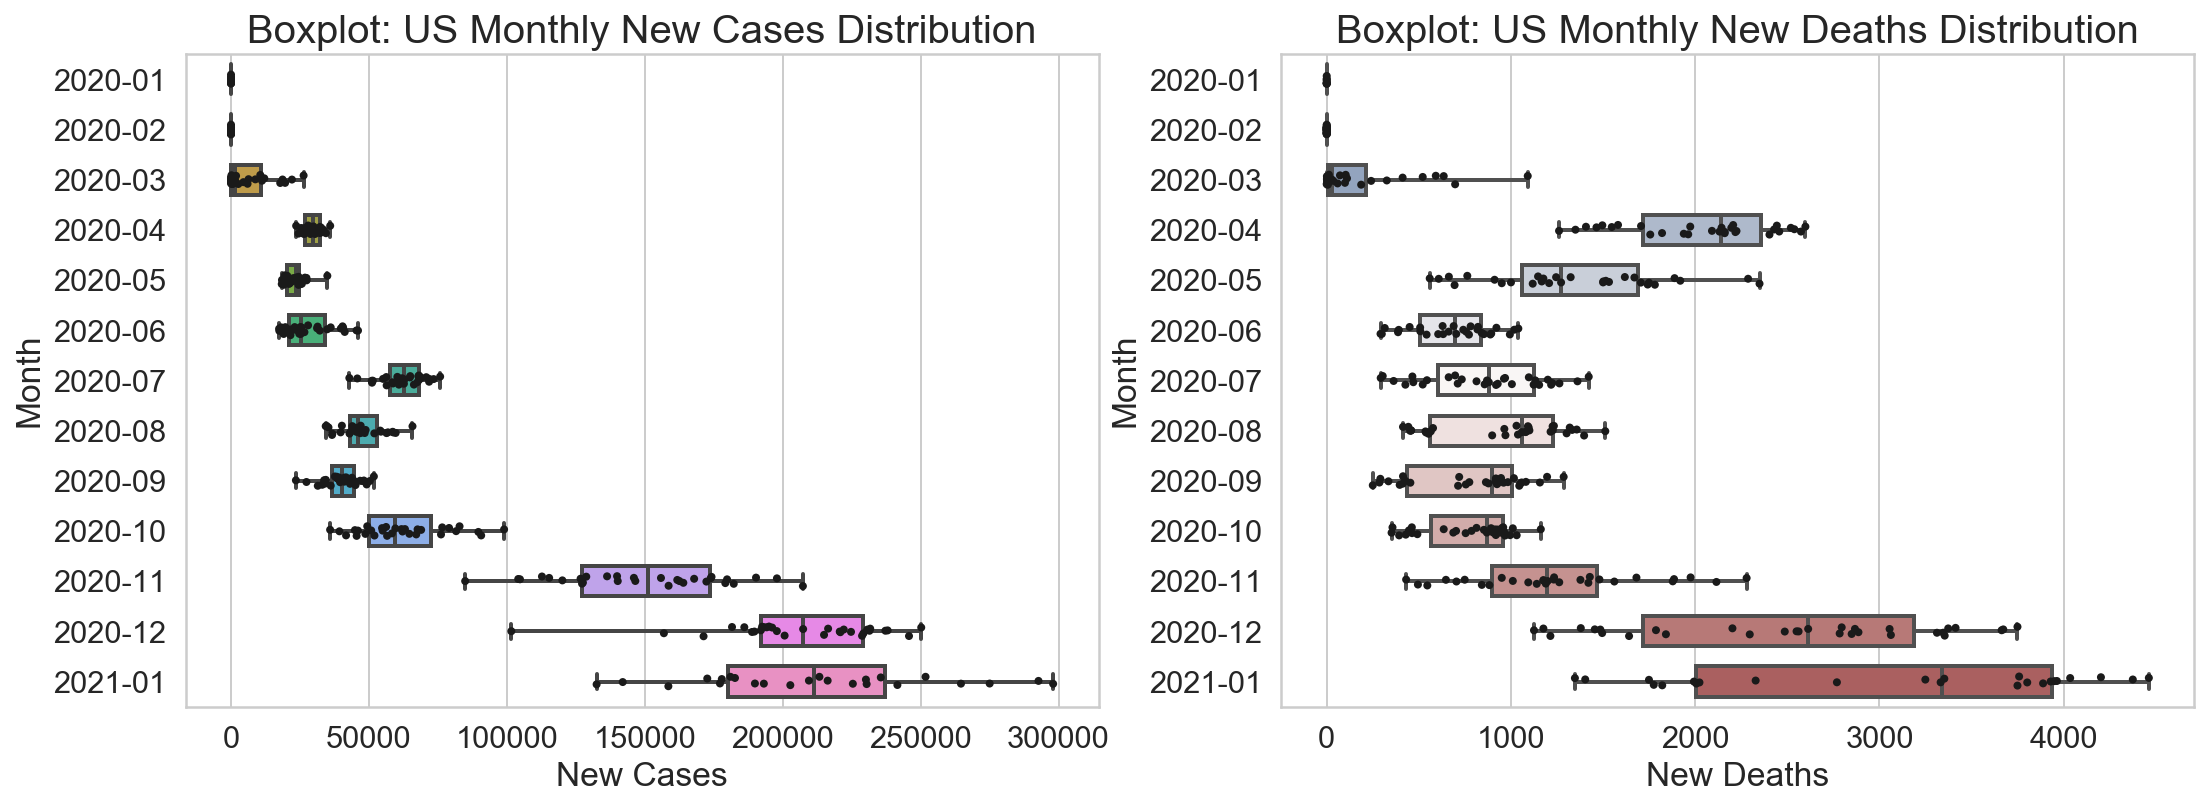

In [1440]:
# Set up the plot view (BOXPLOTS)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":2, "axes.titlesize":20})
f,ax = plt.subplots(figsize=(18,6),ncols=2)

# Plot new cases distribution by month in US
# Plot the orbital period with horizontal boxes
sns.boxplot(x="New Cases", y="Month-Year", data=us_df, whis=[0,100], width=.6,ax=ax[0])

# Add in points to show each obersvation
sns.stripplot(x="New Cases", y="Month-Year", data=us_df, size=4, color=".1", linewidth=0,ax=ax[0])

# Tweak the visual presentation
ax[0].xaxis.grid(True)
ax[0].set(ylabel="Month", title="Boxplot: US Monthly New Cases Distribution")

#Plot new deaths distribution by month in US
# Plot the orbital period with horizontal boxes
sns.boxplot(x="New Deaths", y="Month-Year", data=us_df, whis=[0,100], width=.6,ax=ax[1], palette="vlag")

# Add in points to show each obersvation
sns.stripplot(x="New Deaths", y="Month-Year", data=us_df, size=4, color=".1", linewidth=0, ax=ax[1])

# TEak the visual presentation
ax[1].xaxis.grid(True)
ax[1].set(ylabel="Month", title="Boxplot: US Monthly New Deaths Distribution")

plt.show();

## 4. Line & Area Chart: 7-Day Rolling Average COVID New Cases & Deaths in US Over Time

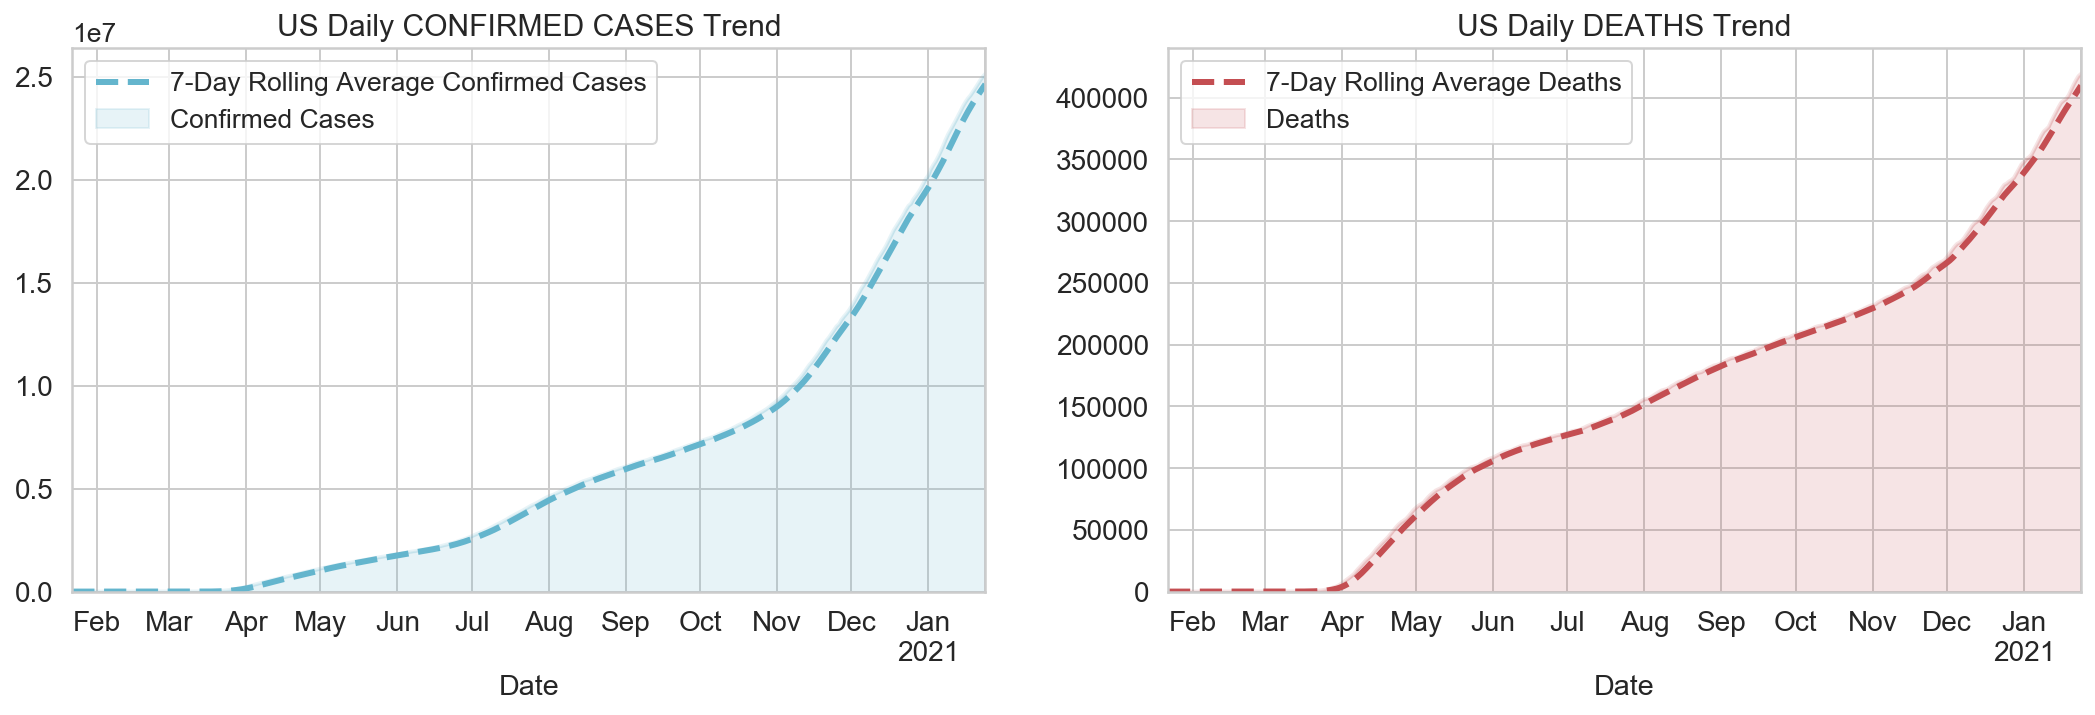

In [1004]:
# # LINE & AREA CHARTS - CONFIRMED CASES & DEATHS
# Set up seaborn chart configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2,"axes.titlesize":15})
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,5), ncols=2, sharex=False)

# Plot US Daily New Cases Trend
us_df.groupby("Date")['7-Day Rolling Average Confirmed Cases'].sum().plot(kind="line",
        title="US Daily CONFIRMED CASES Trend", color="c", legend="True", fontsize=14, ax=ax[0],linestyle="dashed", linewidth=3)
us_df.groupby("Date")['Confirmed Cases'].sum().plot(kind="area",
        title="US Daily CONFIRMED CASES Trend", color="c", legend="True", alpha=.15, fontsize=14, ax=ax[0])
# Plot US Daily New Deaths Trend
us_df.groupby("Date")['7-Day Rolling Average Deaths'].sum().plot(kind="line", 
        title="US Daily DEATHS Trend", color="r", legend="True", fontsize=14, ax=ax[1], linestyle="dashed", linewidth=3)
us_df.groupby("Date")['Deaths'].sum().plot(kind="area", 
        title="US Daily DEATHS Trend", color="r", legend="True", alpha=.15, fontsize=14, ax=ax[1])
plt.show();

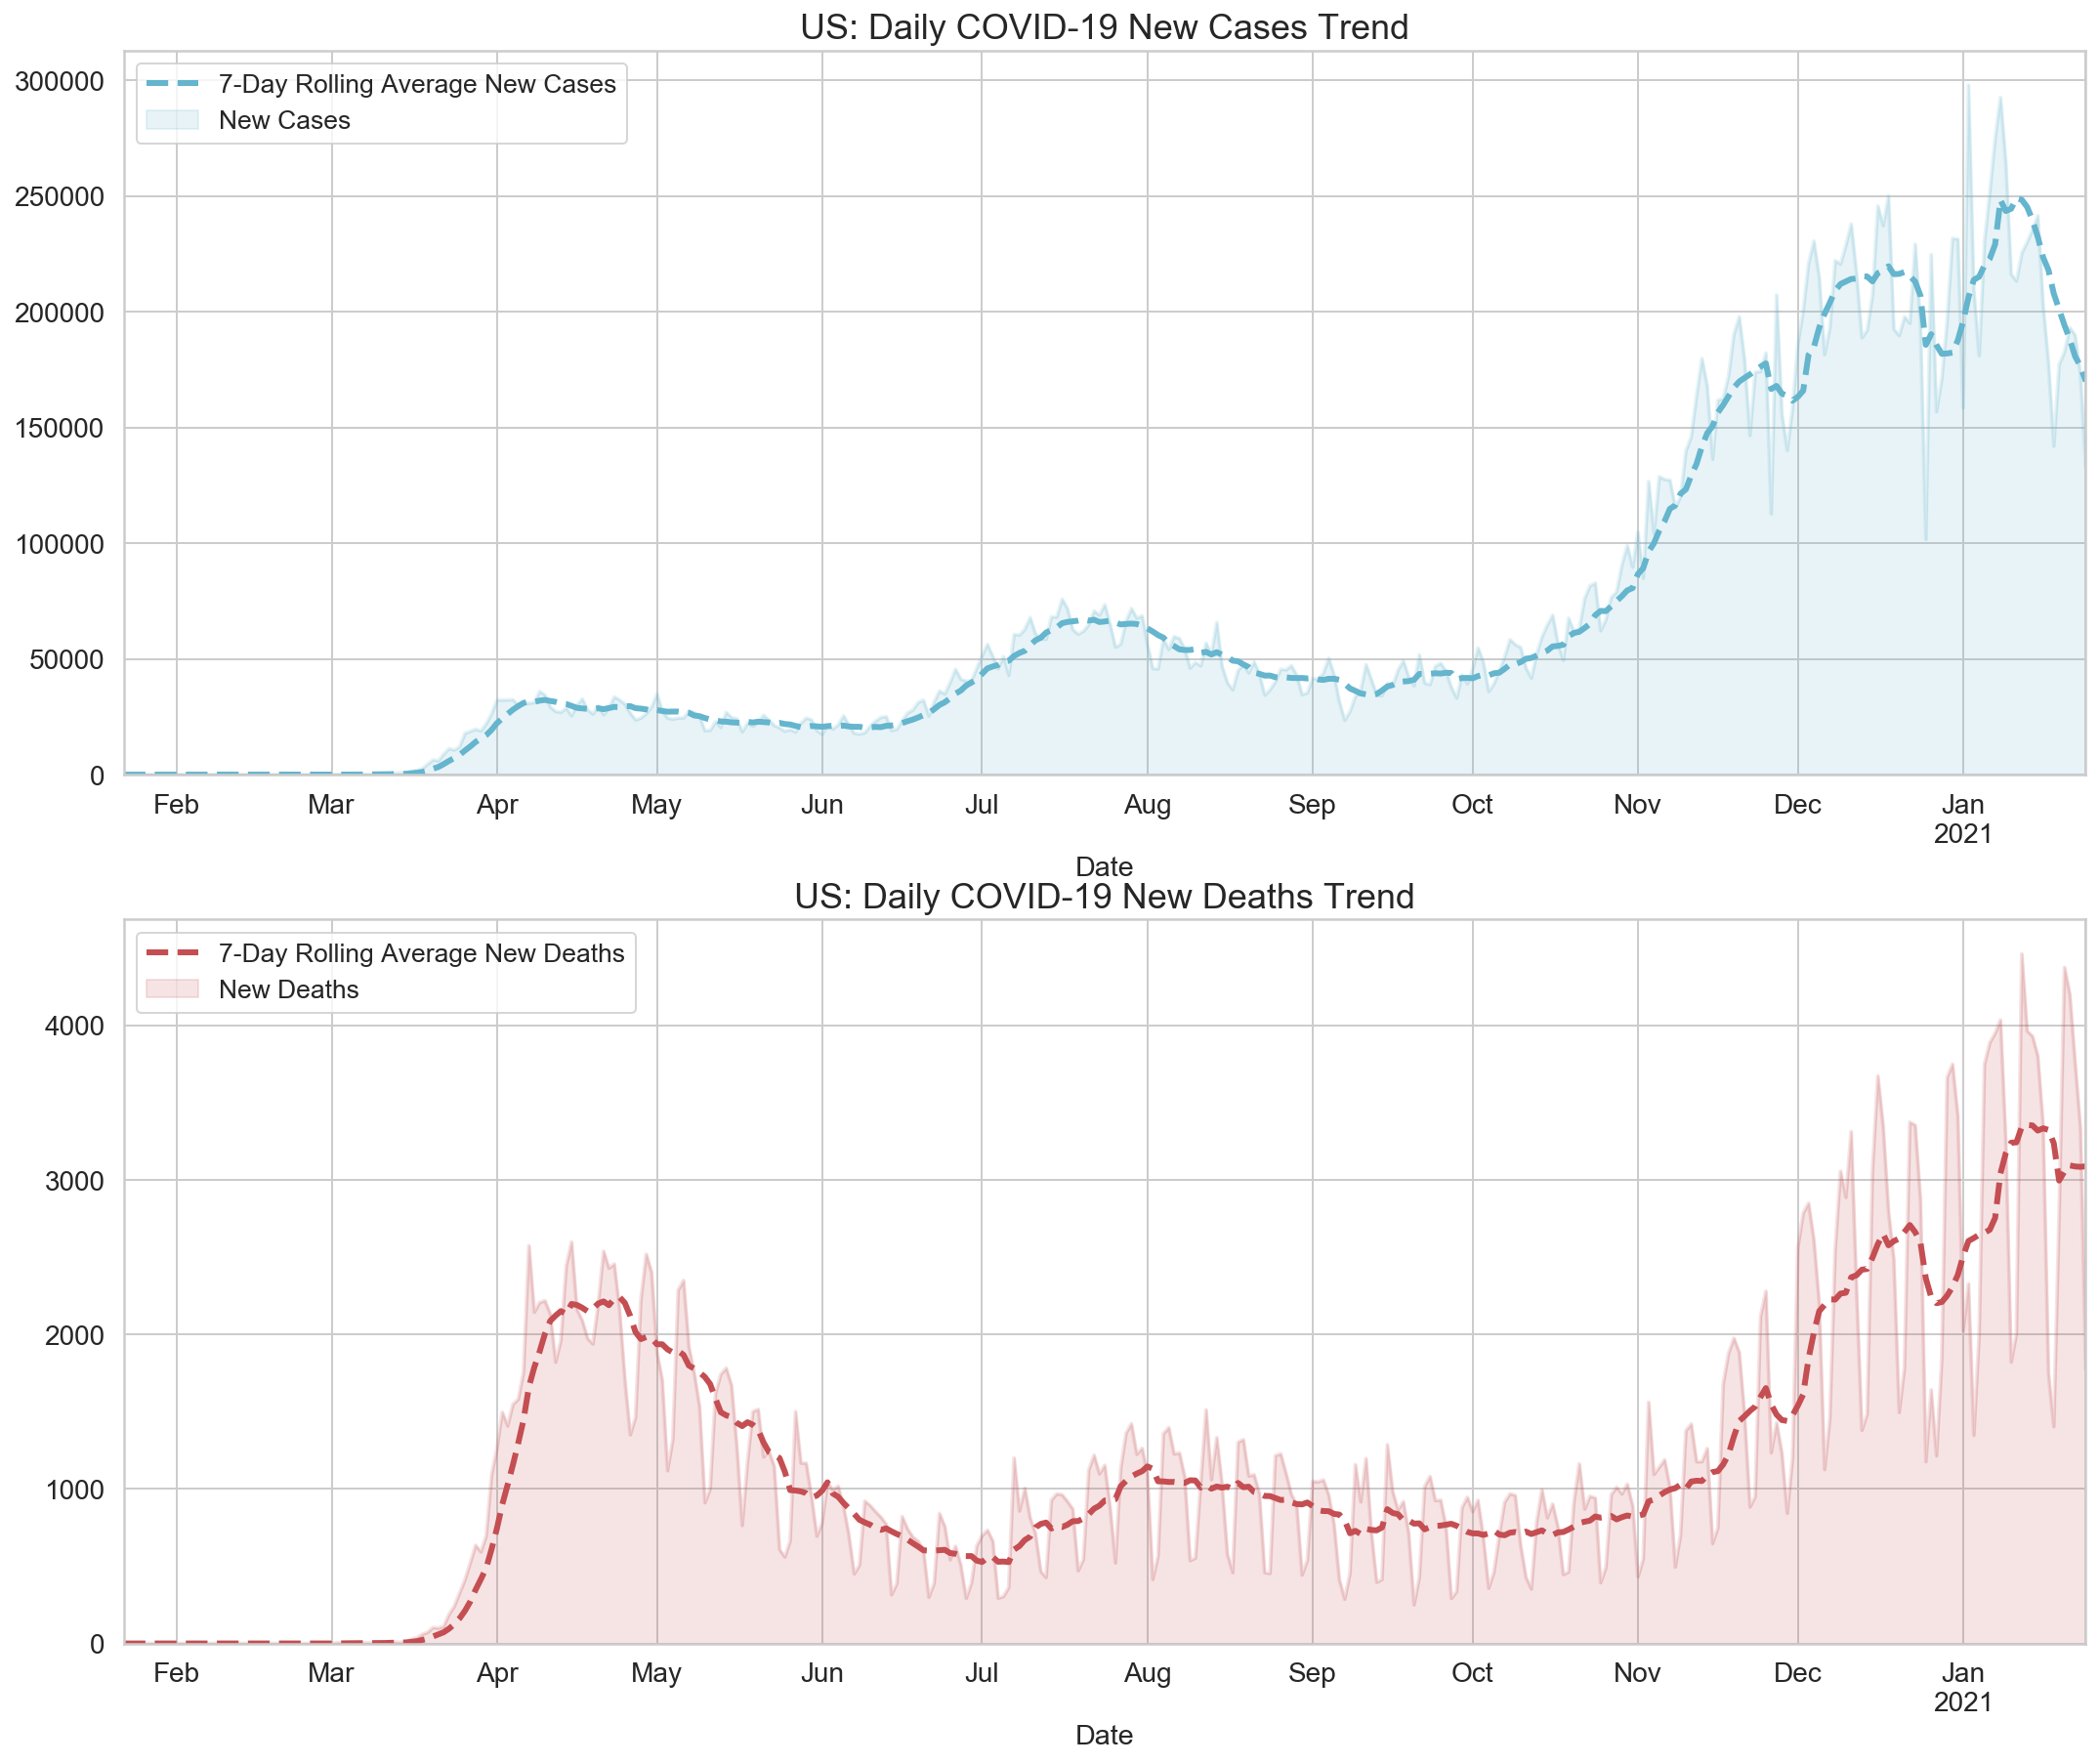

In [1003]:
# LINE & AREA CHARTS - NEW CASES & DEATHS
# Set up seaborn chart configuration
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2, "axes.titlesize":18})
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,15), nrows=2, sharex=False)
# Plot US Daily New Cases Trend
us_df.groupby("Date")['7-Day Rolling Average New Cases'].sum().plot(kind="line", color="c", legend="True", fontsize=14, ax=ax[0],linestyle="dashed", linewidth=3)
us_df.groupby("Date")['New Cases'].sum().plot(kind="area",
        title="US: Daily COVID-19 New Cases Trend", color="c", legend="True", alpha=.15, fontsize=14, ax=ax[0])
# Plot US Daily New Deaths Trend
us_df.groupby("Date")['7-Day Rolling Average New Deaths'].sum().plot(kind="line", 
        title="US Daily DEATHS Trend", color="r", legend="True", fontsize=14, ax=ax[1], linestyle="dashed", linewidth=3)
us_df.groupby("Date")['New Deaths'].sum().plot(kind="area", 
        title="US: Daily COVID-19 New Deaths Trend", color="r", legend="True", alpha=.15, fontsize=14, ax=ax[1])
plt.show();

## 5. Heatmap: New Cases & New Deaths Every Day of The Month.


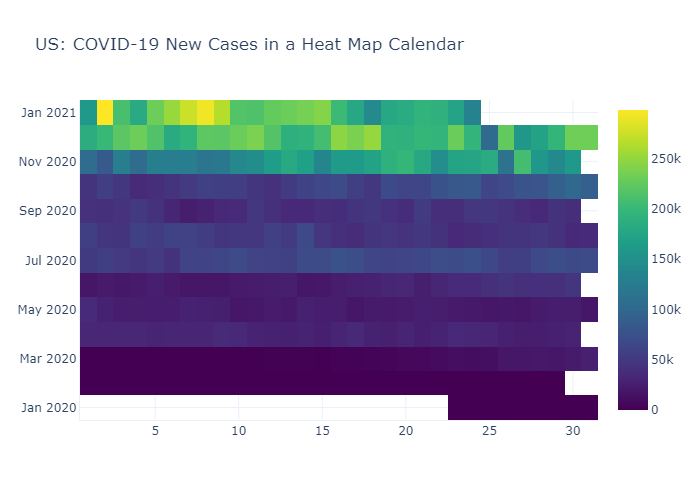

In [1462]:
us_df['Month-Year'] = us_df['Month-Year'].apply(str)
us_df['Day'] = us_df['Day'].apply(str)
# Heatmap - demonstrate the number of new cases
fig7 = go.Figure(data=go.Heatmap( z=us_df['New Cases'], x=us_df['Day'], y=us_df['Month-Year'],
        colorscale='Viridis'))
fig7.update_layout(title = 'US: COVID-19 New Cases in a Heat Map Calendar')
#fig5.show()
Image(pio.to_image(fig7, format='png'))

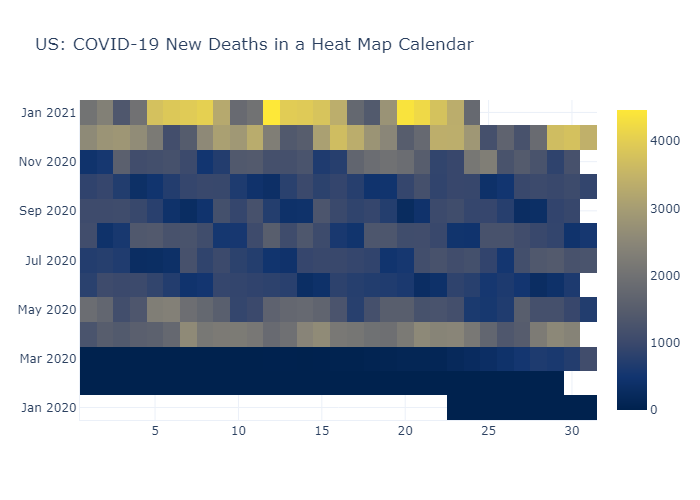

In [1463]:
# Heatmap - demonstrate the number of new deaths
us_df['Month-Year'] = us_df['Month-Year'].apply(str)
us_df['Day'] = us_df['Day'].apply(str)
fig8 = go.Figure(data=go.Heatmap( z=us_df['New Deaths'], x=us_df['Day'], y=us_df['Month-Year'],
        colorscale='Cividis'))
fig8.update_layout(title = 'US: COVID-19 New Deaths in a Heat Map Calendar')
#fig6.show()
Image(pio.to_image(fig8, format='png'))

# `U.S. vs. The Rest of The World Comparison`
___________________________________________

- Understand the difference between U.S. and The Rest of The World by looking at:

    - The increase in cases and deaths on a Monthly basis.
    - The increase in cases and deaths on a Daily basis.
 
_From November 2020 to 2021, the number of new cases in the U.S. was almost half the total number of new cases all over the world._

_From May to November 2020, US had a low and constant number of deaths but that number was significantly increase in December 2020 and January 2021. The total number of deaths in the U.S. was approximately one-fourth that number of the rest of the world._
   
_There was spike in new cases for the rest of the world as of the end of December 2020 and the start of January 2021 while the number of new cases in the U.S. was quite stable during that time._

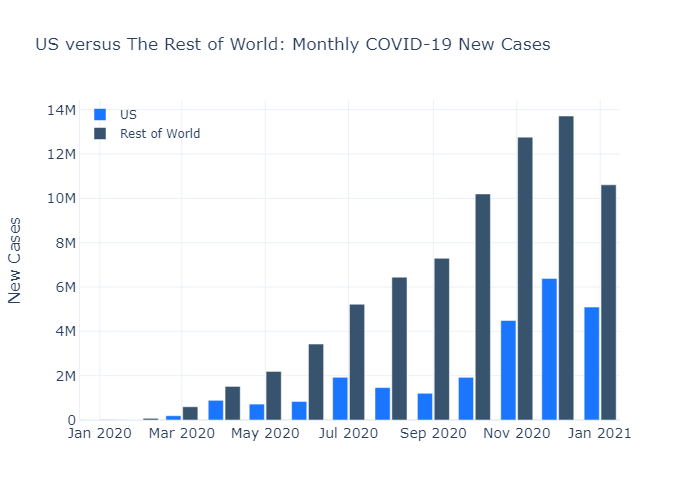

In [1464]:
fig9 = go.Figure()
fig9.add_trace(go.Bar(x=[str(i) for i in us_df.groupby('Month-Year')['New Cases'].sum().index],    # Add month
                      y=us_df.groupby('Month-Year')['New Cases'].sum().values,
                      name="US",
                      marker_color='rgb(26, 118, 255)'))  # Add total monthly new cases 
fig9.add_trace(go.Bar(x=[str(i) for i in world_cases_all_time.groupby('Month-Year')['Rest of World New Cases'].sum().index],
                      y=world_cases_all_time.groupby('Month-Year')['Rest of World New Cases'].sum().values,
                      name="Rest of World",
                      marker_color='rgb(55, 83, 109)'))
fig9.update_layout(title='US versus The Rest of World: Monthly COVID-19 New Cases',
                  xaxis_tickfont_size=14,
                  yaxis=dict(title='New Cases',
                            titlefont_size=16,
                            tickfont_size=14),
                  legend=dict(x=0, y=1.0,
                             bgcolor='rgba(255, 255, 255, 0)',
                             bordercolor='rgba(255, 255, 255, 0)'),
                  barmode='group', 
                  bargap =0.15,
                 bargroupgap=0.1)
#fig9.show()                    # interactive chart
Image(pio.to_image(fig9, format='png'))

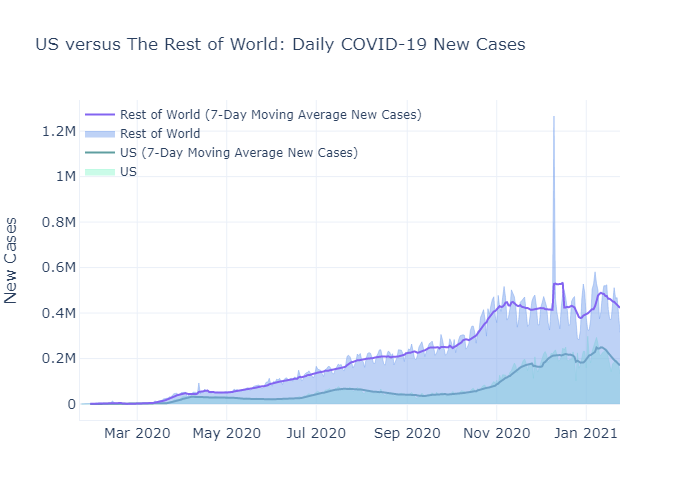

In [1465]:
# AREA PLOT: US vs THE WORLD : DAILY COVID-19 NEW DEATHS
line_us = go.Figure() 

line_us.add_trace(go.Scatter(x=us_df["Date"], y=us_df["New Cases"],
                              fill='tonexty', name="US", line=dict(width=0.5, color='rgb(150, 247, 210)')))

line_us.add_trace(go.Scatter(x=us_df["Date"], y=us_df["7-Day Rolling Average New Cases"],
                             line= dict(color='cadetblue', width=2),
                             name="US (7-Day Moving Average New Cases)"))

line_us.add_trace(go.Scatter(x = world_cases_all_time["Date"], y=world_cases_all_time["Rest of World New Cases"],
                              name="Rest of World", fill='tozeroy',line=dict(width=0.5, color='rgb(127, 166, 238)')))


line_us.add_trace(go.Scatter(x= world_cases_all_time["Date"], y= world_cases_all_time["Rest of World 7-Day Rolling Average New Cases"],
                             line= dict(color='rgb(131, 100, 241)', width=2),
                             name="Rest of World (7-Day Moving Average New Cases)"))

line_us.update_layout(title='US versus The Rest of World: Daily COVID-19 New Cases',
                  xaxis_tickfont_size=14,
                  yaxis=dict(title='New Cases',
                            titlefont_size=16,
                            tickfont_size=14),
                  legend=dict(x=0, y=1.0,
                             bgcolor='rgba(255, 255, 255, 0)',
                             bordercolor='rgba(255, 255, 255, 0)'))

#line_us.show()
Image(pio.to_image(line_us, format='png'))

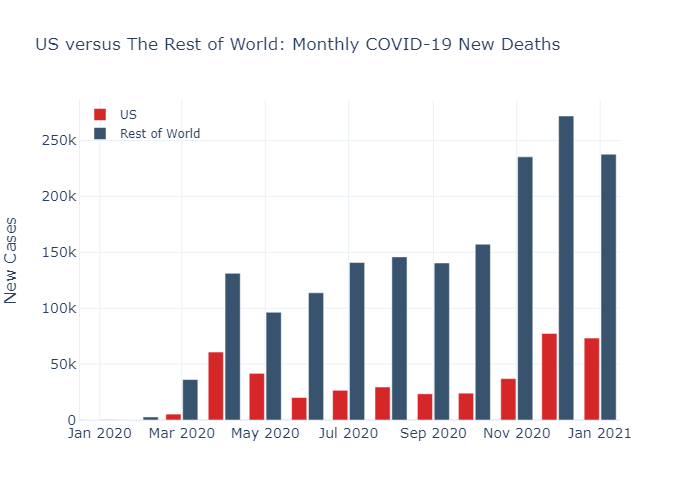

In [1466]:
fig10 = go.Figure()
fig10.add_trace(go.Bar(x=[str(i) for i in us_df.groupby('Month-Year')['New Deaths'].sum().index],    # Add month
                      y=us_df.groupby('Month-Year')['New Deaths'].sum().values,
                      name="US",
                      marker_color='#d62728'))  # Add total monthly new cases 
fig10.add_trace(go.Bar(x=[str(i) for i in world_cases_all_time.groupby('Month-Year')['Rest of World New Deaths'].sum().index],
                      y=world_cases_all_time.groupby('Month-Year')['Rest of World New Deaths'].sum().values,
                      name="Rest of World",
                      marker_color='rgb(55, 83, 109)'))
fig10.update_layout(title='US versus The Rest of World: Monthly COVID-19 New Deaths',
                  xaxis_tickfont_size=14,
                  yaxis=dict(title='New Cases',
                            titlefont_size=16,
                            tickfont_size=14),
                  legend=dict(x=0, y=1.0,
                             bgcolor='rgba(255, 255, 255, 0)',
                             bordercolor='rgba(255, 255, 255, 0)'),
                  barmode='group', 
                  bargap =0.15,
                 bargroupgap=0.1)
#fig10.show()                       # interactive chart
Image(pio.to_image(fig10, format='png'))

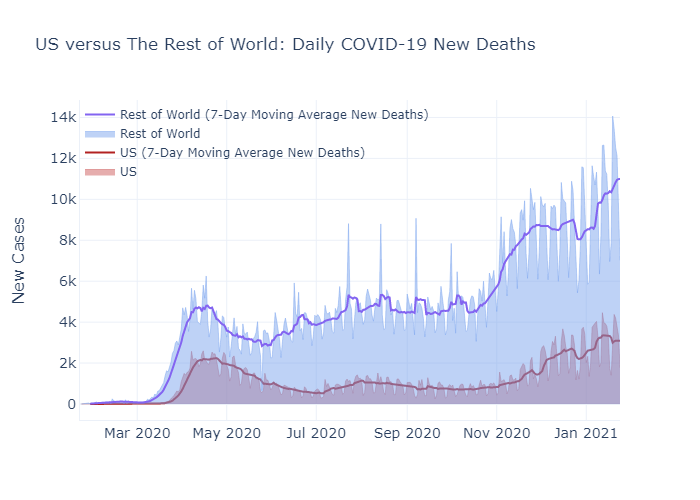

In [1467]:
# AREA PLOT: US vs THE WORLD : DAILY COVID-19 NEW DEATHS
line_us1 = go.Figure() 

line_us1.add_trace(go.Scatter(x=us_df["Date"], y=us_df["New Deaths"],
                              fill='tonexty', name="US", line=dict(width=0.5, color='indianred')))

line_us1.add_trace(go.Scatter(x=us_df["Date"], y=us_df["7-Day Rolling Average New Deaths"],
                             line= dict(color='firebrick', width=2),
                             name="US (7-Day Moving Average New Deaths)"))

line_us1.add_trace(go.Scatter(x = world_cases_all_time["Date"], y=world_cases_all_time["Rest of World New Deaths"],
                              name="Rest of World", fill='tozeroy',line=dict(width=0.5, color='rgb(127, 166, 238)')))


line_us1.add_trace(go.Scatter(x= world_cases_all_time["Date"], y= world_cases_all_time["Rest of World 7-Day Rolling Average New Deaths"],
                             line= dict(color='rgb(131, 100, 241)', width=2),
                             name="Rest of World (7-Day Moving Average New Deaths)"))

line_us1.update_layout(title='US versus The Rest of World: Daily COVID-19 New Deaths',
                  xaxis_tickfont_size=14,
                  yaxis=dict(title='New Cases',
                            titlefont_size=16,
                            tickfont_size=14),
                  legend=dict(x=0, y=1.0,
                             bgcolor='rgba(255, 255, 255, 0)',
                             bordercolor='rgba(255, 255, 255, 0)'))

#line_us.show()
Image(pio.to_image(line_us1, format='png'))


_______________________________
# `Vietnam Timeline Analysis`

### How does the COVID-19 situation look like in Vietnam ?

  1. KDE (Kernal Density Estimate): Daily New Cases & Deaths Distribution.
  2. Bar Chart: Monthly Total New Cases and New Deaths in 
  3. Boxplot: Monthly New Cases & Deaths Distribution
  4. Line & Area Chart: 7 Days Rolling Average of Confirmed Cases, Deaths, New Cases, New Deaths Over Time.
  5. Heatmap: New Cases & Deaths for days of the month.
___________________________

## 1. KDE (Kernal Density Estimate): Daily New Cases & Deaths Distribution

In [1456]:
# Country_data
print("Up till {}".format(final_date))
print("Vietnam has {} confirmed cases, {} deaths, and {}% fatality rate".\
      format(country_data[country_data['Country/Region']=='Vietnam']['Confirmed Cases'].iloc[0],
            country_data[country_data['Country/Region']=='Vietnam']['Deaths'].iloc[0],
            country_data[country_data['Country/Region']=='Vietnam']['fatality_rate'].iloc[0]))

Up till 01/24/2021
Vietnam has 1548 confirmed cases, 35 deaths, and 2.26% fatality rate


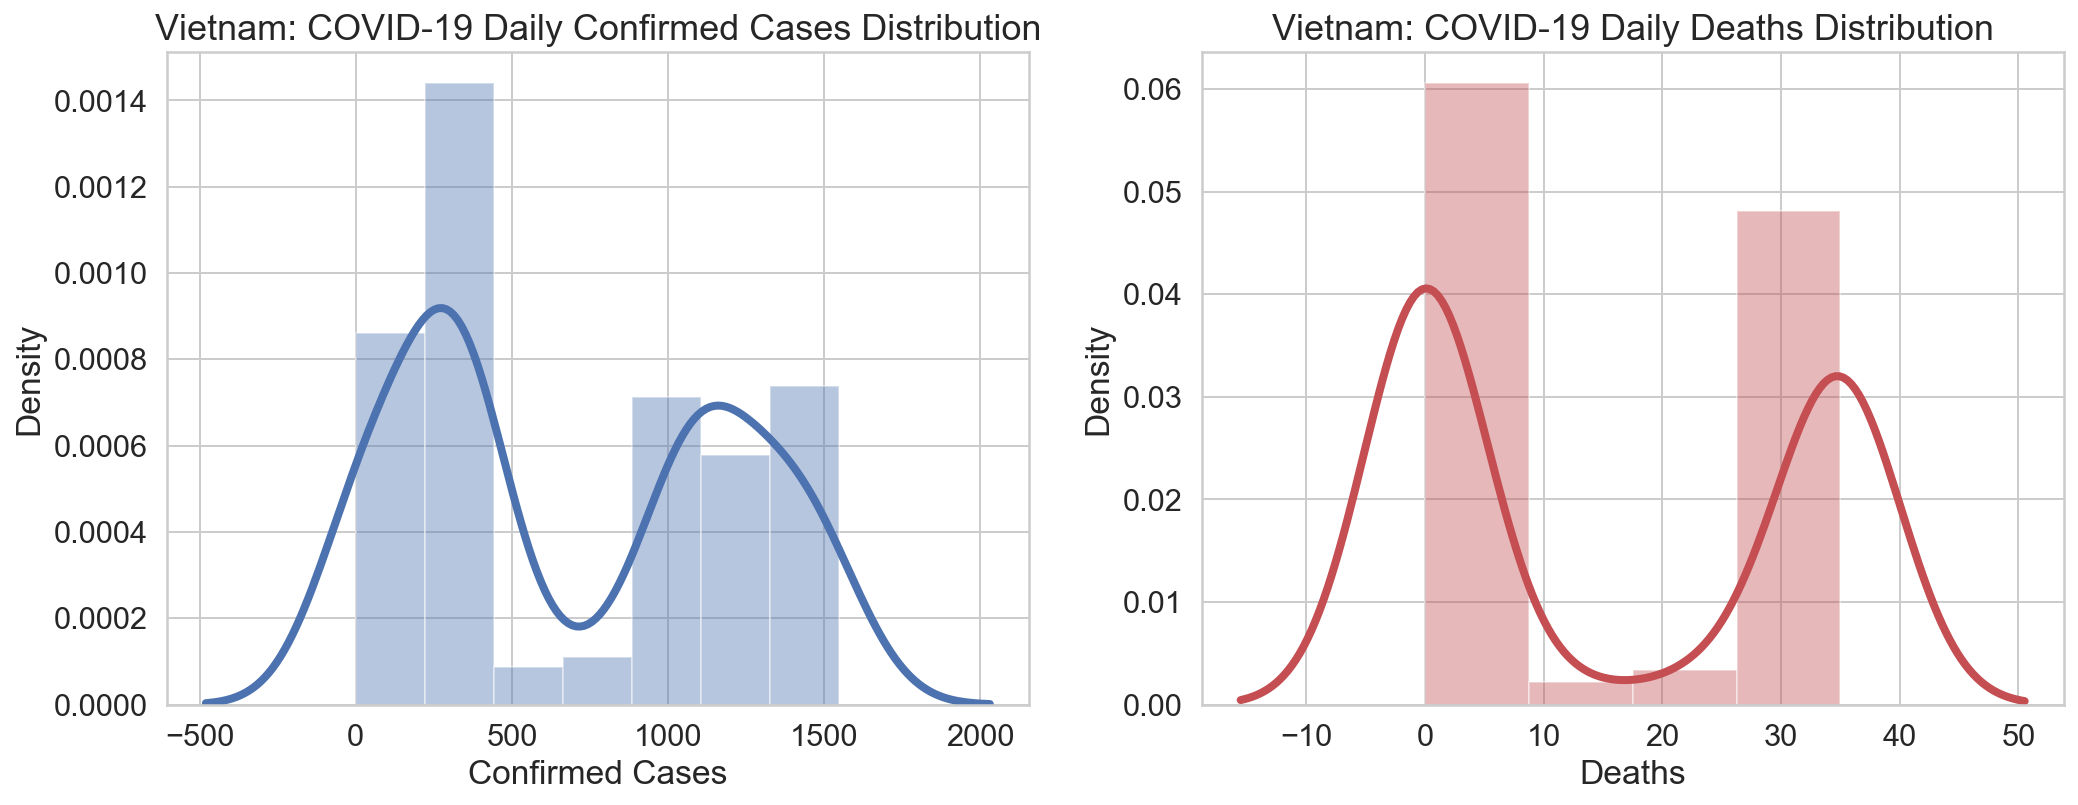

In [1021]:
# KDE (Kernal Density Estimate) Plot: Visualize the distribution of observations in the dataset
# Set up charts configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4,"axes.titlesize":18})
f, ax = plt.subplots(figsize=(17,6), ncols=2)

# Plot KDE VN daily new cases
sns.distplot(vn_df["Confirmed Cases"].iloc[1:], kde=True, ax=ax[0]),
ax[0].set_title("Vietnam: COVID-19 Daily Confirmed Cases Distribution")

# Plot KDE VN daily new deaths
sns.distplot(vn_df["Deaths"].iloc[1:], kde=True, ax=ax[1], color="r")
ax[1].set_title("Vietnam: COVID-19 Daily Deaths Distribution")

plt.show();

## 2. Bar Chart: Monthly Total New Cases and New Deaths in Vietnam

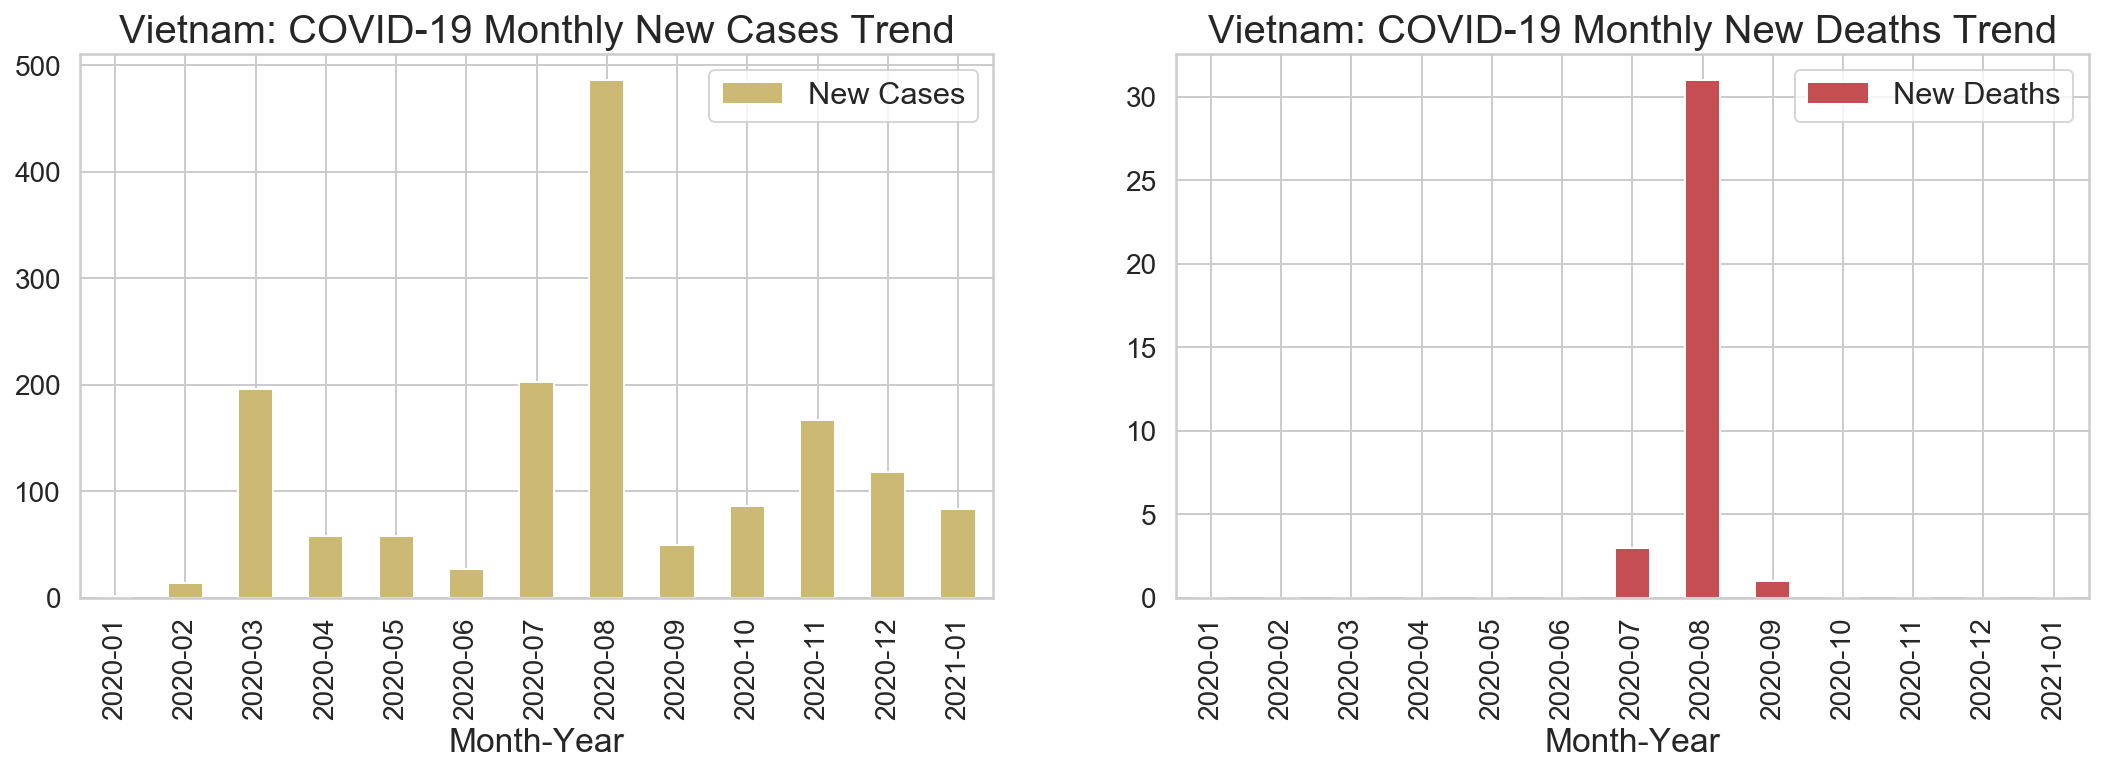

In [1018]:
# BAR CHART: Plot total new cases in VN 
# Set up seaborn chart configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4, "axes.titlesize":20})

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,5), ncols=2, sharex=False)

# Convert Month-Year format to string
vn_df['Month-Year'] = vn_df['Month-Year'].apply(str)

# Plot US Monthly New Cases Trend
vn_df.groupby("Month-Year")['New Cases'].sum().plot(kind="bar",
    title="Vietnam: COVID-19 Monthly New Cases Trend", color="y", legend="True", fontsize=14, ax=ax[0])

# Plot US Monthly New Deaths Trend
vn_df.groupby("Month-Year")['New Deaths'].sum().plot(kind="bar",
    title="Vietnam: COVID-19 Monthly New Deaths Trend", color="r", legend="True", fontsize=14, ax=ax[1])
plt.show();

#### There was a spike in number of new cases and new deaths during August in Vietnam.

#### It can happen because a tremendous of international students came home from Europe or America (hotspots of the pandemic), and many foreigners decided to go to Vietnam to avoid the pandemic in their country during the Summer. 


## 3. Boxplot: Monthly New Cases & Deaths Distribution

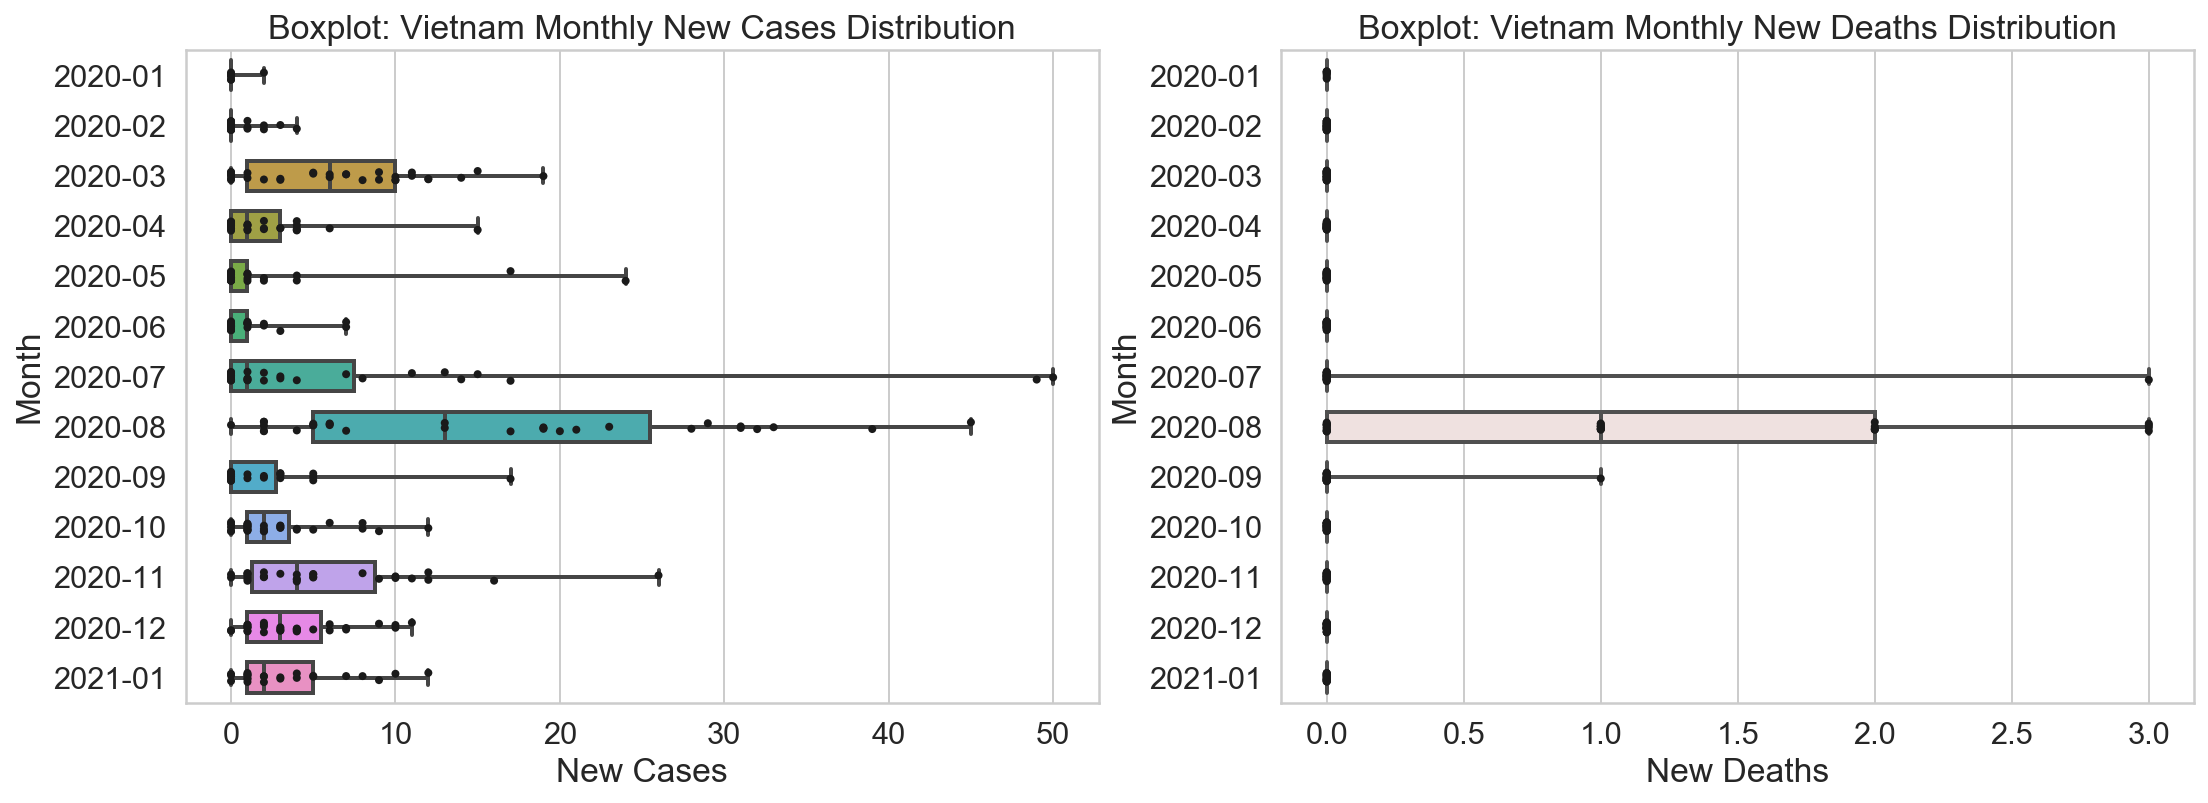

In [1441]:
# BOXPLOT: DISTRIBUTION of NEW CASES AND DEATHS BY MONTH
# Set up the plot view
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":2, "axes.titlesize":17})
f, ax = plt.subplots(figsize=(18,6),ncols=2)

# Plot New Cases distribution by month in Vietnam
# Plot the orbital period with horizontal boxes
sns.boxplot(x="New Cases", y="Month-Year", data=vn_df, whis=[0,100], width=.6,ax=ax[0])

# Add in points to show each obersvation
sns.stripplot(x="New Cases", y="Month-Year", data=vn_df, size=4, color=".1", linewidth=0,ax=ax[0])

# Tweak the visual presentation
ax[0].xaxis.grid(True)
ax[0].set(ylabel="Month", title="Boxplot: Vietnam Monthly New Cases Distribution")

#Plot New Deaths distribution by month in Vietnam
# Plot the orbital period with horizontal boxes
sns.boxplot(x="New Deaths", y="Month-Year", data=vn_df, whis=[0,100], width=.6,ax=ax[1], palette="vlag")

# Add in points to show each obersvation
sns.stripplot(x="New Deaths", y="Month-Year", data=vn_df, size=4, color=".1", linewidth=0, ax=ax[1])

# TEak the visual presentation
ax[1].xaxis.grid(True)
ax[1].set(ylabel="Month", title="Boxplot: Vietnam Monthly New Deaths Distribution")

plt.show();

## 4. Line & Area Chart: 7 Days Rolling Average of Confirmed Cases, Deaths, New Cases, New Deaths Over Time.

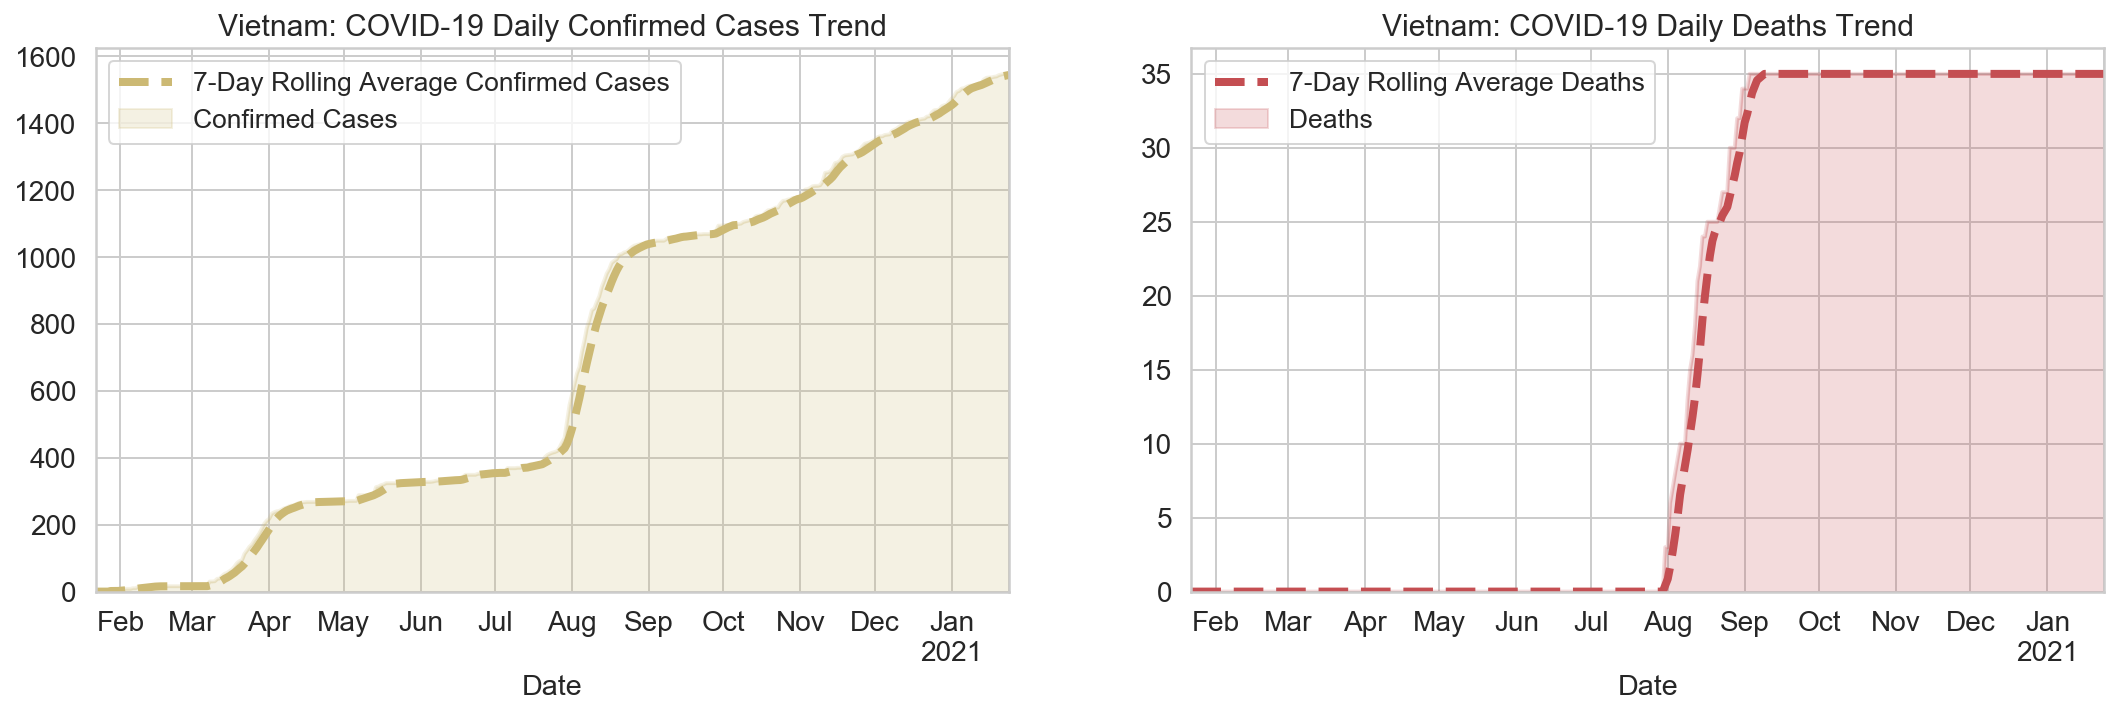

In [1419]:
# # LINE & AREA CHARTS - CONFIRMED CASES & DEATHS
# Set up seaborn chart configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2,"axes.titlesize":15})
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,5), ncols=2, sharex=False)

# Plot VN Daily New Cases Trend
vn_df.groupby("Date")['7-Day Rolling Average Confirmed Cases'].sum().plot(kind="line",
         color="y", legend="True", fontsize=14, ax=ax[0],linestyle="dashed", linewidth=4)
vn_df.groupby("Date")['Confirmed Cases'].sum().plot(kind="area",
        title="Vietnam: COVID-19 Daily Confirmed Cases Trend", color="y", legend="True", alpha=.2, fontsize=14, ax=ax[0])
# Plot VN Daily New Deaths Trend
vn_df.groupby("Date")['7-Day Rolling Average Deaths'].sum().plot(kind="line", 
        color="r", legend="True", fontsize=14, ax=ax[1], linestyle="dashed", linewidth=4)
vn_df.groupby("Date")['Deaths'].sum().plot(kind="area", 
        title="Vietnam: COVID-19 Daily Deaths Trend", color="r", legend="True", alpha=.2, fontsize=14, ax=ax[1])
plt.show();

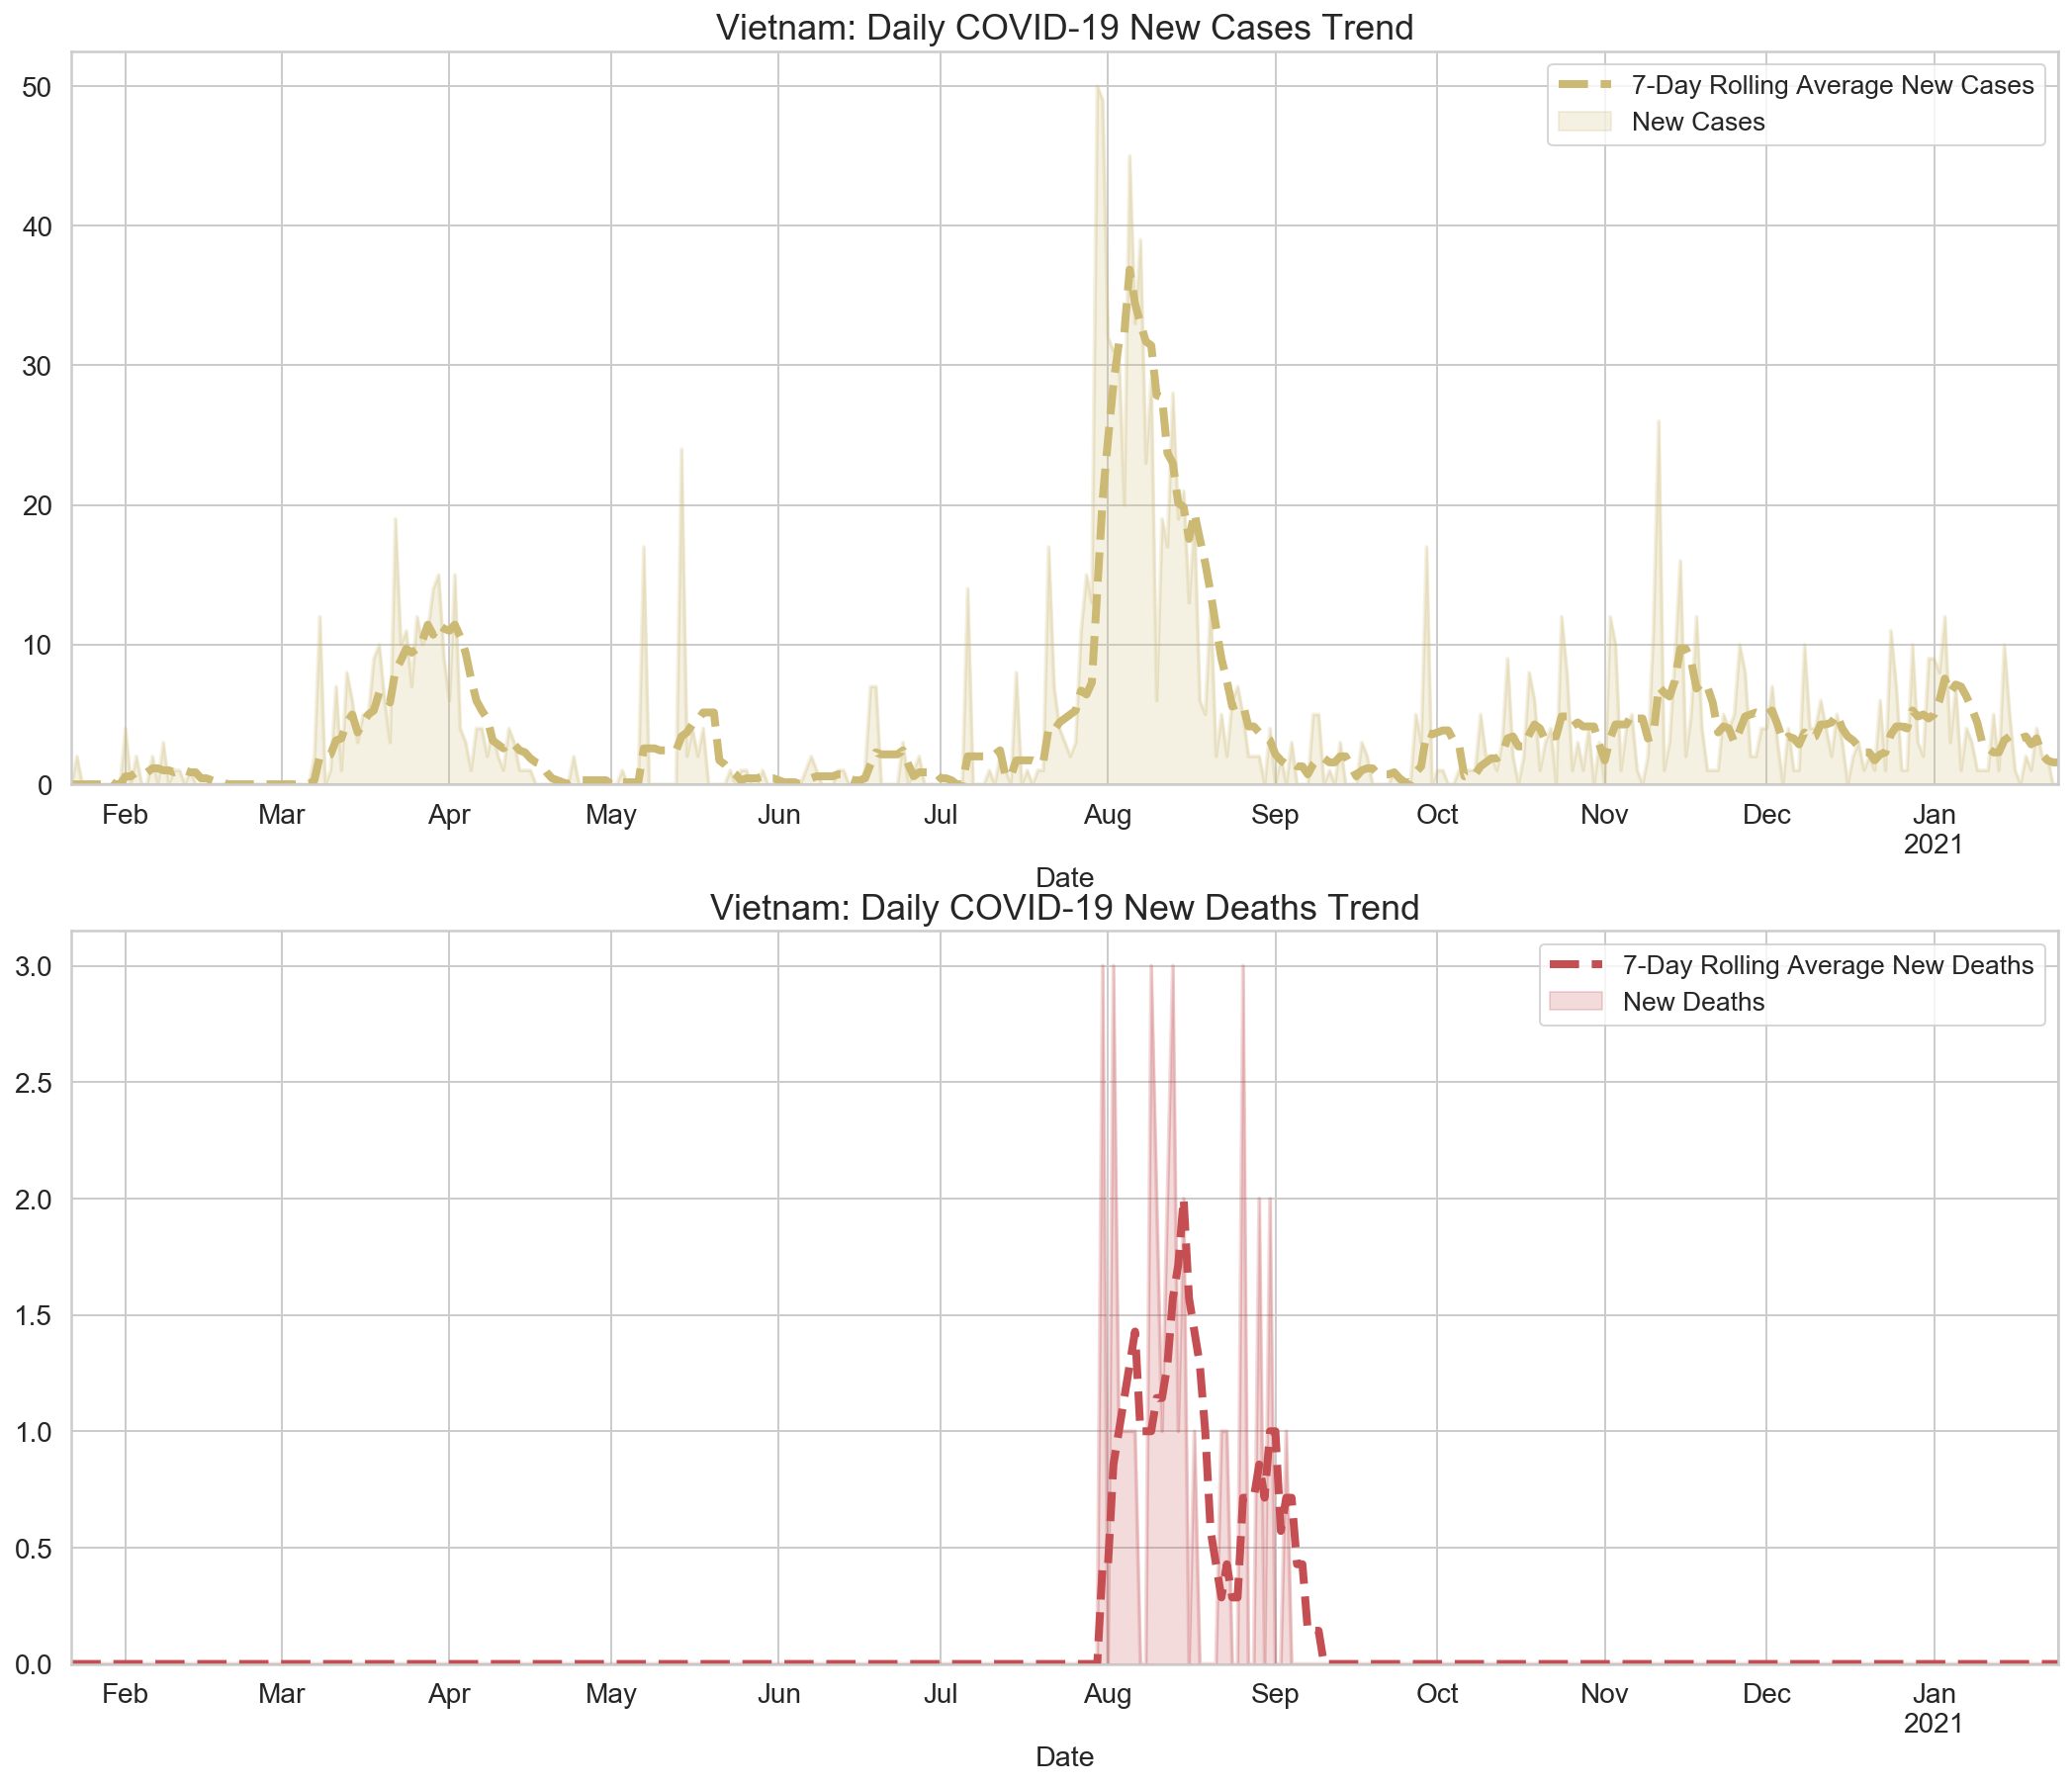

In [1417]:
# LINE & AREA CHARTS - NEW CASES & DEATHS
# Set up seaborn chart configuration
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2, "axes.titlesize":18})
# Set up matplotlib figure
f, ax = plt.subplots(figsize=(18,15), nrows=2, sharex=False)
# Plot VN Daily New Cases Trend
vn_df.groupby("Date")['7-Day Rolling Average New Cases'].sum().plot(kind="line", color="y", legend="True", fontsize=14, ax=ax[0],
                                                                    linestyle="dashed", linewidth=4)
vn_df.groupby("Date")['New Cases'].sum().plot(kind="area",
        title="Vietnam: Daily COVID-19 New Cases Trend", color="y", legend="True", alpha=.2, fontsize=14, ax=ax[0])
# Plot VN Daily New Deaths Trend
vn_df.groupby("Date")['7-Day Rolling Average New Deaths'].sum().plot(kind="line", 
        color="r", legend="True", fontsize=14, ax=ax[1], linestyle="dashed", linewidth=4)
vn_df.groupby("Date")['New Deaths'].sum().plot(kind="area", 
        title="Vietnam: Daily COVID-19 New Deaths Trend", color="r", legend="True", alpha=.2, fontsize=14, ax=ax[1])
plt.show();

## 5. Heatmap: New Cases & Deaths for days of the month

It seems like the number of daily new cases in Vietnam are significantly high 

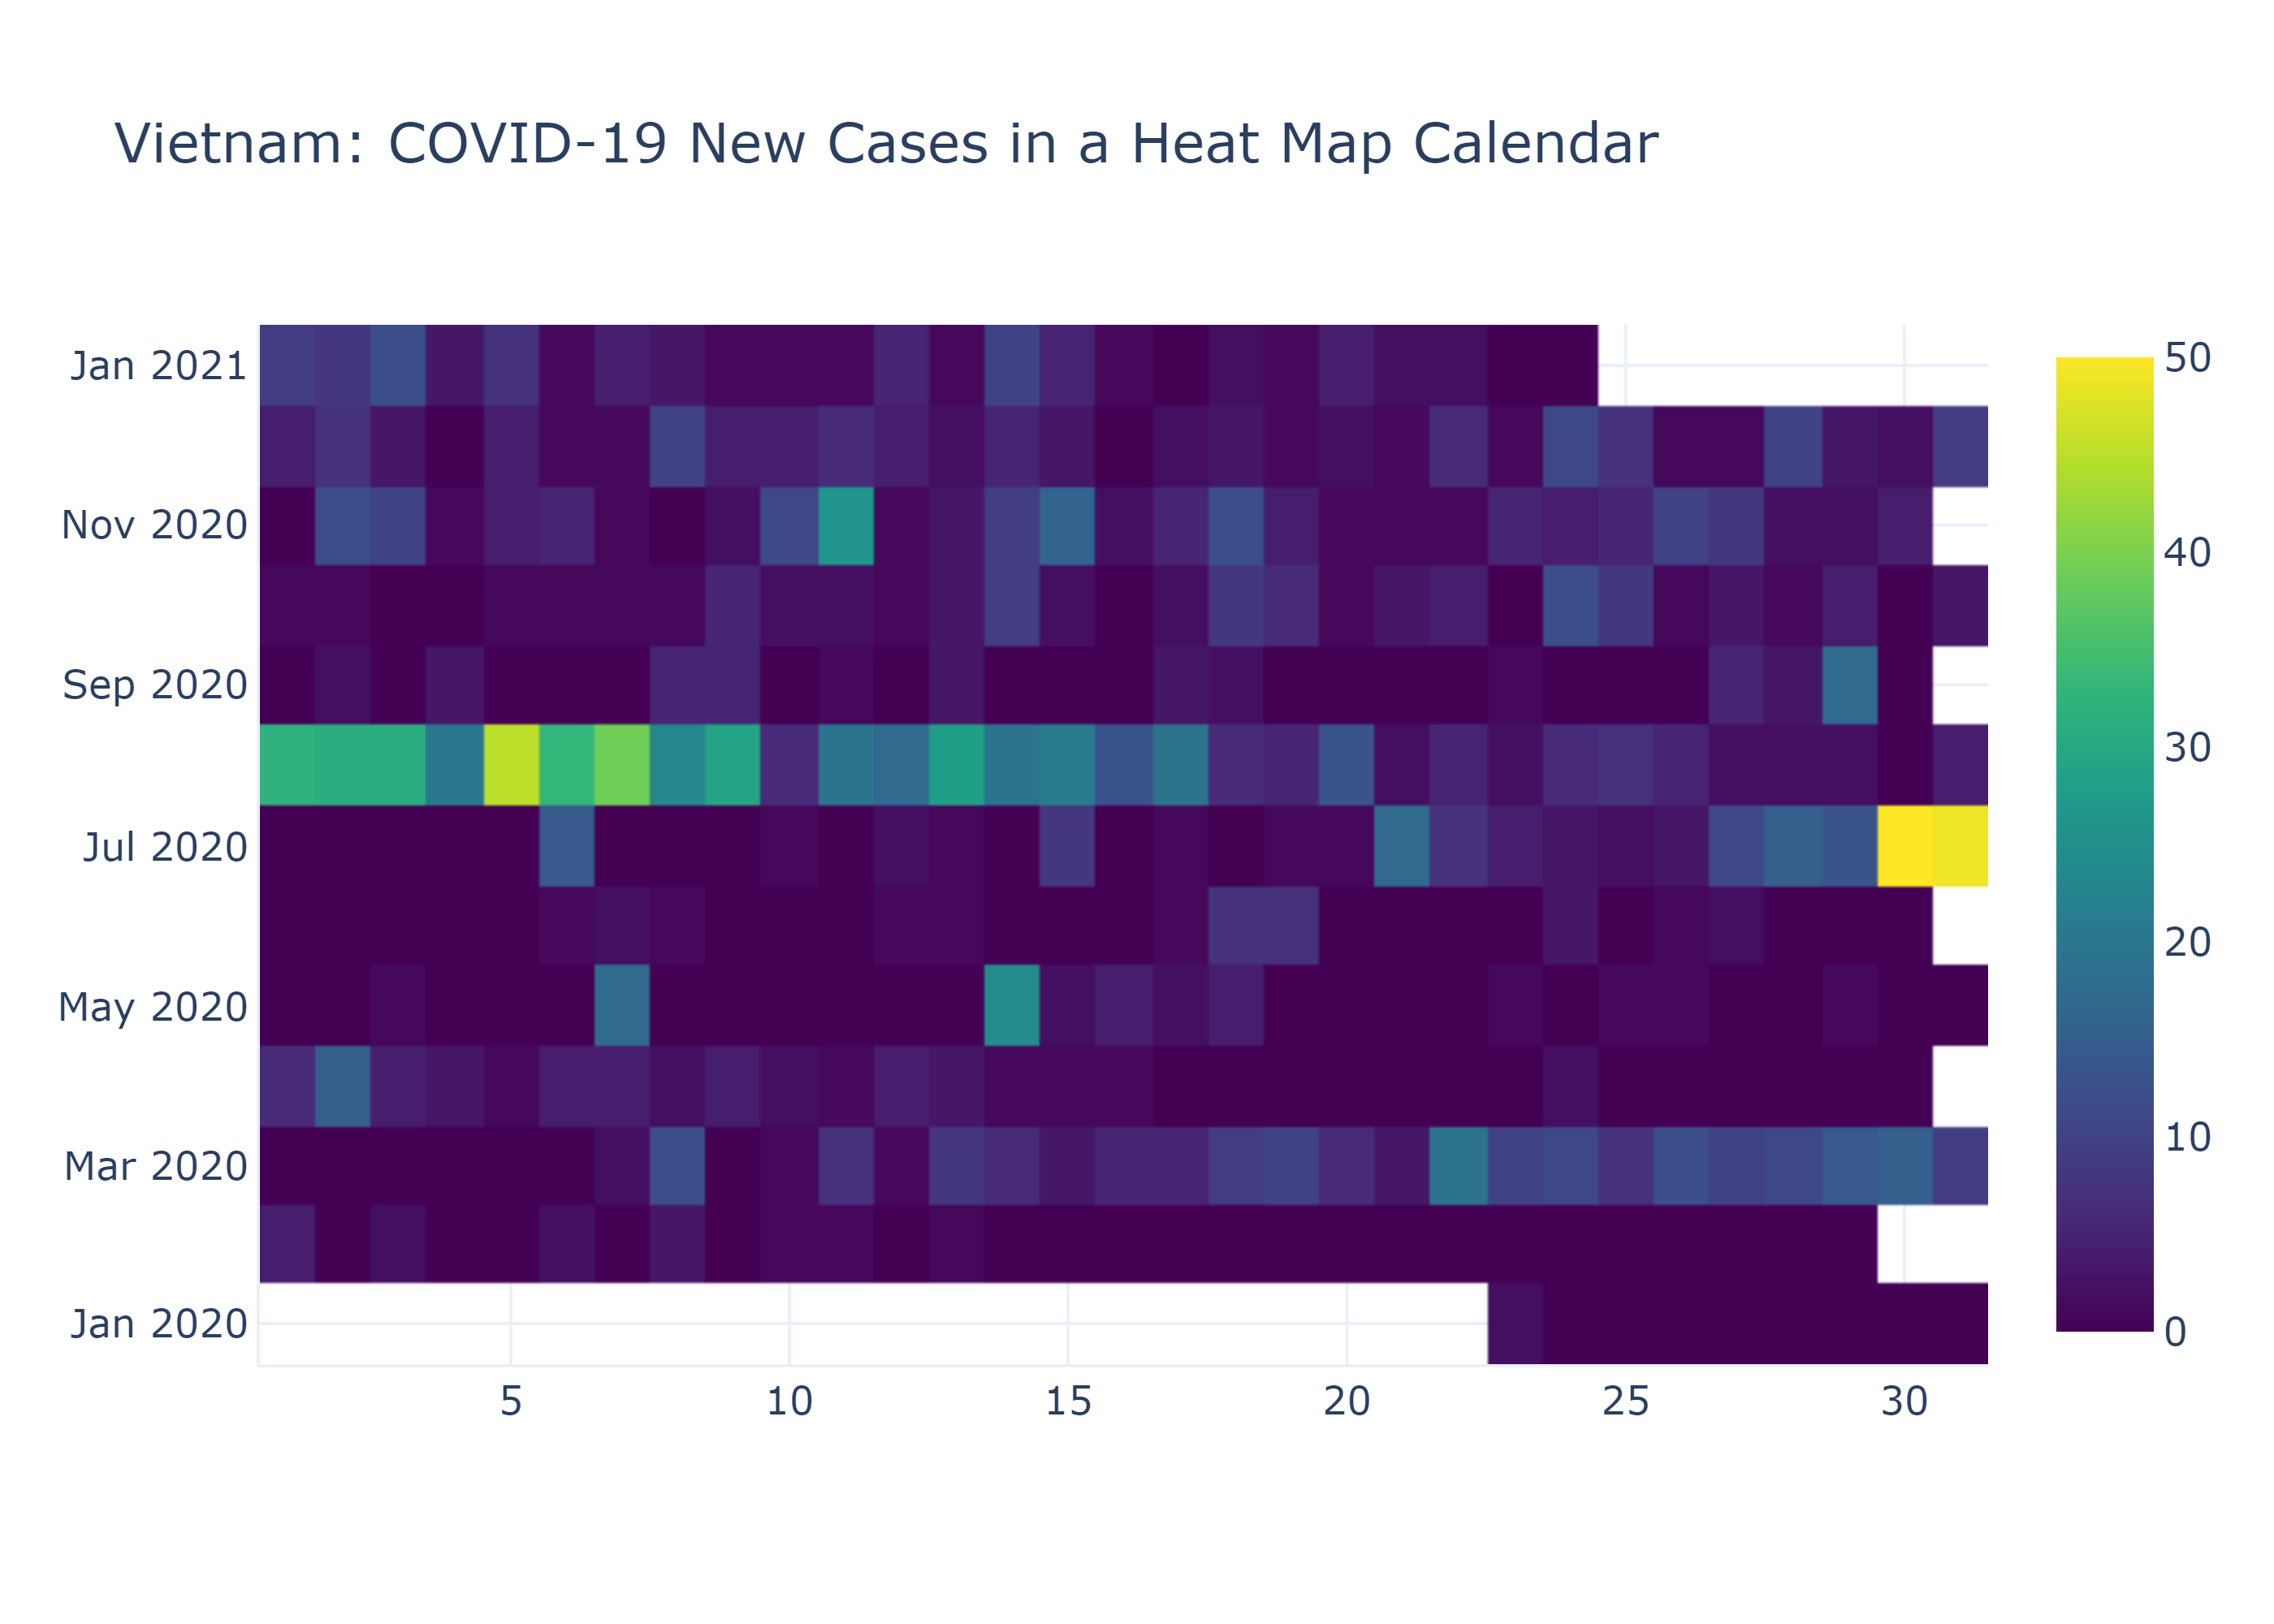

In [1471]:
# Heatmap - demonstrate the number of new cases
vn_df['Day'] = vn_df['Day'].apply(str)
vn_df['Month-Year'] = vn_df['Month-Year'].apply(str)
fig5 = go.Figure(data=go.Heatmap( z=vn_df['New Cases'], x=vn_df['Day'], y=vn_df['Month-Year'],
        colorscale='Viridis'))
fig5.update_layout(title = 'Vietnam: COVID-19 New Cases in a Heat Map Calendar')
#fig5.show()
Image(pio.to_image(fig5, format='png', scale=4))

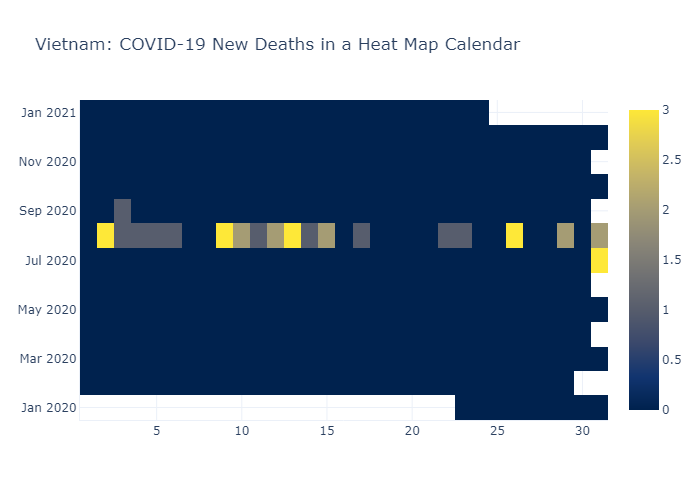

In [1470]:
# Heatmap - demonstrate the number of new deaths
fig6 = go.Figure(data=go.Heatmap( z=vn_df['New Deaths'], x=vn_df['Day'], y=vn_df['Month-Year'],
        colorscale='Cividis'))
fig6.update_layout(title = 'Vietnam: COVID-19 New Deaths in a Heat Map Calendar')
#fig6.show()
Image(pio.to_image(fig6, format='png'))

# `Vietnam and USA Comparison`

### How does the pandemic situation in USA differ from that in Vietnam ?

 1. KDE New Cases Distribution
 2. KDE New Deaths Distribution
 3. Difference in number of new cases by Season & Month
 4. Daily New Cases Distribution by Season 
_________________________________________

In [1443]:
# Merge Vietnam and US data
vn_us = pd.concat([vn_df,us_df])
#vn_us.head()

## 1. Vietnam vs US: Daily New Cases Distribution

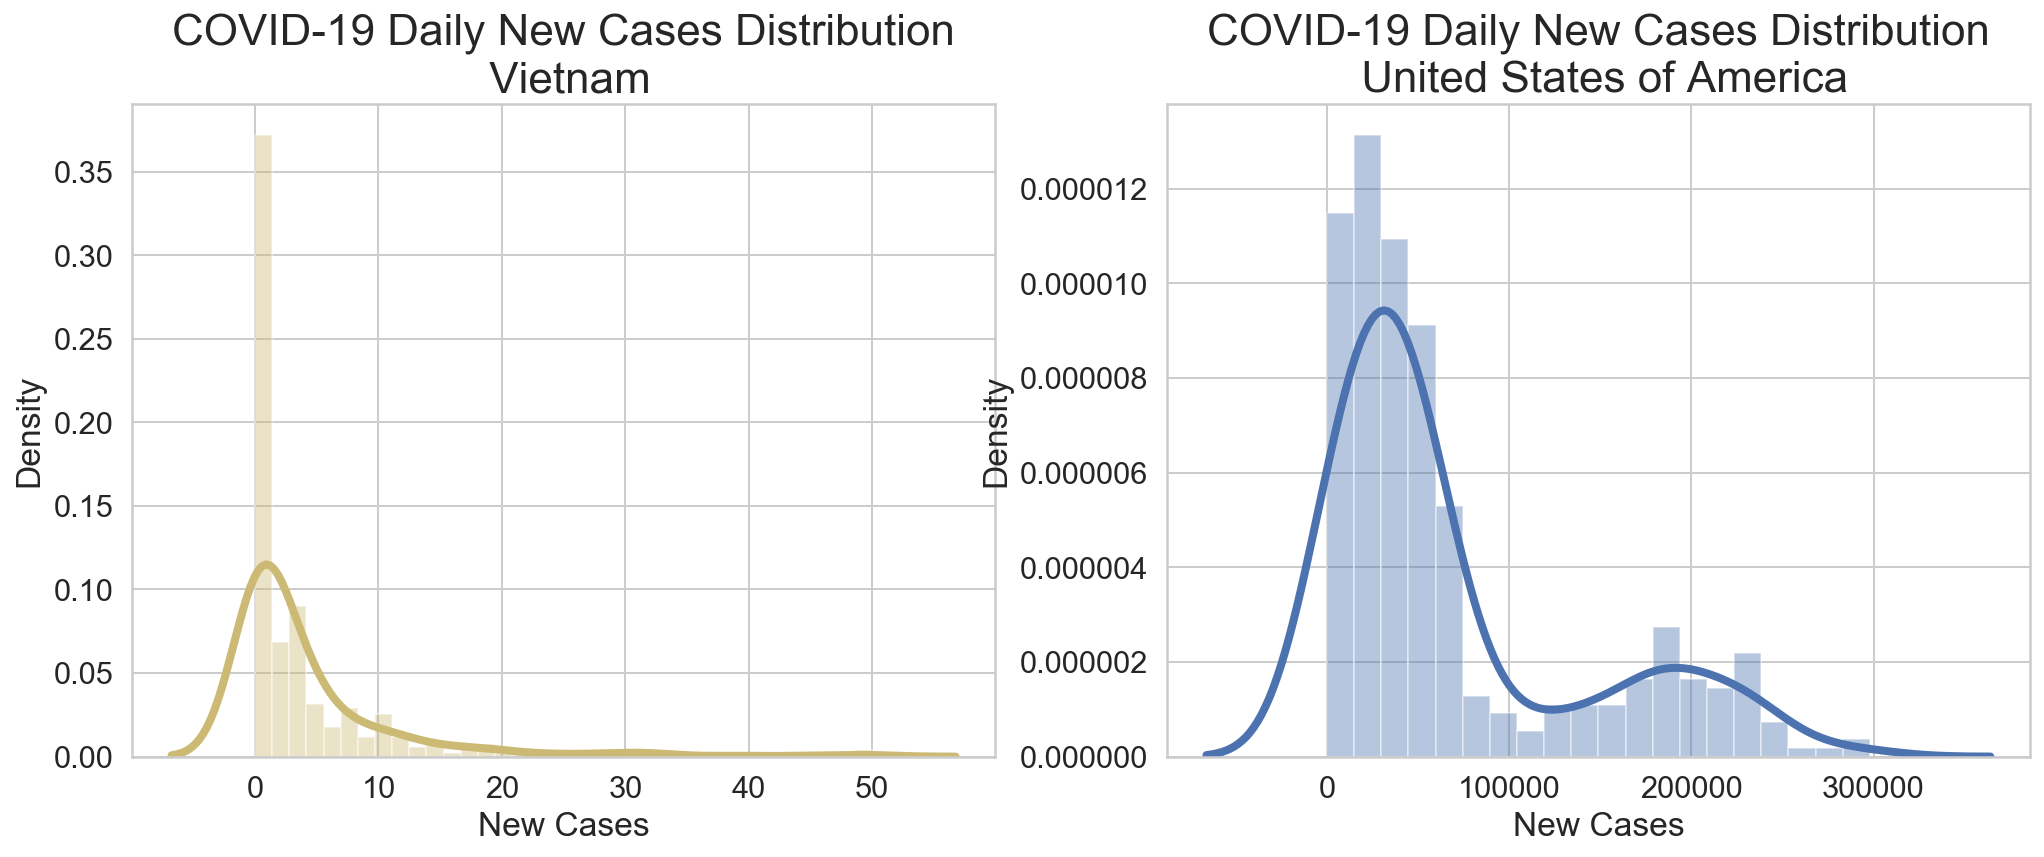

In [1431]:
# KDE (Kernal Density Estimate) Plot: Visualize the distribution of observations in the dataset
# Set up the chart configuration
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4, "axes.titlesize":22})
f, ax = plt.subplots(figsize=(17,6), ncols=2)
# Plot KDE US new cases
sns.distplot(vn_df["New Cases"].iloc[1:], kde=True, ax=ax[0], color = "y")
ax[0].set_title("COVID-19 Daily New Cases Distribution\n Vietnam")
# Plot KDE US new deaths
sns.distplot(us_df["New Cases"].iloc[1:], kde=True, ax=ax[1], color="b")
ax[1].set_title("COVID-19 Daily New Cases Distribution\n United States of America")
plt.show();

- Vietnam New Cases Distribution: Skewed right - Vietnam mostly has 0 cases on a daily basis. The daily new cases in Vietnam are less than 20. 


- US New Cases Distribution: Roughly Skewed right - USA has daily reported new cases mostly in the range of less than 100,000. At some time, the daily new cases can reach 200,000. 


- The population in the US is 328M while the population in Vietnam is 96.46M. The Vietnam population is approximately one-third of the US population, however, the daily new cases in US is 10,000 times higher than the daily new cases in Vietnam. Hence, Vietnam has a great control of the pandemic while the US is losing control.



## 2. Vietnam vs US: Daily New Deaths Distribution



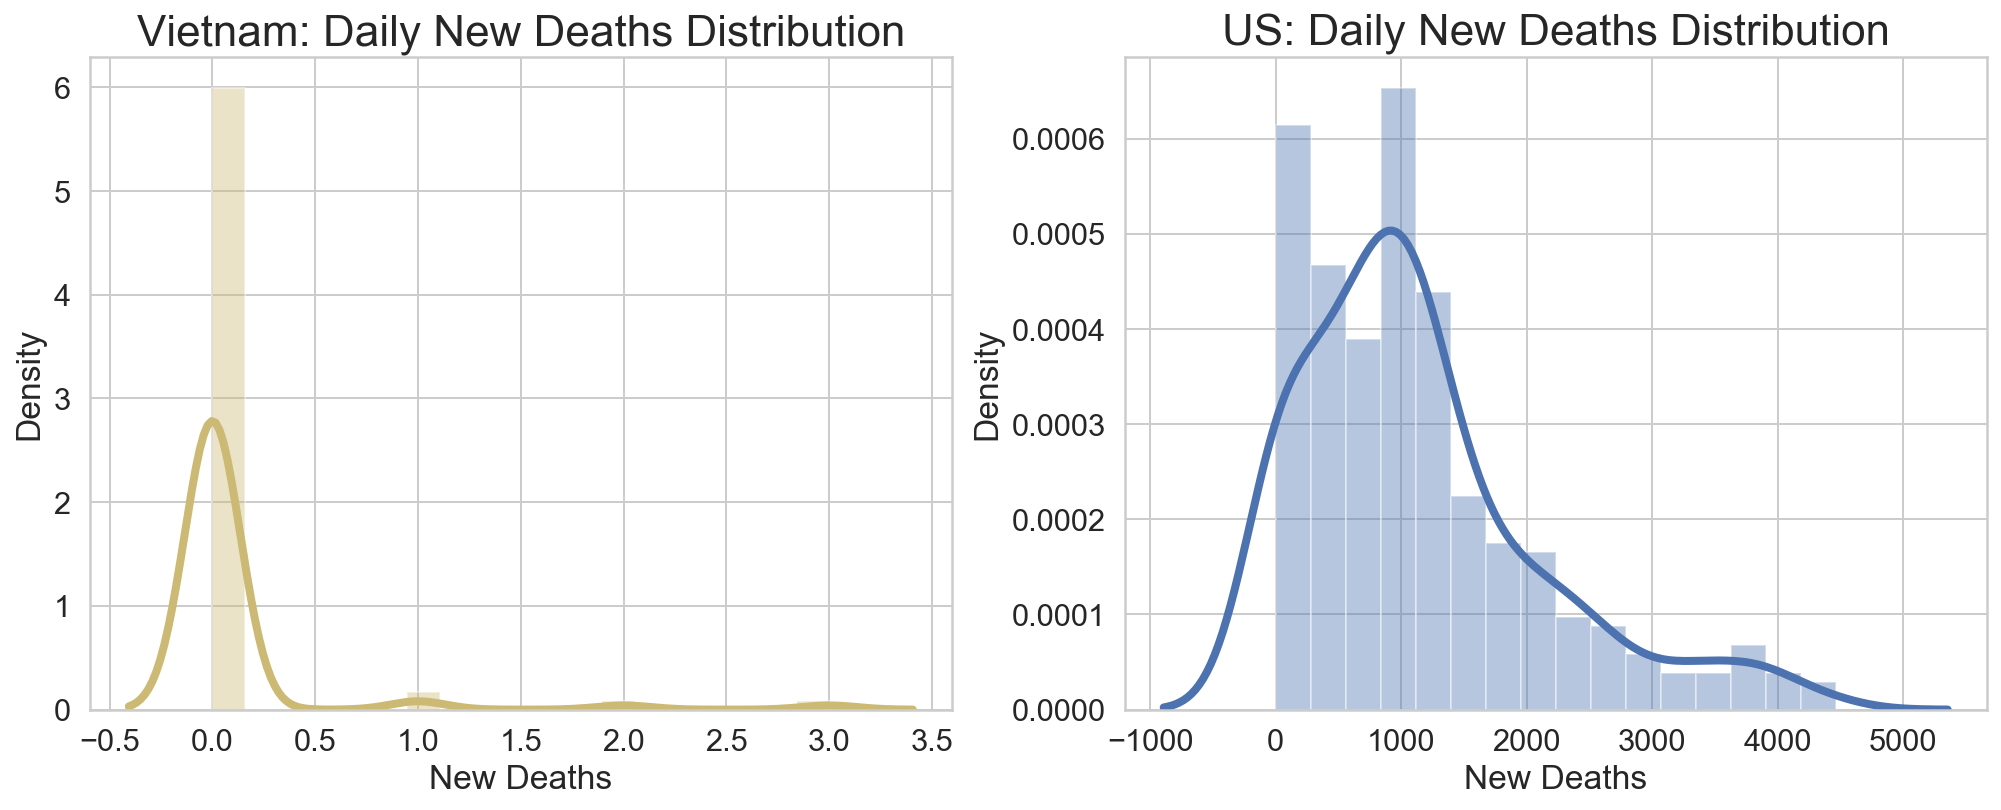

In [1432]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":4, "axes.titlesize":22})
f, ax = plt.subplots(figsize=(17,6), ncols=2)
# Plot KDE VN new deaths
sns.distplot(vn_df["New Deaths"].iloc[1:], kde=True, ax=ax[0], color="y")
ax[0].set_title("Vietnam: Daily New Deaths Distribution")
# Plot KDE US new deaths
sns.distplot(us_df["New Deaths"].iloc[1:], kde=True, ax=ax[1], color="b")
ax[1].set_title("US: Daily New Deaths Distribution")
plt.show();

- Again, Vietnam barely have any daily deaths during 2020 yet the daily new deaths in the U.S. are 1,000 times higher than the that in Vietnam.

## 3. Catplot: New Cases by Season & Month between U.S. and Vietnam


In [841]:
# Define a function to add season 
def season(month):
    if month in ([2,3,4]):
        season = "Spring"
    elif month in ([5,6,7]):
        season = "Summer"
    elif month in ([8,9,10]):
        season = "Fall"
    else:
        season = "Winter"
    return season

# Apply to add more season to vn and us
vn_df['season'] = vn_df["Month"].apply(lambda x:season(x)) # Add season to VN
us_df['season'] = us_df["Month"].apply(lambda x:season(x)) # Add season to US

<Figure size 432x288 with 0 Axes>

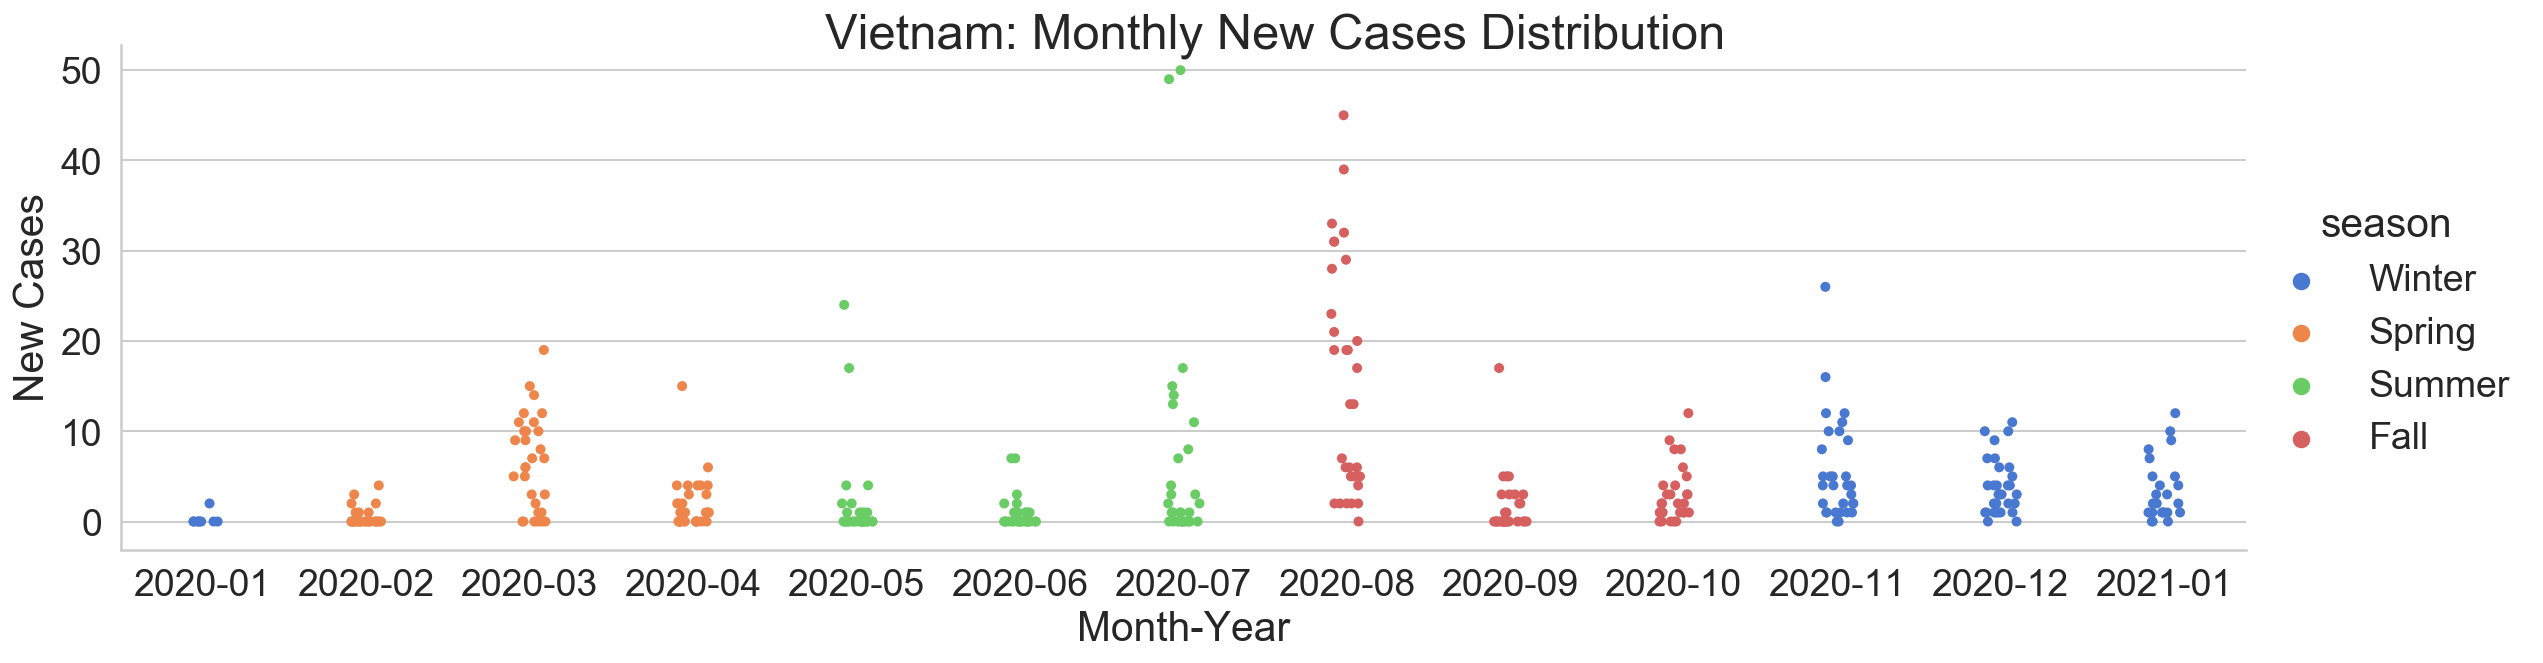

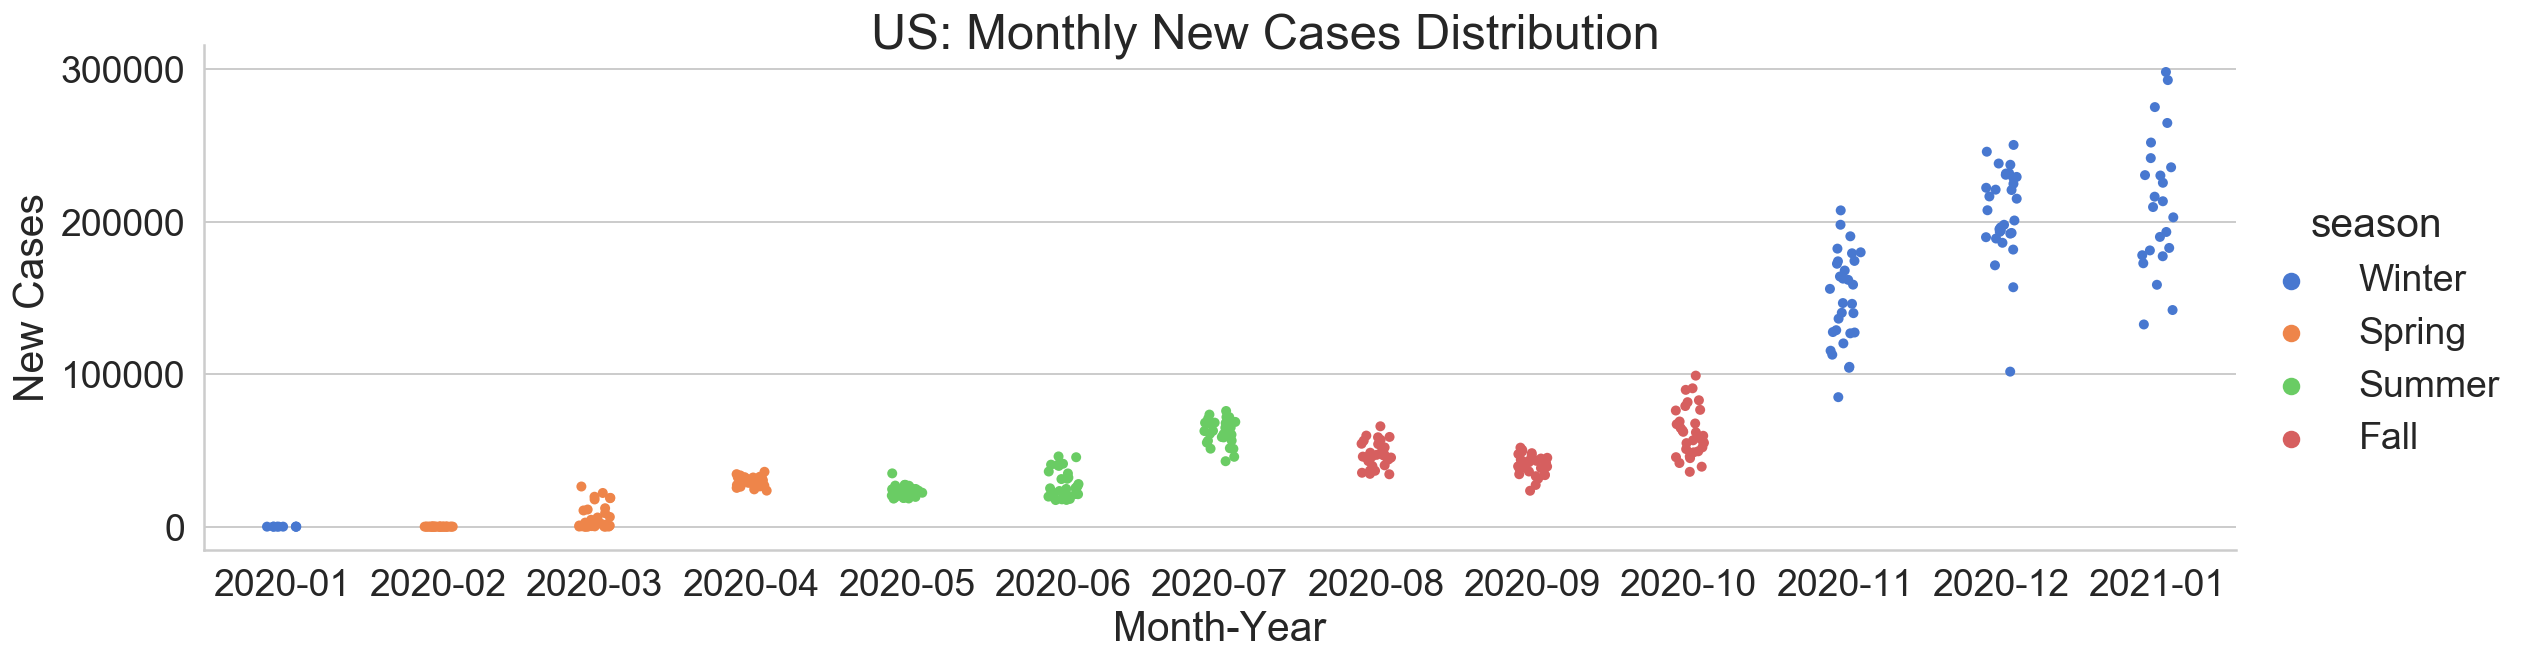

In [842]:
# Plot New Cases Distribution by Month
sns.set(style="whitegrid")
sns.color_palette("Paired")
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth":4,
                                               "axes.titlesize":22})

plt.subplots_adjust(top=1)

# Plot new cases monthly by VN
g1 = sns.catplot(x="Month-Year", y="New Cases", hue="season", data=vn_df, 
                    height=4.5, aspect=3.5, palette="muted")
# Set title for VN chart
g1.fig.suptitle('Vietnam: Monthly New Cases Distribution'); 

# Plot new cases monthly by US
g2 = sns.catplot(x="Month-Year", y="New Cases", hue="season", data=us_df, 
                    height=4.5, aspect=3.5, palette="muted")
# Set title for US chart
g2.fig.suptitle('US: Monthly New Cases Distribution'); 

plt.show();

- Number of new cases in the U.S. has significantly increase since November 2020 till January 2021.
- Vietnam has successfully controlled the situation while keeping the montly new case distribution less than 10.

## 4. New Cases Distribution by Season between Vietnam and U.S.

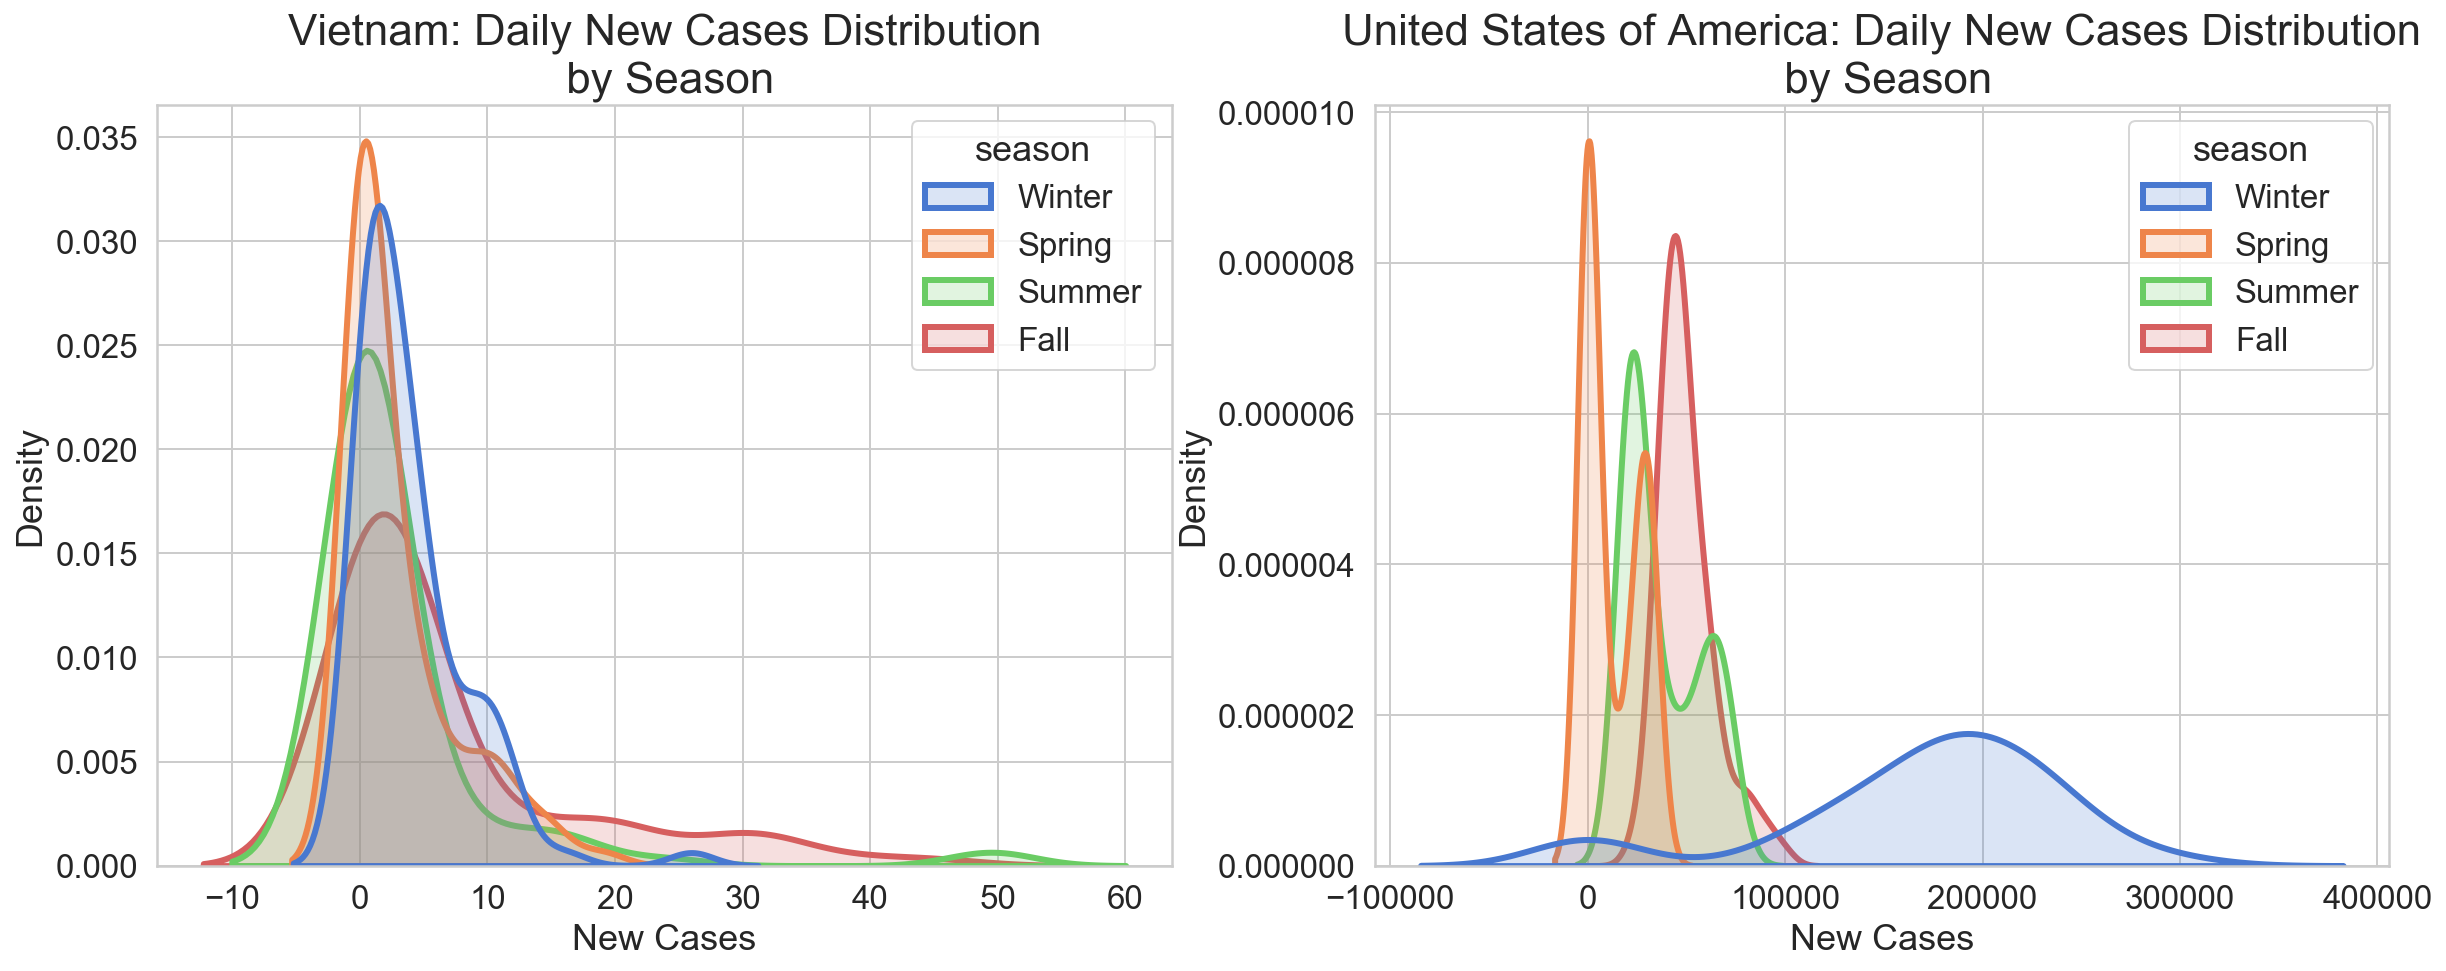

In [843]:
# Plot New Cases Distribution by Month

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":4,
                                               "axes.titlesize":22})

# Plot Vietnam new daily cases by season
fig, ax = plt.subplots(figsize=(20,7), ncols=2)
sns.kdeplot(data=vn_df.iloc[1:],
            x="New Cases", hue="season",
            fill="True", common_norm="False", palette="muted",
            hue_order=(["Winter", "Spring", "Summer", "Fall"]),
            alpha=.2, linewidth=3, ax=ax[0])
ax[0].set_title("Vietnam: Daily New Cases Distribution\n by Season")

# Plot the us new daily cases by season
sns.kdeplot(data=us_df.iloc[1:],
            x="New Cases", hue="season",
            fill="True", common_norm="False", palette="muted",
            hue_order=(["Winter", "Spring", "Summer", "Fall"]),
            alpha=.2, linewidth=3, ax=ax[1])
ax[1].set_title("United States of America: Daily New Cases Distribution\n by Season")

plt.show();

- U.S. has more daily new cases, mostly around 100,000 to 300,000 cases, during Winter (roughly Nov, Dec, and Jan). The number of daily new cases in Spring, Summer and Fall are mostly less than 100,000.
- Vietnam has mostly daily new cases less than 20. In the summer, the number of new cases can spike up to 50 case.
_________________________________________________________________________

# The End.

This is my personal work and my own thoughts. I hope you enjoy reading this notebook and gain more insights about this pandemic around the world through visualization. Thank you for reading! :)